In [1]:
import pandas as pd

In [4]:
df_part1 = pd.read_csv("loan.csv", low_memory = False)

In [5]:
df_part2 = pd.read_csv("loan_half2.csv", low_memory = False)

In [6]:
loan_df = pd.concat([df_part1,df_part2])



In [7]:
loan_df.shape

(1048575, 145)

In [8]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [9]:
#loading the data dictionary

Data_Dictionary = pd.read_excel("LCDataDictionary.xlsx")


In [10]:
Data_Dictionary.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [203]:
Data_Dictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


In [11]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,0.0,1.047378e+06,...,5601.0,5601.000000,5601.0,5601.000000,4364.00000,5601.000000,5601.000000,14795.000000,14795.000000,14795.000000
mean,NaN,NaN,1.538487e+04,1.538485e+04,1.537975e+04,1.280290e+01,4.538249e+02,7.967461e+04,NaN,1.928933e+01,...,3.0,151.939591,3.0,13.719157,444.72088,11498.408693,185.940887,5116.182247,47.823919,14.631227
std,NaN,NaN,9.533838e+03,9.533840e+03,9.532473e+03,4.962779e+00,2.762069e+02,8.410183e+04,NaN,1.589602e+01,...,0.0,125.048892,0.0,9.762366,365.25832,7300.044958,193.646146,3695.404720,6.067449,7.136116
min,NaN,NaN,1.000000e+03,1.000000e+03,7.250000e+02,5.310000e+00,1.477000e+01,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.92000,55.730000,0.010000,138.000000,0.650000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.160000e+00,2.516500e+02,4.700000e+04,NaN,1.193000e+01,...,3.0,58.420000,3.0,5.000000,172.23750,5681.300000,41.560000,2222.380000,45.000000,10.000000
50%,NaN,NaN,1.300000e+04,1.300000e+04,1.300000e+04,1.199000e+01,3.806600e+02,6.600000e+04,NaN,1.805000e+01,...,3.0,115.870000,3.0,15.000000,342.93000,10128.020000,123.450000,4264.000000,45.000000,16.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.549000e+01,6.094400e+02,9.500000e+04,NaN,2.502000e+01,...,3.0,208.810000,3.0,22.000000,601.44750,15971.130000,271.190000,7063.000000,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.670150e+03,9.930475e+06,NaN,9.990000e+02,...,3.0,845.220000,3.0,37.000000,2535.66000,40149.350000,1407.860000,28503.000000,97.660000,65.000000


In [12]:
pd.options.display.max_columns = 150

In [13]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-18,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0,Apr-01,1.0,NaN,45.0,9,1,4341,10.3,34,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-19,84.92,Mar-19,Feb-19,0,NaN,1,Individual,NaN,NaN,NaN,0,0,16901,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000,1.0,11.0,2.0,9,1878.0,34360.0,5.9,0,0,140.0,212,1,1,0,1.0,NaN,2.0,NaN,0,2,5,3,3,16,7,18.0,5,9,0.0,0,0,3,100.0,0.0,1,0,60124,16901,36500,18124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-18,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0,Jun-87,0.0,71.0,75.0,13,1,12315,24.2,44,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-19,777.23,Mar-19,Feb-19,0,NaN,1,Individual,NaN,NaN,NaN,0,1208,321915,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800,2.0,15.0,2.0,10,24763.0,13761.0,8.3,0,0,163.0,378,4,3,3,4.0,NaN,4.0,NaN,0,2,4,4,9,27,8,14.0,4,13,0.0,0,0,6,95.0,0.0,1,0,372872,99468,15000,94072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-18,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-11,0.0,NaN,NaN,8,0,4599,19.1,13,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,Feb-19,180.69,Mar-19,Feb-19,0,NaN,1,I

In [14]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 524288
Columns: 145 entries, id to settlement_term
dtypes: float64(71), int64(38), object(36)
memory usage: 1.1+ GB


In [47]:
#count the number of missing values

loan_num_missing = loan_df.isna().sum()

In [48]:
loan_num_missing

loan_amnt                                    0
funded_amnt                                  0
funded_amnt_inv                              0
term                                         0
int_rate                                     0
installment                                  0
grade                                        0
sub_grade                                    0
emp_title                                90444
emp_length                               77465
home_ownership                               0
annual_inc                                   0
verification_status                          0
issue_d                                      0
loan_status                                  0
pymnt_plan                                   0
purpose                                      0
title                                    23305
zip_code                                     0
addr_state                                   0
dti                                       1197
delinq_2yrs  

In [16]:
len(loan_df)

1048575

In [17]:
loan_missing_percentage = (loan_num_missing / len(loan_df)) * 100


In [20]:
loan_missing_percentage

id                                            100.000000
member_id                                     100.000000
loan_amnt                                       0.000000
funded_amnt                                     0.000000
funded_amnt_inv                                 0.000000
term                                            0.000000
int_rate                                        0.000000
installment                                     0.000000
grade                                           0.000000
sub_grade                                       0.000000
emp_title                                       8.625420
emp_length                                      7.387645
home_ownership                                  0.000000
annual_inc                                      0.000000
verification_status                             0.000000
issue_d                                         0.000000
loan_status                                     0.000000
pymnt_plan                     

In [40]:
pd.options.display.max_rows = 700

In [21]:
loan_df.drop(['id', 'member_id', 'url', 'desc'], axis = 1, inplace=True)

In [23]:
loan_df.drop(['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'revol_bal_joint'], axis = 1, inplace=True)

In [28]:
loan_df.shape

(1048575, 108)

In [25]:
loan_df.drop(['sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med'], axis = 1, inplace=True)

In [27]:
loan_df.drop(['hardship_type','hardship_reason','hardship_status','deferral_term','hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term'], axis = 1, inplace=True)

Now that we have deleted columns with more than 90% of the missing values, we can work on filling the other columns with predicted values.But first, we need to check for patterns in the missing values

How do you address that lost data?

First, determine the pattern of your missing data. There are three types of missing data:

Missing Completely at Random:  There is no pattern in the missing data on any variables. This is the best you can hope for.
Missing at Random: There is a pattern in the missing data but not on your primary dependent variables such as likelihood to recommend or SUS Scores.
Missing Not at Random: There is a pattern in the missing data that affect your primary dependent variables. For example, lower-income participants are less likely to respond and thus affect your conclusions about income and likelihood to recommend. Missing not at random is your worst-case scenario. Proceed with caution.
And here are seven things you can do about that missing data:

Listwise Deletion: Delete all data from any participant with missing values. If your sample is large enough, then you likely can drop data without substantial loss of statistical power. Be sure that the values are missing at random and that you are not inadvertently removing a class of participants.
Recover the Values: You can sometimes contact the participants and ask them to fill out the missing values. For in-person studies, we’ve found having an additional check for missing values before the participant leaves helps.

In [30]:
import missingno as msno

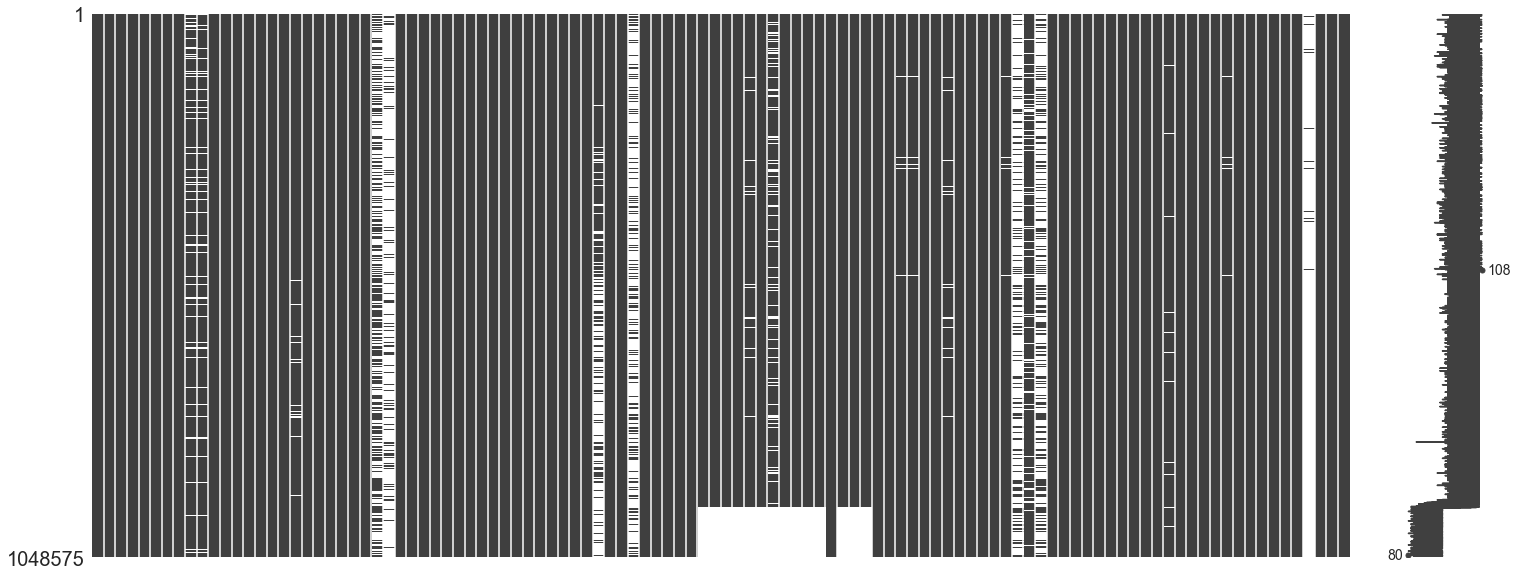

In [31]:
msno.matrix(loan_df)

In [32]:
print(loan_df.corr())

                                     loan_amnt  funded_amnt  funded_amnt_inv  \
loan_amnt                             1.000000     0.999999         0.999993   
funded_amnt                           0.999999     1.000000         0.999994   
funded_amnt_inv                       0.999993     0.999994         1.000000   
int_rate                              0.066972     0.066974         0.066947   
installment                           0.945152     0.945154         0.945071   
annual_inc                            0.263068     0.263069         0.263081   
dti                                   0.039324     0.039323         0.039288   
delinq_2yrs                          -0.016597    -0.016596        -0.016645   
inq_last_6mths                       -0.023006    -0.023005        -0.023075   
mths_since_last_delinq                0.001995     0.001993         0.002043   
mths_since_last_record                0.034661     0.034661         0.034786   
open_acc                              0.

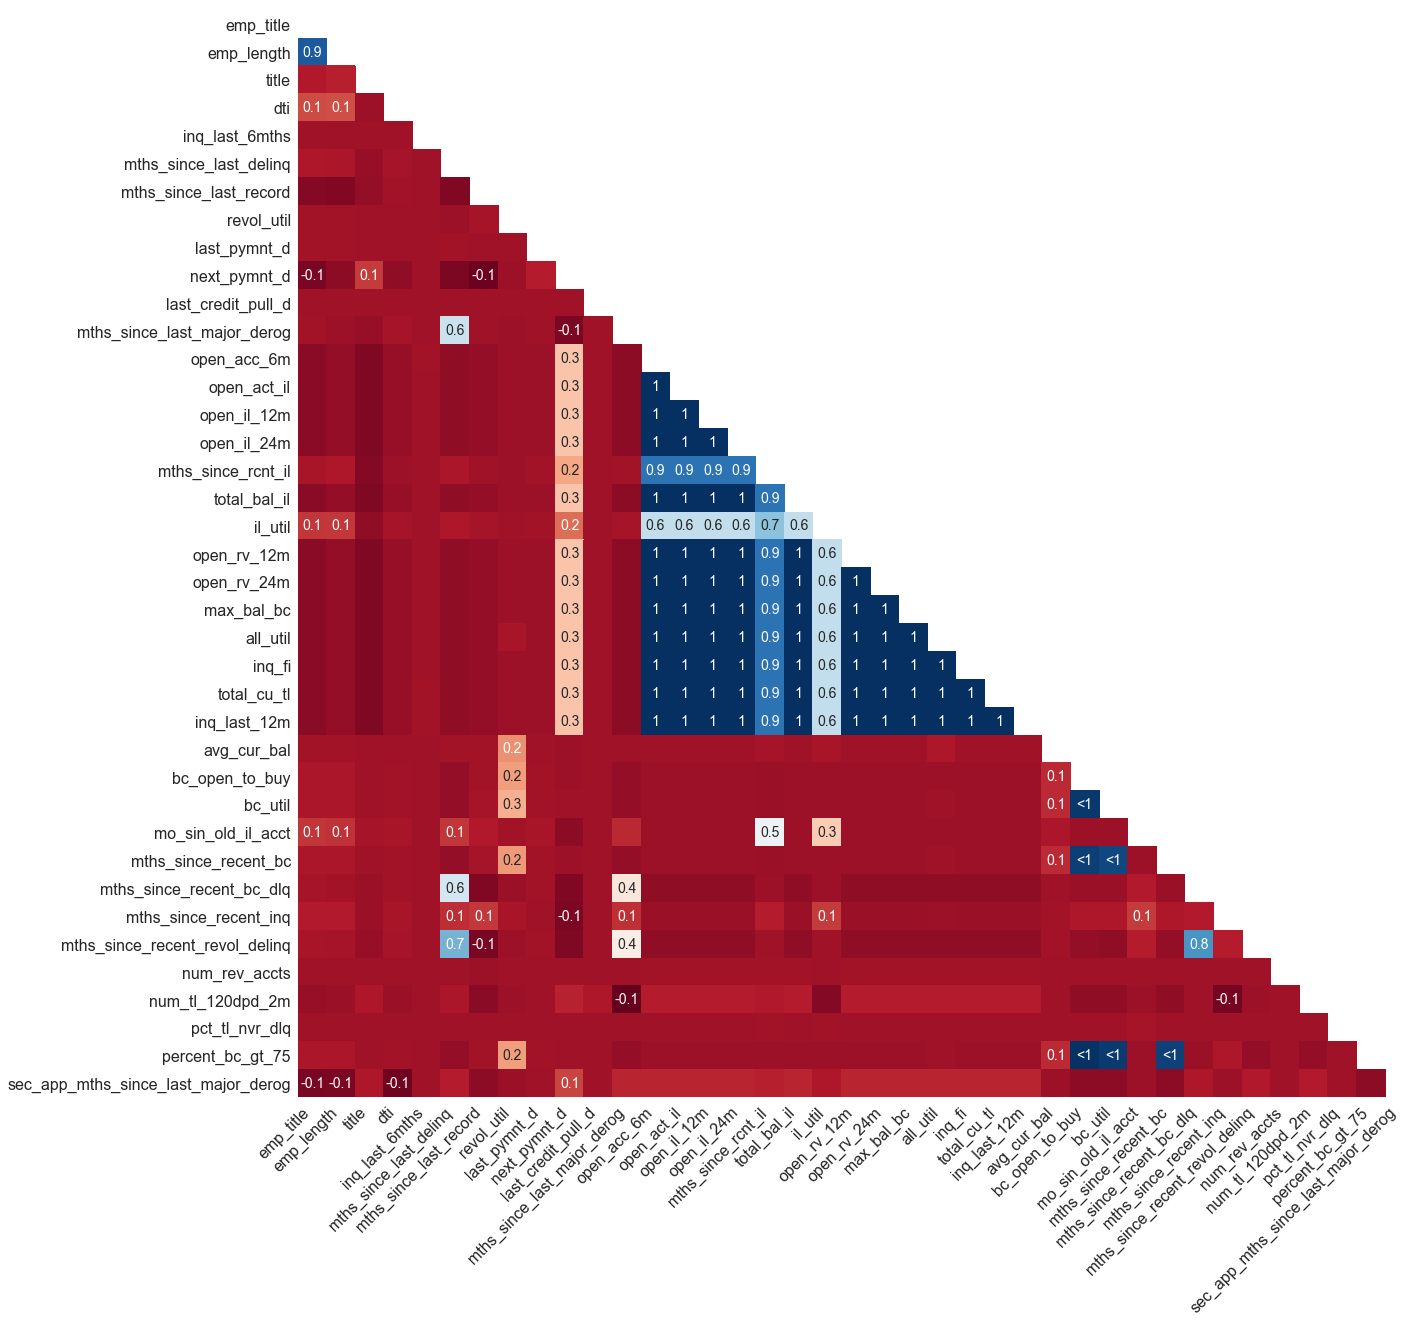

In [43]:
msno.heatmap(loan_df, figsize=(20,20))

In [90]:
loan_df.issue_d.unique()

array(['Dec-18', 'Nov-18', 'Oct-18', 'Sep-18', 'Aug-18', 'Jul-18',
       'Jun-18', 'May-18', 'Apr-18', 'Mar-18', 'Feb-18', 'Jan-18',
       'Sep-16', 'Aug-16', 'Jul-16', 'Jun-16', 'May-16', 'Apr-16',
       'Mar-16', 'Feb-16', 'Jan-16', 'Dec-16', 'Nov-16', 'Oct-16',
       'Dec-15', 'Nov-15', 'Oct-15'], dtype=object)

In [74]:
loan_df_copy.shape

(1048575, 108)

In [62]:
loan_df.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default'], dtype=object)

In [75]:
#renaming a few columns
loan_df = loan_df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})

Text(0.5, 1.0, 'Total committed by Investors')

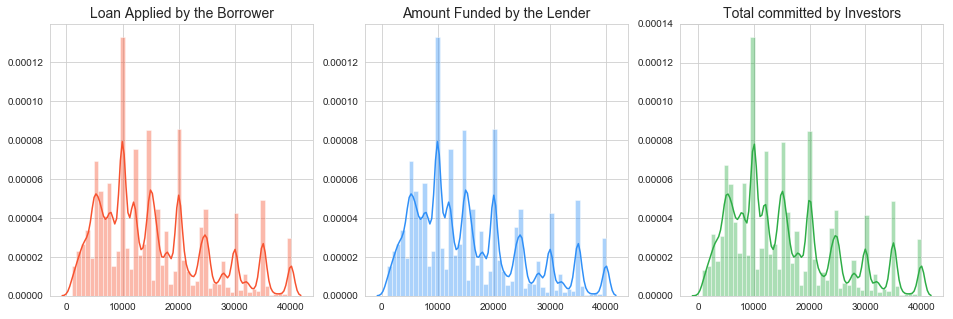

In [76]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))




loan_amount = loan_df["loan_amount"].values
funded_amount = loan_df["funded_amount"].values
investor_funds = loan_df["investor_funds"].values


sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

Most of the loans issued were in the range of 10,000 to 20,000 USD.
The year of 2015 was the year were most loans were issued.
Loans were issued in an incremental manner. (Possible due to a recovery in the U.S economy)
The loans applied by potential borrowers, the amount issued to the borrowers and the amount funded by investors are similarly distributed, meaning that it is most likely that qualified borrowers are going to get the loan they had applied for.

In [196]:
# Lets' transform the issue dates by year.
loan_df['issue_d'].head()
dt_series = pd.to_datetime(loan_df.issue_d.str.upper(), format='%b-%y', yearfirst=False)

loan_df['year'] = dt_series.dt.year
loan_df['month'] = dt_series.dt.month

Text(0, 0.5, 'Average loan amount issued')

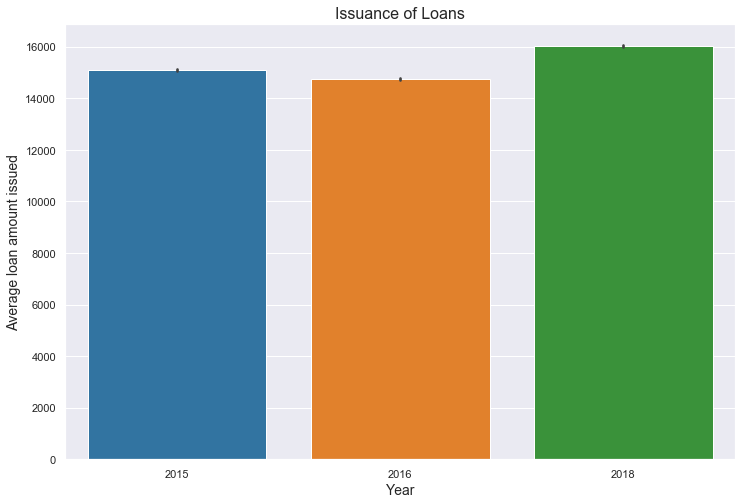

In [195]:
# The year of 2015 was the year were the highest amount of loans were issued 
# This is an indication that the economy is quiet recovering itself.
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amount', data=loan_df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

Text(0, 0.5, 'Average loan amount issued')

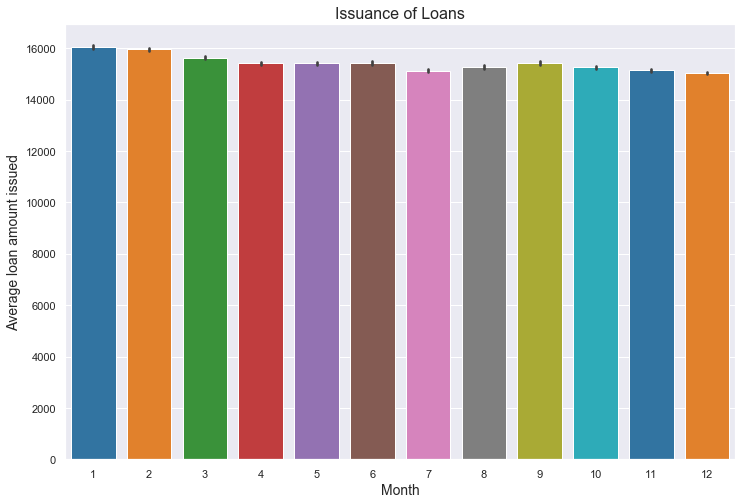

In [197]:
# The year of 2015 was the year were the highest amount of loans were issued 
# This is an indication that the economy is quiet recovering itself.
plt.figure(figsize=(12,8))
sns.barplot('month', 'loan_amount', data=loan_df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)



Let's start by the distribuition of the LOAN AMOUNT

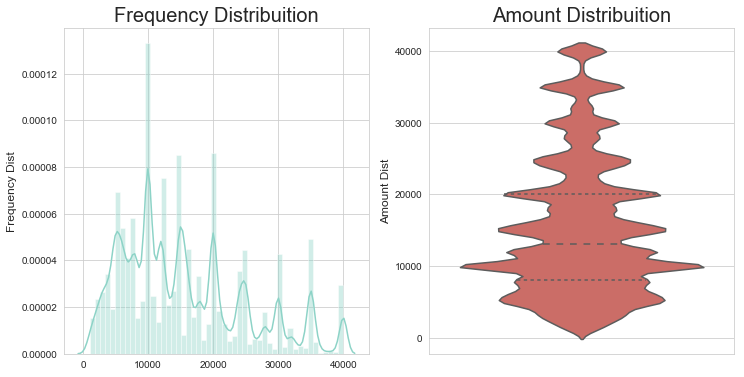

In [151]:
#I will start looking the loan_amnt column
plt.figure(figsize=(12,6))

plt.subplot(121)
g = sns.distplot(loan_df["loan_amount"])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="loan_amount", data=loan_df, 
               inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

Another interesting value to a Loan is the interest rate. Let's look this colum:

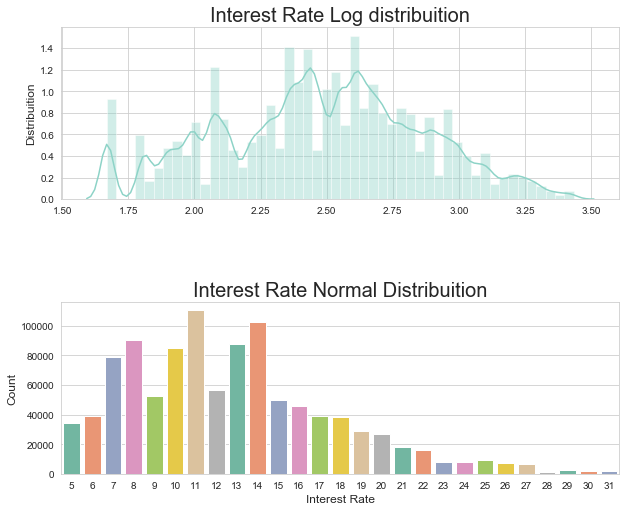

In [153]:
loan_df['int_round'] = loan_df['interest_rate'].round(0).astype(int)

plt.figure(figsize = (10,8))

#Exploring the Int_rate
plt.subplot(211)
g = sns.distplot(np.log(loan_df["interest_rate"]))
g.set_xlabel("", fontsize=12)
g.set_ylabel("Distribuition", fontsize=12)
g.set_title("Interest Rate Log distribuition", fontsize=20)

plt.subplot(212)
g1 = sns.countplot(x="int_round",data=loan_df, 
                   palette="Set2")
g1.set_xlabel("Interest Rate", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Interest Rate Normal Distribuition", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)

plt.show()

In [154]:
loan_df['issue_month'], loan_df['issue_year'] = loan_df['issue_d'].str.split('-', 1).str

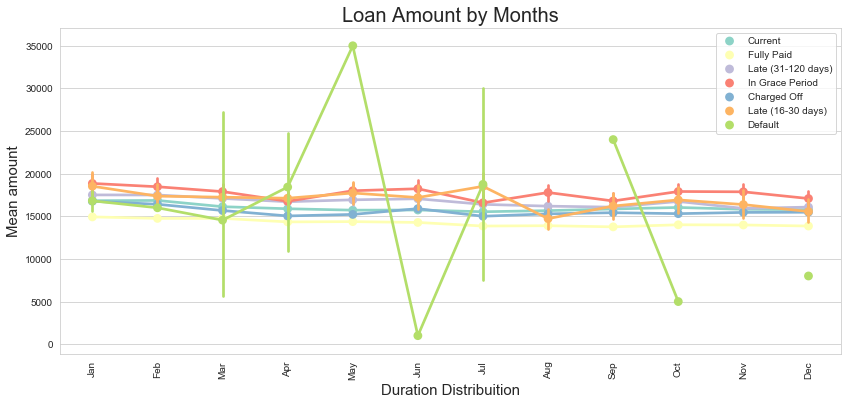

In [156]:
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan_df['issue_month'] = pd.Categorical(loan_df['issue_month'],categories=months_order, ordered=True)

#Issue_d x loan_amount
plt.figure(figsize = (14,6))

g = sns.pointplot(x='issue_month', y='loan_amount', 
                  data=loan_df, 
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Duration Distribuition", fontsize=15)
g.set_ylabel("Mean amount", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)
plt.show()

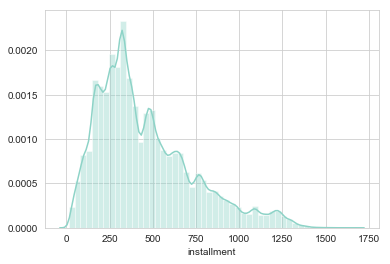

In [157]:
sns.distplot(loan_df['installment'])
plt.show()

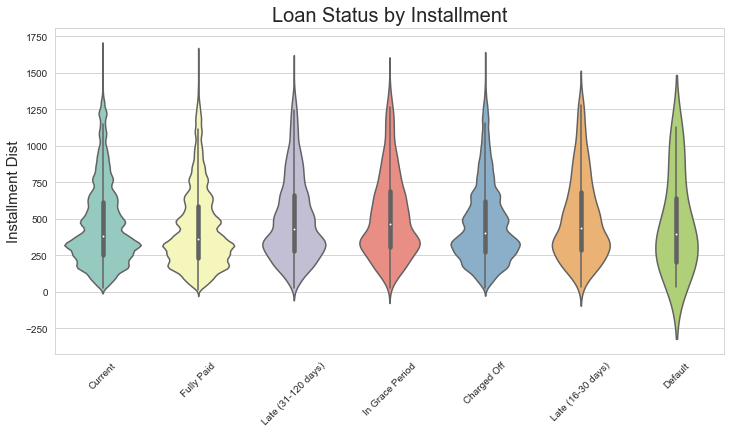

In [158]:
plt.figure(figsize = (12,6))

g = sns.violinplot(x='loan_status', y="installment",
                   data=loan_df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Installment Dist", fontsize=15)
g.set_title("Loan Status by Installment", fontsize=20)

plt.show()

Looking the Home Ownership by Loan_Amount

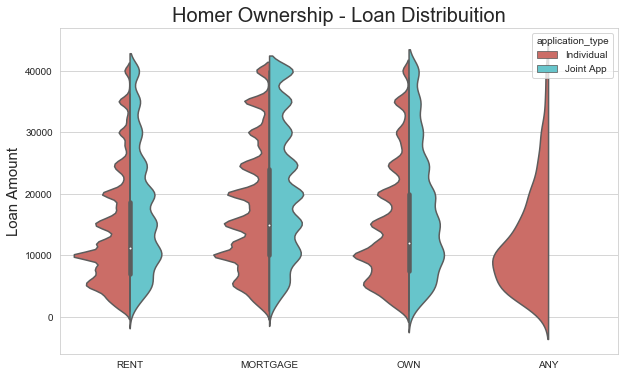

In [159]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="home_ownership",y="loan_amount",data=loan_df,
               kind="violin",
               split=True,palette="hls",
               hue="application_type")
g.set_title("Homer Ownership - Loan Distribuition", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.show()

In [160]:
loan_df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'house', 'car', 'other',
       'vacation', 'home_improvement', 'small_business', 'major_purchase',
       'medical', 'renewable_energy', 'moving', 'wedding'], dtype=object)

Purposes count description: 
application_type    Individual  Joint App
purpose                                  
car                      10065        766
credit_card             234364      14979
debt_consolidation      531121      45240
home_improvement         64688       6808
house                     7392        419
major_purchase           22671       1673
medical                  11864       1514
moving                    6424        567
other                    64565       5055
renewable_energy           603         43
small_business            9640        756
vacation                  6887        464
wedding                      6          1


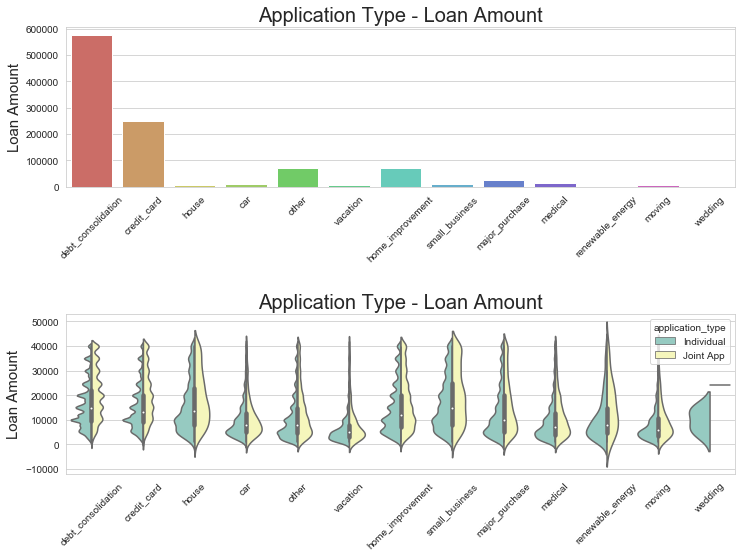

In [162]:
# Now will start exploring the Purpose variable
print("Purposes count description: ")
print(pd.crosstab(loan_df.purpose, loan_df.application_type))

plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.countplot(x="purpose",data=loan_df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Application Type - Loan Amount", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.subplot(212)
g1 = sns.violinplot(x="purpose",y="loan_amount",data=loan_df,
               hue="application_type", split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Application Type - Loan Amount", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Loan Amount", fontsize=15)

plt.subplots_adjust(wspace = 0.2, hspace = 0.8,top = 0.9)
plt.show()

In [83]:
# Lets' transform the issue dates by year.
loan_df['issue_d'].head()
#dt_series = pd.to_datetime(loan_df['issue_d'])
dt_series = pd.to_datetime(loan_df.issue_d.str.upper(), format='%b-%y', yearfirst=False)


In [95]:
loan_df['year'] = dt_series.dt.year
loan_df['month'] = dt_series.dt.month

In [96]:
loan_df['month']

0         12
1         12
2         12
3         12
4         12
5         12
6         12
7         12
8         12
9         12
10        12
11        12
12        12
13        12
14        12
15        12
16        12
17        12
18        12
19        12
20        12
21        12
22        12
23        12
24        12
25        12
26        12
27        12
28        12
29        12
30        12
31        12
32        12
33        12
34        12
35        12
36        12
37        12
38        12
39        12
40        12
41        12
42        12
43        12
44        12
45        12
46        12
47        12
48        12
49        12
50        12
51        12
52        12
53        12
54        12
55        12
56        12
57        12
58        12
59        12
60        12
61        12
62        12
63        12
64        12
65        12
66        12
67        12
68        12
69        12
70        12
71        12
72        12
73        12
74        12
75        12
76        12

Text(0, 0.5, 'Average loan amount issued')

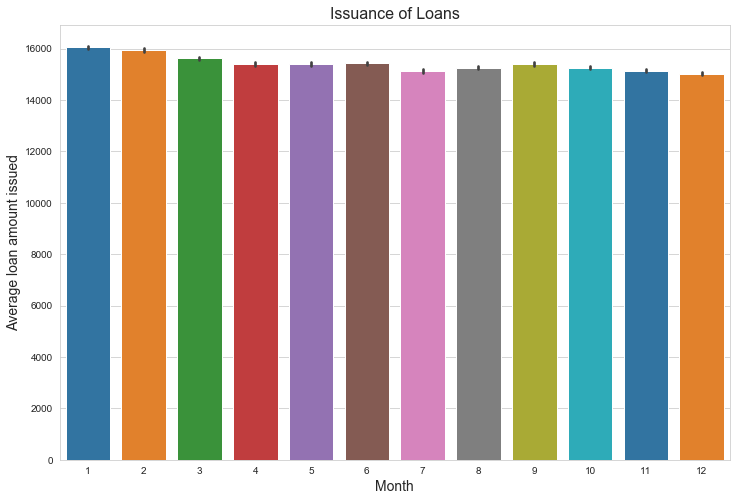

In [97]:
# The year of 2015 was the year were the highest amount of loans were issued 
# This is an indication that the economy is quiet recovering itself.
plt.figure(figsize=(12,8))
sns.barplot('month', 'loan_amount', data=loan_df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

In [98]:
loan_df["loan_status"].value_counts()

Current               603273
Fully Paid            331528
Charged Off            94286
Late (31-120 days)     12154
In Grace Period         5151
Late (16-30 days)       2162
Default                   21
Name: loan_status, dtype: int64

In [99]:
# Determining the loans that are bad from loan_status column

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]


loan_df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
loan_df['loan_condition'] = loan_df['loan_status'].apply(loan_condition)

[Text(0, 0.5, '(%)')]

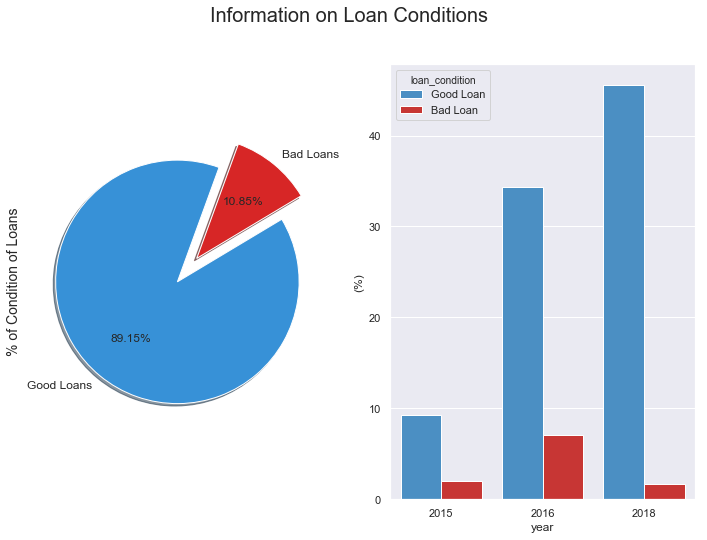

In [198]:
f, ax = plt.subplots(1,2, figsize=(12,8))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

loan_df["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="year", y="loan_amount", hue="loan_condition", data=loan_df, palette=palette, estimator=lambda x: len(x) / len(loan_df) * 100)
ax[1].set(ylabel="(%)")

Loans Issued by Region
In this section we want to analyze loans issued by region in order to see region patters that will allow us to understand which region gives Lending Club.

Summary: 
SouthEast , West and NorthEast regions had the highest amount lof loans issued.
West and SouthWest had a rapid increase in debt-to-income starting in 2012.
West and SouthWest had a rapid decrease in interest rates (This might explain the increase in debt to income).

In [102]:
loan_df['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



loan_df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


loan_df['region'] = loan_df['addr_state'].apply(finding_regions)

In [108]:
# This code will take the current date and transform it into a year-month format
loan_df['complete_date'] = pd.to_datetime(loan_df.issue_d.str.upper(), format='%b-%y', yearfirst=False)


group_dates = loan_df.groupby(['complete_date', 'region'], as_index=False).sum()

group_dates['issue_d'] = [month.to_period('M') for 
                          month in group_dates['complete_date']]

group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates['loan_amount'] = group_dates['loan_amount']/1000


df_dates = pd.DataFrame(data=group_dates[['issue_d','region','loan_amount']])


Text(0.5, 1.0, 'Loans issued by Region')

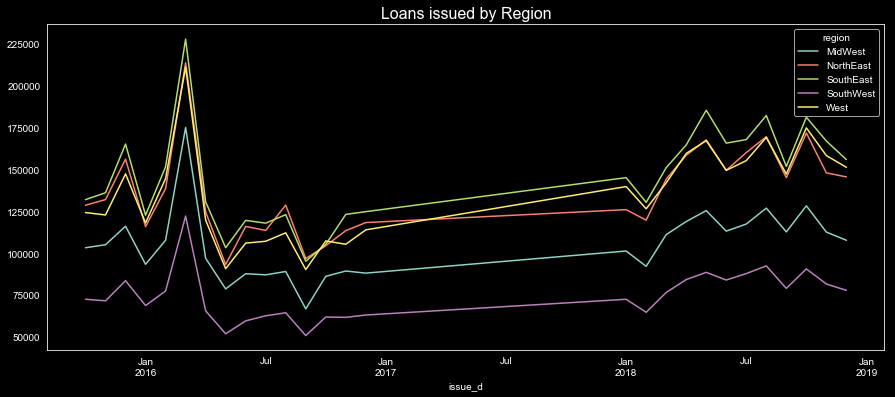

In [109]:
plt.style.use('dark_background')
cmap = plt.cm.Set3

by_issued_amount = df_dates.groupby(['issue_d', 'region']).loan_amount.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)

In [111]:
loan_df.emp_length.unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [113]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

lst = [loan_df]
loan_df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0

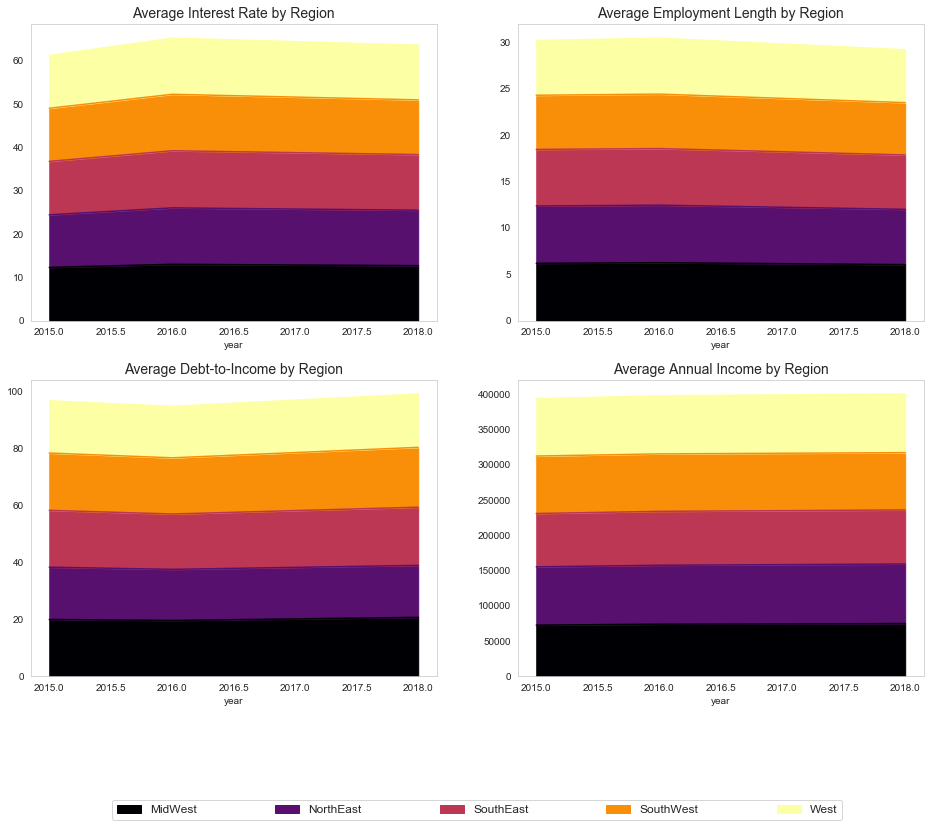

In [114]:
# Loan issued by Region and by Credit Score grade
# Change the colormap for tomorrow!

sns.set_style('whitegrid')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.inferno

by_interest_rate = loan_df.groupby(['year', 'region']).interest_rate.mean()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest Rate by Region', fontsize=14)


by_employment_length = loan_df.groupby(['year', 'region']).emp_length_int.mean()
by_employment_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employment Length by Region', fontsize=14)
# plt.xlabel('Year of Issuance', fontsize=14)

by_dti = loan_df.groupby(['year', 'region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average Debt-to-Income by Region', fontsize=14)

by_income = loan_df.groupby(['year', 'region']).annual_income.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Annual Income by Region', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)

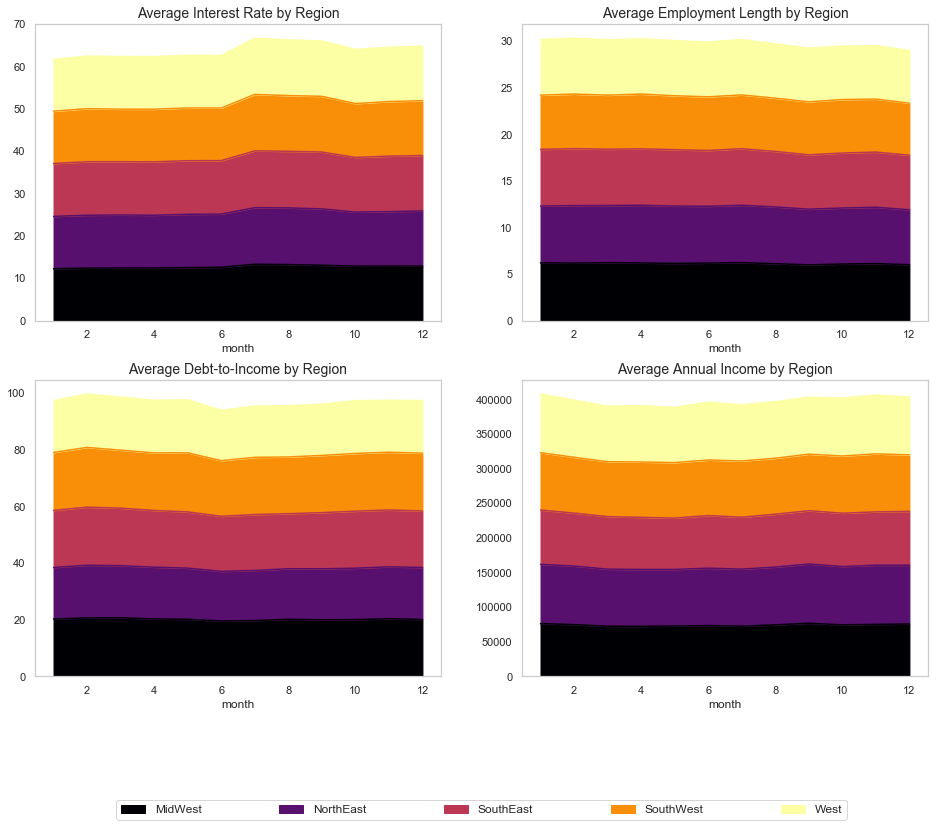

In [200]:
# Loan issued by Region and by Credit Score grade
# Change the colormap for tomorrow!

sns.set_style('whitegrid')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.inferno

by_interest_rate = loan_df.groupby(['month', 'region']).interest_rate.mean()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest Rate by Region', fontsize=14)


by_employment_length = loan_df.groupby(['month', 'region']).emp_length_int.mean()
by_employment_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employment Length by Region', fontsize=14)
# plt.xlabel('Year of Issuance', fontsize=14)

by_dti = loan_df.groupby(['month', 'region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average Debt-to-Income by Region', fontsize=14)

by_income = loan_df.groupby(['month', 'region']).annual_income.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Annual Income by Region', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)

A Deeper Look into Bad Loans:

What we need to know:
The number of loans that were classified as bad loans for each region by its loan status. (This will be shown in a dataframe below.)
This won't give us the exact reasons why a loan is categorized as a bad loan (other variables that might have influence the condition of the loan) but it will give us a deeper insight on the level of risk in a particular region.

Summary:

The regions of the West and SouthEast had a higher percentage in most of the b "bad" loan statuses.
The NorthEast region had a higher percentage in Grace Period and Does not meet Credit Policy loan status. However, both of these are not considered as bad as default for instance.
Based on this small and brief summary we can conclude that the West and SouthEast regions have the most undesirable loan status, but just by a slightly higher percentage compared to the NorthEast region.
Again, this does not tell us what causes a loan to be a bad loan , but it gives us some idea about the level of risk within the regions across the United States.


In [120]:
# We have 113774 loans categorized as bad loans
badloans_df = loan_df.loc[loan_df["loan_condition"] == "Bad Loan"]

# loan_status cross
loan_status_cross = pd.crosstab(badloans_df['region'], badloans_df['loan_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_df['region'], badloans_df['loan_status'])




In [125]:
badloans_df.loan_status.unique()

array(['Late (31-120 days)', 'In Grace Period', 'Charged Off',
       'Late (16-30 days)', 'Default'], dtype=object)

In [122]:
loan_status_cross

loan_status,Charged Off,Default,In Grace Period,Late (16-30 days),Late (31-120 days)
region,,,,,
MidWest,17.73,23.81,16.016308,14.477336,16.151061
NorthEast,22.70,23.81,26.169676,26.133210,24.123745
SouthEast,25.21,14.29,26.092021,25.763182,25.876255
SouthWest,12.73,14.29,12.133566,12.488437,12.555537
West,21.63,23.81,19.588429,21.137835,21.293401


In [123]:
loan_status_cross[['Charged Off']]

loan_status,Charged Off
region,
MidWest,17.73
NorthEast,22.70
SouthEast,25.21
SouthWest,12.73
West,21.63


In [126]:
# Round our values
loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))
loan_status_cross['In Grace Period'] = loan_status_cross['In Grace Period'].apply(lambda x: round(x, 2))
loan_status_cross['Late (16-30 days)'] = loan_status_cross['Late (16-30 days)'].apply(lambda x: round(x, 2))
loan_status_cross['Late (31-120 days)'] = loan_status_cross['Late (31-120 days)'].apply(lambda x: round(x, 2))



In [127]:
number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 
# number_of_badloans
number_of_loanstatus

loan_status,Charged Off,Default,In Grace Period,Late (16-30 days),Late (31-120 days),Total
region,,,,,,
MidWest,16714,5,825,313,1963,19820
NorthEast,21402,5,1348,565,2932,26252
SouthEast,23772,3,1344,557,3145,28821
SouthWest,12000,3,625,270,1526,14424
West,20398,5,1009,457,2588,24457


In [132]:
# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# plotly.tools.set_credentials_file(username='AlexanderBach', api_key='o4fx6i1MtEIJQxfWYvU1')




In [133]:
charged_off = loan_status_cross['Charged Off'].values.tolist()
default = loan_status_cross['Default'].values.tolist()
grace_period = loan_status_cross['In Grace Period'].values.tolist()
short_pay = loan_status_cross['Late (16-30 days)'] .values.tolist()
long_pay = loan_status_cross['Late (31-120 days)'].values.tolist()



charged = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= charged_off,
    name='Charged Off',
    marker=dict(
        color='rgb(192, 148, 246)'
    ),
    text = '%'
)

defaults = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y=default,
    name='Defaults',
    marker=dict(
        color='rgb(176, 26, 26)'
    ),
    text = '%'
)



grace = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= grace_period,
    name='Grace Period',
    marker = dict(
        color='rgb(147, 147, 147)'
    ),
    text = '%'
)

short_pays = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= short_pay,
    name='Late Payment (16-30 days)', 
    marker = dict(
        color='rgb(246, 157, 135)'
    ),
    text = '%'
)

long_pays = go.Bar(
    x=['MidWest', 'NorthEast', 'SouthEast', 'SouthWest', 'West'],
    y= long_pay,
    name='Late Payment (31-120 days)',
    marker = dict(
        color = 'rgb(238, 76, 73)'
        ),
    text = '%'
)




data = [charged, defaults, grace, short_pays, long_pays]
layout = go.Layout(
    barmode='stack',
    title = '% of Bad Loan Status by Region',
    xaxis=dict(title='US Regions')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

The Business Perspective
Understanding the Operative Side of Business
 

Now we will have a closer look at the operative side of business by state. This will give us a clearer idea in which state we have a higher operating activity. This will allow us to ask further questions such as Why do we have a higher level of operating activity in this state? Could it be because of economic factors? or the risk level is low and returns are fairly decent? Let's explore!
What we need to know:
We will focus on three key metrics: Loans issued by state (Total Sum), Average interest rates charged to customers and average annual income of all customers by state.
The purpose of this analysis is to see states that give high returns at a descent risk.
Summary:
California, Texas, New York and Florida are the states in which the highest amount of loans were issued.
Interesting enough, all four states have a approximate interest rate of 13% which is at the same level of the average interest rate for all states (13.24%)
California, Texas and New York are all above the average annual income (with the exclusion of Florida), this might give possible indication why most loans are issued in these states.

In [134]:
# Plotting by states

# Grouping by our metrics
# First Plotly Graph (We evaluate the operative side of the business)
by_loan_amount = loan_df.groupby(['region','addr_state'], as_index=False).loan_amount.sum()
by_interest_rate = loan_df.groupby(['region', 'addr_state'], as_index=False).interest_rate.mean()
by_income = loan_df.groupby(['region', 'addr_state'], as_index=False).annual_income.mean()





In [138]:
# Take the values to a list for visualization purposes.
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amount'].values.tolist()
average_interest_rates = by_interest_rate['interest_rate'].values.tolist()
average_annual_income = by_income['annual_income'].values.tolist()


from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income)])
                     

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head()



# Think of a way to add default rate
# Consider adding a few more metrics for the future

,state_codes,issued_loans,interest_rate,annual_income
0,IL,664021250,12.68,81494.61
1,IN,267292175,12.80,71617.15
2,KS,130144150,12.62,72807.35
3,MI,398304700,12.86,73151.64
4,MN,269347275,12.65,75775.60


In [139]:
# Now it comes the part where we plot out plotly United States map
import plotly.plotly as py
import plotly.graph_objs as go


for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].astype(str)
    
scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],\
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

metrics_df['text'] = metrics_df['state_codes'] + '<br>' +\
'Average loan interest rate: ' + metrics_df['interest_rate'] + '<br>'+\
'Average annual income: ' + metrics_df['annual_income'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = metrics_df['state_codes'],
        z = metrics_df['issued_loans'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]


layout = dict(
    title = 'Lending Clubs Issued Loans <br> (A Perspective for the Business Operations)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

Analysis by Income Category:¶
In this section we will create different income categories in order to detect important patters and go more into depth in our analysis.

What we need to know: 

Low income category: Borrowers that have an annual income lower or equal to 100,000 usd.
Medium income category: Borrowers that have an annual income higher than 100,000 usd but lower or equal to 200,000 usd.
High income category: Borrowers that have an annual income higher tha 200,000 usd.
Summary:

Borrowers that made part of the high income category took higher loan amounts than people from low and medium income categories. Of course, people with higher annual incomes are more likely to pay loans with a higher amount. (First row to the left of the subplots)
Loans that were borrowed by the Low income category had a slightly higher change of becoming a bad loan. (First row to the right of the subplots)
Borrowers with High and Medium annual incomes had a longer employment length than people with lower incomes.(Second row to the left of the subplots)
Borrowers with a lower income had on average higher interest rates while people with a higher annual income had lower interest rates on their loans. (Second row to the right of the subplots)

In [140]:
# Let's create categories for annual_income since most of the bad loans are located below 100k

loan_df['income_category'] = np.nan
lst = [loan_df]

for col in lst:
    col.loc[col['annual_income'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_income'] > 100000) & (col['annual_income'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_income'] > 200000, 'income_category'] = 'High'

In [144]:
# Let's transform the column loan_condition into integrers.

lst = [loan_df]
loan_df['loan_condition_int'] = np.nan

for col in lst:
    col.loc[loan_df['loan_condition'] == 'Good Loan', 'loan_condition_int'] = 0 # Negative (Bad Loan)
    col.loc[loan_df['loan_condition'] == 'Bad Loan', 'loan_condition_int'] = 1 # Positive (Good Loan)
    
# Convert from float to int the column (This is our label)  
loan_df['loan_condition_int'] = loan_df['loan_condition_int'].astype(int)

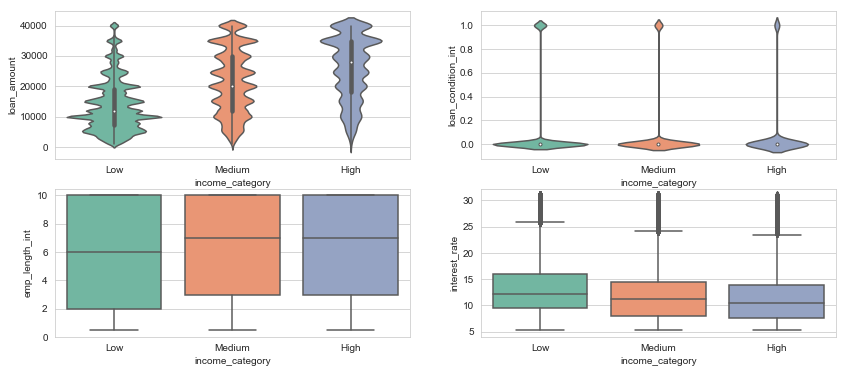

In [146]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

# Change the Palette types tomorrow!

sns.violinplot(x="income_category", y="loan_amount", data=loan_df, palette="Set2", ax=ax1 )
sns.violinplot(x="income_category", y="loan_condition_int", data=loan_df, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="emp_length_int", data=loan_df, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="interest_rate", data=loan_df, palette="Set2", ax=ax4)

Assesing Risks
Understanding the Risky side of Business
Although the operative side of business is important, we have to also analyze the level of risk in each state. Credit scores are important metrics to analyze the level of risk of an individual customer. However, there are also other important metrics to somehow estimate the level of risk of other states. 


What we need to know:
Debt-to-income is an important metric since it says approximately the level of debt of each individual consumer with respect to its total income.
The average length of employment tells us a better story about the labor market in each state which is helpful to assess the levelof risk.
Summary:
IOWA has the highest level of default ratio neverthless, the amount of loans issued in that state is too low. (Number of Bad loans is equal to 3)
California and Texas seem to have the lowest risk and the highest possible return for investors. However, I will look more deeply into these states and create other metrics analyze the level of risk for each state.

In [147]:
by_condition = loan_df.groupby('addr_state')['loan_condition'].value_counts()/ loan_df.groupby('addr_state')['loan_condition'].count()
by_emp_length = loan_df.groupby(['region', 'addr_state'], as_index=False).emp_length_int.mean().sort_values(by="addr_state")

loan_condition_bystate = pd.crosstab(loan_df['addr_state'], loan_df['loan_condition'] )

cross_condition = pd.crosstab(loan_df["addr_state"], loan_df["loan_condition"])
# Percentage of condition of loan
percentage_loan_contributor = pd.crosstab(loan_df['addr_state'], loan_df['loan_condition']).apply(lambda x: x/x.sum() * 100)
condition_ratio = cross_condition["Bad Loan"]/cross_condition["Good Loan"]
by_dti = loan_df.groupby(['region', 'addr_state'], as_index=False).dti.mean()
state_codes = sorted(states)


# Take to a list
default_ratio = condition_ratio.values.tolist()
average_dti = by_dti['dti'].values.tolist()
average_emp_length = by_emp_length["emp_length_int"].values.tolist()
number_of_badloans = loan_condition_bystate['Bad Loan'].values.tolist()
percentage_ofall_badloans = percentage_loan_contributor['Bad Loan'].values.tolist()


# Figure Number 2
risk_data = OrderedDict([('state_codes', state_codes),
                         ('default_ratio', default_ratio),
                         ('badloans_amount', number_of_badloans),
                         ('percentage_of_badloans', percentage_ofall_badloans),
                         ('average_dti', average_dti),
                         ('average_emp_length', average_emp_length)])


# Figure 2 Dataframe 
risk_df = pd.DataFrame.from_dict(risk_data)
risk_df = risk_df.round(decimals=3)
risk_df.head()

,state_codes,default_ratio,badloans_amount,percentage_of_badloans,average_dti,average_emp_length
0,AK,0.128,260,0.229,19.261,6.097
1,AL,0.152,1646,1.447,20.727,6.455
2,AR,0.146,1028,0.904,21.295,6.262
3,AZ,0.120,2721,2.392,19.557,5.649
4,CA,0.126,15783,13.872,19.762,5.941


In [148]:
# Now it comes the part where we plot out plotly United States map
import plotly.plotly as py
import plotly.graph_objs as go


for col in risk_df.columns:
    risk_df[col] = risk_df[col].astype(str)
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'],\
            [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(232, 70, 54)'],[1.0, 'rgb(212, 31, 13)']]

risk_df['text'] = risk_df['state_codes'] + '<br>' +\
'Number of Bad Loans: ' + risk_df['badloans_amount'] + '<br>' + \
'Percentage of all Bad Loans: ' + risk_df['percentage_of_badloans'] + '%' +  '<br>' + \
'Average Debt-to-Income Ratio: ' + risk_df['average_dti'] + '<br>'+\
'Average Length of Employment: ' + risk_df['average_emp_length'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = risk_df['state_codes'],
        z = risk_df['default_ratio'], 
        locationmode = 'USA-states',
        text = risk_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]


layout = dict(
    title = 'Lending Clubs Default Rates <br> (Analyzing Risks)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

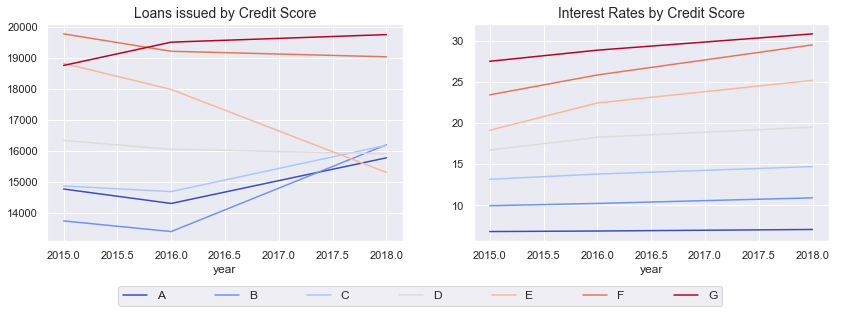

In [172]:
# Let's visualize how many loans were issued by creditscore
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = loan_df.groupby(['year', 'grade']).loan_amount.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = loan_df.groupby(['year', 'grade']).interest_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

Text(0, 0.5, 'Interest Rate (%)')

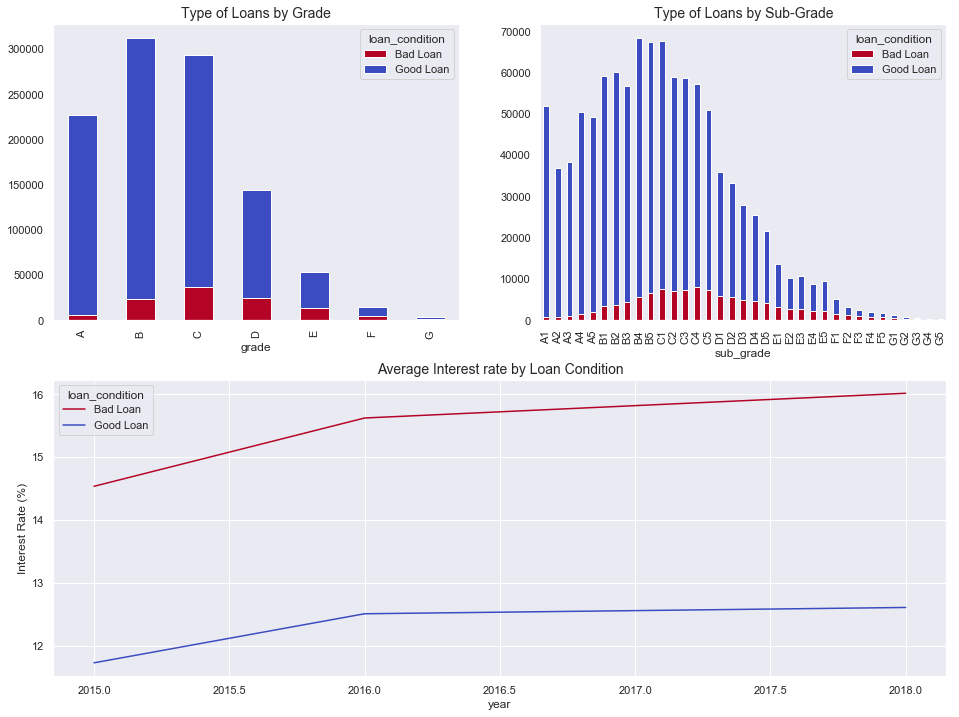

In [174]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = loan_df.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_grade = loan_df.groupby(['sub_grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

by_interest = loan_df.groupby(['year', 'loan_condition']).interest_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

What Determines a Bad Loan
My main aim in this section is to find the main factors that causes for a loan to be considered a "Bad Loan". Logically, we could assume that factors such as a low credit grade or a high debt to income could be possible contributors in determining whether a loan is at a high risk of being defaulted. 

What we need to know:
There might be possible factors that contribute in whether a loan is bad or not.
Factors that increase risk include: low annual income, high debt to income, high interest rates, low grade, among others.
Summary:
The types of bad loans in the last year are having a tendency to decline, except for late payments (might indicate an economical recovery.)
Mortgage was the variable from the home ownership column that used the highest amount borrowed within loans that were considered to be bad.
There is a slight increase on people who have mortgages that are applying for a loan.
People who have a mortgage (depending on other factors as well within the mortgage) are more likely to ask for

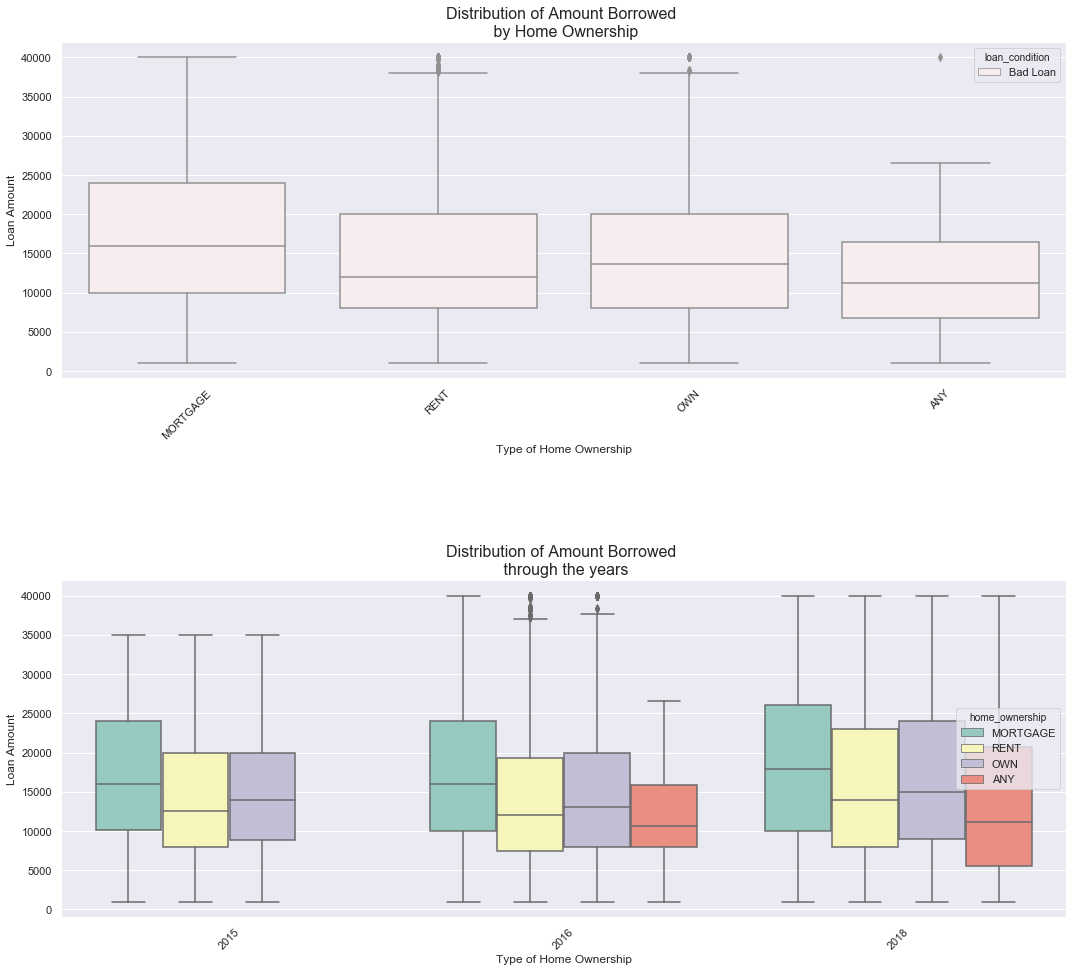

In [176]:
import seaborn as sns

plt.figure(figsize=(18,18))

# Create a dataframe for bad loans
bad_df = loan_df.loc[loan_df['loan_condition'] == 'Bad Loan']

plt.subplot(211)
g = sns.boxplot(x='home_ownership', y='loan_amount', hue='loan_condition',
               data=bad_df, color='r')

g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Type of Home Ownership", fontsize=12)
g.set_ylabel("Loan Amount", fontsize=12)
g.set_title("Distribution of Amount Borrowed \n by Home Ownership", fontsize=16)



plt.subplot(212)
g1 = sns.boxplot(x='year', y='loan_amount', hue='home_ownership',
               data=bad_df, palette="Set3")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Type of Home Ownership", fontsize=12)
g1.set_ylabel("Loan Amount", fontsize=12)
g1.set_title("Distribution of Amount Borrowed \n through the years", fontsize=16)


plt.subplots_adjust(hspace = 0.6, top = 0.8)
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABDcAAAPMCAYAAABWv1KDAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzs3XlcVdX+//H3gQNOqIiCmqmZJJqioAhhCqVfAQfSLG/mXGoOqWk3zMwhrNSrXMWxrjmVZeIUliJWVnbVUsTUzKHBoZRCQJRRpnN+f/jzXBEUMBGPvJ6Ph4/Y6+y99mdv2fbgzVprG8xms1kAAAAAAABWyqasCwAAAAAAAPg7CDcAAAAAAIBVI9wAAAAAAABWjXADAAAAAABYNcINAAAAAABg1Qg3AAC4zcryRWS8BO3uwd8FAAB3DuEGAKDcGTBggNzc3Cx/Hn74Yfn4+Gjo0KH67rvv8u27adMmubm56cKFC8Xqe//+/Ro7dmyR+7m5uWn58uWSpIULF8rT07PkF3KdX375RYMGDbJs7927V25ubvrxxx//dt+3w8yZM+Xl5aXWrVsrNjb2pvuuWrVKbm5uCg0NvUPV3V7r1q1TeHj4Tfe59nvQzc1NLVq0UMeOHTVnzhxlZWXdoUrLTkmfLQAAbsZY1gUAAFAWWrdurVdffVWSlJubq/Pnz2vt2rV67rnnFBYWpu7du0uSHnvsMUVERKhatWrF6nfDhg06depUkftFRETovvvuu/ULKER0dHS+IKN58+aKiIhQ48aNb+t5bsWJEye0atUqDRo0SJ07d1azZs1uuv/mzZv10EMPacuWLXr11VdVsWLFO1Tp7fHuu+/qscceK3K/AQMGWL7XsrKydOLECYWHhys1NVXTp08v5SoBALh3EG4AAMqlatWqycPDI19bUFCQBg0apDfeeEMdOnRQ9erV5eTkJCcnp9t+/uvPXRocHBzuyHmK49KlS5Kk7t27q2XLljfd95dfftHRo0e1cuVKDRs2TNHR0erZs+edKPOOq1u3br6/Ix8fH6WkpOjdd9/VlClTZGdnV4bVAQBgPZiWAgDA/2djY6NRo0YpNTVV0dHRkgoOnT958qSGDh1qmV4xZMgQHT9+XJI0ceJEffLJJ/rll1/k5uamvXv3atOmTfLx8dGyZcvk4+OjwMBAZWZm5puWclVkZKQef/xxtWrVSsOHD9eZM2csn02cONHyG/6rvvzyS7m5uens2bNauHChFi1apIyMDLm5uWnTpk2FTkv54osv9NRTT8nDw0P+/v4KDw9XTk6O5fOOHTvqvffe07Rp0+Tt7W0Z4ZKWlnbTe3f8+HENHTpU3t7e8vb2VkhIiBITEyVdmXYzYMAASVLv3r0tX9/IJ598ImdnZ/n6+srX11cbNmwosI+bm5s2bNigMWPGyMPDQ+3bt9eaNWsUHx+vF154Qa1atVJgYKB27tyZ77jiXP/1IybefvttdezYMd+5N23apPHjx8vT01M+Pj56++23lZuba+nj3Llz+uijj+Tm5nbTay1M1apVC7Td7P5KV74/Ro0apX/+859q3bq1xo8fb/n7X7t2rdq3by9/f3+dPXtWZrNZ69atU3BwsFq2bKmAgACtWrXK0lePHj00ceJEy/alS5fUtGlTy0gnSbpw4YKaNm1qub9nzpzRqFGj5OnpKS8vL4WEhBSYbhIZGanAwEC1bNlSw4YN08WLF0t8bwAAuBHCDQAAruHt7S1bW1v98MMPhX7+4osvKi8vT/PmzdO8efOUnJys4cOHKy8vT6NGjZK/v7/q16+viIgINW/eXJKUmpqqTZs2KSwsTOPHj1elSpUK9JuZmamwsDCNHTtWs2fP1unTp/X888/n+8H7Znr37q2nn35aFStWVERERKFTIiIiIjR69Gi5u7tr0aJF6t+/v1asWKHXXnst337/+c9/lJKSorlz52rcuHHaunWr3nnnnRue+9ixY3rmmWeUk5OjWbNmadKkSdq/f7/69++vjIwM9e7dW1OnTpV0Zd2NadOm3bAvk8mkLVu2KDg4WAaDQT169FBMTEyhU31mzpyphg0b6p133pGnp6fefPNNDR48WK1bt9b8+fPl4OCgkJAQZWZmluj6i2PGjBlycnLSkiVL1K9fP33wwQdat26dJGnRokVydnZWYGCgIiIibtqPyWRSbm6ucnNzdfnyZR06dEirV6/W008/bRm1UdT9vWrnzp3KysrS4sWL9cwzz1jalyxZounTp2v8+PG6//77NXfuXL3xxhvq2LGjlixZoqCgIM2ePVvz5s2TJHXo0EF79+61HB8TEyOz2az9+/db2nbv3i17e3v5+PgoMTFRffv2VVxcnGbPnq3Q0FAdPHhQQ4YMUXZ2tiRp27ZtevXVV/Xoo49q8eLFql+/vubOnVvi+w4AwI0wLQUAgGvY2trK0dEx32/Fr7pw4YJOnjypF198UR06dJB0ZVrBli1blJGRoQYNGsjJyUlxcXH5phrk5eVp7NixlmMKYzabNWfOHPn6+kqSHnzwQQUHB2vr1q3FmpJRp04d1alTRzY2NoVORTGZTAoPD1e3bt30xhtvSJLat2+vqlWratq0aRo6dKiaNm1q6Wvu3LkyGAxq37699u3bp2+//VYhISGFnnvJkiVycnLSe++9J3t7e0lSixYtFBwcrI0bN2rAgAFydXWVJD300EOWrwuzZ88excfHq0ePHpKkzp07q0qVKtqwYUOB83t6euqVV16RJNWuXVuff/65PDw8NGLECElShQoVNHjwYJ0+fVpubm7Fvv7i8PT01JQpUyRJvr6++vrrr/Xtt9+qb9++evjhh2Vvb69atWoVOS0oLCxMYWFh+doaNGig0aNHW7aLc3+lK2vHTJ8+3TKN6mpAMWjQIMvIk+TkZK1cuVJDhgzR+PHjLffBbDZr+fLlGjRokPz8/PTee+/p999/V4MGDbR37149/PDDOnr0qOLj41W7dm3t3r1b3t7eqlixohYvXqysrCytWLHCcu6WLVsqMDBQUVFR6tmzp5YuXaoOHTpYQq4OHTooLi5OX3/9dbHvOQAAN8PIDQAAisnR0VEPPPCApkyZokmTJmn79u2qV6+eXn755UKnElzrZj/QS1emIlwNNqQrIUD9+vVv25tOfvvtN124cEFBQUH52q9Odbn2t/Lu7u4yGAyW7Tp16uQbIXC9mJgYderUyfKDt3Tlet3c3BQTE1OiOiMjI9W4cWPdd999SklJUXZ2th5//HFFRkZapn1cde3aHbVq1ZJ05Yf+qxwdHSVJKSkpJbr+4mjVqlW+7dq1a9/0Ht3IwIEDtWHDBm3YsEEff/yxZsyYoby8PD377LOWdUqKe39vtD7Mtd97hw4dUk5OToH70K1bN+Xk5OjQoUPy9PSUg4ODvv/+e0nSvn371KdPH1WpUsXylpvdu3fL399f0pUQxcPDQ9WqVbOMQqlbt64aN26s7777TpmZmTp27Jj8/PzynTMwMLDE9wsAgBth5AYAANfIysrSpUuXVLt27QKf2djYaNWqVVq4cKF27NihjRs3qmLFihoyZIjGjBmTLxC4XlGLktasWbPQY86fP1/yiyjE1R+Urz+Pg4ODKlSokG9NjeunzRgMBpnN5hv2nZKSUmj9NWvWLHKtjmulp6drx44dysjIUNu2bQt8/vXXX6tz586W7SpVqhTYp7ApP1LJrr84rj+PjY3NTe/RjdSpU0fu7u6W7datW6tx48Z65plntGHDBg0ZMqTY97ewfaT833tX78PVMOj6Y9PS0mRnZydfX1/t3btXgYGB+vnnn+Xt7S1PT0/t379frq6uOn/+vCXcuHjxog4dOmSZhnUtZ2dnpaSkyGw2q0aNGvk+u74GAAD+DsINAACusX//fuXm5qpNmzaFfl63bl3NmDFDJpNJBw8e1Pr167V48WK5urqqa9eut3zelJSUAm2JiYlq0qSJpCsBg8lkyvd5enp6sfu/OoohKSmpwHmzsrIsn9+K6tWrF+hXulJ/SV5Du337dmVkZGjhwoWqXr16vs8mTJig9evX5ws3SqIk13/9fb6VERl/x9VFSK8uKHu77q/0v/uQmJiYL8C7Og3r6ucdOnTQwoULtX//ftWsWVONGjVS27ZtFRUVpQYNGuiBBx5QgwYNJF0JiPz8/DR27NgC56tSpYqqV68ug8FQ4BpYUBQAcDsxLQUAgP/PbDZr6dKlcnR0VEBAQIHPjx8/rvbt2+unn36SjY2NWrdurbfeektGo1FxcXGSrvwG/1ZcuHBBP/30k2X7p59+0tmzZ+Xt7S3pyg+JSUlJ+X7wvjpF4KqbnbtRo0aqUaOG5S0wV0VFRUm6MmLgVrVp00Y7duywLB4pXZkG8/PPP5eo38jISDVv3lwBAQHy8fHJ96dr167atWuX/vrrr1uqsbjX7+DgkG+0jMlkuuHisjdzq98HkixTkRo2bCjp9t1f6cqUIzs7u0Lvg9FotEz18fPzU0JCgjZs2GAJ+ry8vPTzzz8rKioq3xSTNm3a6OTJk3Jzc5O7u7vc3d3VpEkTLVq0SLGxsapYsaI8PDz05Zdf5jvn9W+yAQDg72DkBgCgXEpJSdHBgwclXVmIMT4+XuvXr1dMTIzCwsLk4OBQ4BhXV1dVqVJFr776qkaPHq3q1asrMjJSBoPB8naSatWq6a+//tLu3bvzrf9QFHt7e7388st65ZVXlJOTo7CwMDVt2tSyLoGfn59Wr16t0NBQde3aVd9//32BHxarVaumzMxMffnll/nWo5CuLJQ6evRovfnmm6pevbo6deqkEydOaOHChQoKCrKMELkVI0aMUJ8+fTRs2DANHjxYqampCg8PV7169Yq1GKok/fnnn4qJibEscnm9J554QitWrNDGjRv14osvlrjG4l6/n5+fVq5cqdWrV8vV1VVr165VUlJSoVNgbqZatWr66aefFBMTIy8vrxtOWfrzzz8t34dms1l//PGHwsPD5ejoqCeffFLS7bm/Vzk5OWnAgAFavny5bG1t1bZtW8XExGj58uV67rnnLCNm6tatK1dXV3311VeWhVNbtmwpe3t7HTp0KN8ojeeee06bN2/W0KFDNXDgQNnZ2WnFihU6ePCgxo0bJ0kaM2aMhg4dqtdee+2G378AAPwdhBsAgHLpwIEDltdl2tnZydnZWe7u7vr4448LLBZ5ldFo1Hvvvad//etfeuONN5SRkSE3Nzf95z//sSza+Mwzz+jrr7/W8OHDNXv27GLXU69ePQ0ePFihoaFKT0+Xv7+/pkyZYllE0s/PT+PHj9eHH36oyMhI+fr6atasWRo2bJilj27duikyMlLjxo3TSy+9VCDg6N+/vypWrKgVK1Zo/fr1cnFx0XPPPadRo0aV6N5dr0WLFnr//fc1d+5cvfTSS6pUqZL8/f0VEhJSaEhUmE8//VQmk6nAQpdXNWvWTK6urtq4ceMt11uc6x8xYoQSEhI0b948GY1GPfHEExo+fLg+/PDDEp1r+PDhlrewbN++XXXq1Cl0v9WrV2v16tWSroz2cHR0VLt27TR69GjLWhm34/5eKyQkRDVq1FBERISWLVumevXqacKECRo0aFC+/fz8/PTrr7/Ky8tL0pUArlWrVvrxxx8tI4ok6b777tOaNWs0Z84chYSEyGAwqHnz5lq5cqWaNWsmSXr00Ue1cOFCzZ8/X1u2bJG7u7tCQkI0ffr0EtcPAEBhDOZbWf0KAAAAAADgLsGaGwAAAAAAwKoRbgAAAAAAAKtGuAEAAAAAAKwa4QYAAAAAALBqhBsAAAAAAMCqEW4AAGBFFi5cKE9Pz9veb8eOHW/4Ws5NmzbJzc1NFy5cuO3nvV3MZrM+/fRT9e/fX15eXvL09NSTTz6pVatWKSsrq6zLu2Vubm5avnz5DT8/e/as3NzcFB0dfQerAgDg7mMs6wIAAAD+DpPJpJCQEG3btk1PPfWUhg4dKjs7O8XExGjBggXasmWLli5dKicnp7Iu9bZzcXFRRESEHnjggbIuBQCAMkW4AQAArNqKFSu0detWLViwQAEBAZb2Rx99VEFBQXr22Wc1bdo0LVy4sAyrLB329vby8PAo6zIAAChzTEsBAMAKRUZG6vHHH1erVq00fPhwnTlzRpJ04sSJQqcpfPbZZ2rRooWSk5Nvy/ljYmLUr18/tW7dWu3atdP06dOVnp5u+XzAgAF6++23NWfOHD3yyCNq3bq1pk2bpoyMDL311lvy8vJS+/bt9Z///Cdfv2fOnNGoUaPk6ekpLy8vhYSE3HQ6TG5urpYtW6bHHnssX7BxVdOmTfX888/r888/12+//aZVq1apZcuW+aaqjBo1Si1atMjXNnz4cL300kuWaR9fffWVhgwZolatWqlDhw5655138p0nIyNDb775ptq1a6eWLVtqwIABOnr0qOXzTZs2ycfHR8uWLZOPj48CAwOVmZmpQ4cOqV+/fvL09JS3t7fGjh2rc+fO5ev74sWLevnll+Xp6SkfHx/NmDFDOTk5kgpOS5k4caKGDx+uFStWqF27dvLy8tI///lPXbx48Yb3EACAewHhBgAAViYzM1NhYWEaO3asZs+erdOnT+v5559XTk6O3Nzc1KxZM23dujXfMZ999pn8/f1Vo0aNG/ZrNpuVm5tb4I/JZMq3386dOzVw4EA5Oztr3rx5GjNmjLZu3arhw4fn23fjxo367bffNHfuXD3//PNau3atnnzySaWmpmrevHny9fXV3Llz9cMPP0iSEhMT1bdvX8XFxWn27NkKDQ3VwYMHNWTIEGVnZxda89GjR5WcnCw/P78bXtfV0GPnzp3q0KGDsrKydODAAcs1x8bGKicnR4cPH5Yk5eTkaN++ffn6fO2119SqVSu9++67evzxxxUeHq6dO3da+hg5cqS2bt2qcePGaf78+bK3t9eAAQP0+++/W/pITU3Vpk2bFBYWpvHjx0uSXnjhBdWuXVtLlizRm2++qaNHj+rll1/OV/+yZctUo0YNLVmyRH369NH777+vtWvX3vB6Y2NjtWbNGk2ZMkWTJ0/Wnj17NHLkyBvuDwDAvYBpKQAAWBmz2aw5c+bI19dXkvTggw8qODhYW7duVc+ePdWzZ0/9+9//VmpqqqpWraoLFy5o9+7dmjdv3k37XbNmjdasWVPk+efPn6+WLVsqPDzc0nb//fdr6NCh+uabb9SxY0dJkq2trcLDw1WxYkW1a9dOa9eulclk0syZM2VjYyMfHx9t3bpVhw4dkqenp95//31lZWVpxYoVlvUxWrZsqcDAQEVFRalnz54Fark6yqFevXo3rPf++++XJMXFxalx48aqV6+e9u7dK19fXx0/flwZGRlydXXV/v371bZtWx04cECZmZny8/OzjObo0qWLxo4dK0ny8fHR9u3b9e2338rf31+7du3S999/r5UrV6pdu3aSpA4dOqhbt2565513NHPmTElSXl6exo4dqw4dOkiSDh8+rIsXL2rAgAGWRWJr1Kih77//XiaTSTY2V34H1a5dO02ZMkWS5Ovrq6+++kp79+7VgAEDCr3etLQ0rV27Vq6urpIkR0dHDR8+XPv27ZO3t/dN/mYBALBejNwAAMDKVK1a1RJsSNJDDz2k+vXr68cff5QkBQcHy2Qy6YsvvpAkRUVFqUqVKnrsscdu2m+XLl20YcOGAn9Gjx5t2Sc9PV1Hjx5VUFBQvmM7dOig6tWrKyYmxtLm5uamihUrWrZr1qyphx9+2PJDu729vSpXrqzU1FRJ0t69e+Xh4aFq1apZRo3UrVtXjRs31nfffVdozWazWZJkNN749zXXf9ahQwd9//33lnO6u7vL29tbsbGxkqTdu3fr4YcflrOzs+WYa9e1sLGxkYuLizIyMix9VKpUSW3btrXULUnt27e3nOeqq4GDdCWUcnR01IgRIzR9+nTt3LlTHh4eGjt2rOUeSSrwdpx69eopJSXlhtfr5uaW7zz+/v6ys7PT/v37b3gMAADWjpEbAABYmZo1axZoc3Jy0vnz5y2fd+jQQVu3blWvXr302WefKSgoSPb29jft18nJSe7u7gXaf/nlF8vXqampMpvNN6whLS3Nsl2lSpUC+1SqVOmG57948aIOHTqk5s2bF/js2qDhWteOyriRs2fPSpLq1KkjSfLz89PGjRuVkZGhffv2ycvLS02aNNGnn34qk8mkXbt2FZjmcm1II10JOK4GKxcvXlRmZqZatGhR4Nx2dnb5tq99Y4uDg4M+/PBDLV68WJ988ok++ugjVatWTePHj1ffvn0t+11/z649d2Guv1cGg0GOjo66dOnSDY8BAMDaEW4AAGBlCvutfWJiopo0aWLZ7tGjh1555RX9/PPPOnjwoCZMmHBbzl21alUZDAYlJSUVWoOjo+Mt9+3g4CA/Pz/L9I9rFRaUSFKLFi3k7OysL7/8Ur179y50nx07dkiSZeTKI488Iknav3+/YmNj1adPH7m5uSktLU3fffedjh07psmTJxe77qpVq6pmzZoFFkctjoceekjh4eHKzs5WbGys3n//fYWGhqp58+Zq1apVifuTVGDxUJPJpOTk5EIDKQAA7hVMSwEAwMpcuHBBP/30k2X7p59+0tmzZ/Otp9CpUydVrlxZoaGhuv/++9WmTZvbcu4qVaqoWbNmBd7G8t///lepqalq3br1Lffdpk0bnTx5Um5ubnJ3d5e7u7uaNGmiRYsWWaaMXM/GxkbDhw/XN998oy1bthT4/LffftPSpUvVsWNHy1SNKlWqqE2bNvr4448tNdeuXVsNGjTQwoULVa1atRIFC23atNGFCxdUuXJlS93u7u767LPP9Omnn97wuG+//Va+vr66cOGC7O3t5evra1lb42YjUYpy/Phx/fXXX5btb775Rrm5ufLx8bnlPgEAuNsxcgMAACtjb2+vl19+Wa+88opycnIUFhampk2bKjAwMN8+Xbp0UUREhF588cXbev4xY8Zo1KhRGjdunHr16qU///xTc+fOlaen503fWlKU5557Tps3b9bQoUM1cOBA2dnZacWKFTp48KDGjRt3w+P69++vo0ePKiQkRHv37tX//d//qUKFCoqNjdWqVavUoEEDvf322/mO6dChg+bMmaPmzZvLwcFBkuTl5aVNmzape/fusrW1LXbdjz/+uNzd3fXCCy9o9OjRqlu3rj7//HN99NFHCg0NveFxLVu2lNls1ujRozVs2DDZ2dnp/fffV7Vq1f5WEJGbm6sRI0Zo9OjRunTpksLCwvTYY4/d8kgQAACsAeEGAABWpl69eho8eLBCQ0OVnp4uf39/TZkypcCaGn5+foqIiNATTzxxW8/fsWNHLV68WIsXL9aoUaPk6Oio7t27a/z48SUKBa533333ac2aNZozZ45CQkJkMBjUvHlzrVy5Us2aNbvhcQaDQTNnzpS/v7/WrFmjCRMmKDs7Ww888IBGjhypfv36qUKFCvmO8fPz05w5c9S2bVtLm7e3tzZt2lTigMbW1lbLly9XWFiY5syZo7S0NDVs2FAzZ85Ur169bnico6Ojli1bpn//+9+aMGGCcnJy1LJlS61cuTLf2hwl5erqqi5dumjSpEkyGAwKDg7WK6+8csv9AQBgDQzmm61IBQAArNYbb7yhEydO6OOPPy7rUnCHTJw4UUeOHCl0ig4AAPcyRm4AAHCP2bBhg44dO6Z169Zp7ty5ZV0OAABAqSPcAADgHnPkyBFt3rxZ/fv3V1BQUFmXAwAAUOqYlgIAAAAAAKwar4IFAAAAAABWjXADAAAAAABYtXK75kZycrpMJmbkAAAAAABwt7CxMahGjSolPq7chhsmk5lwAwAAAACAewDTUgAAAAAAgFUj3AAAAAAAAFaNcAMAAAAAAFi1crvmBgAAAAAAxZGXl6vk5ATl5maXdSn3DKPRXjVqOMvW9vbEEoQbAAAAAADcRHJygipWrKwqVerIYDCUdTlWz2w2Kz09RcnJCapVq+5t6ZNpKQAAAAAA3ERubraqVKlGsHGbGAwGValS7baOhCHcAAAAAACgCAQbt9ftvp+EGwAAAAAAwKoRbgAA7hkff7zS8gfAvYtnHSgfMjMz9OWXUcrMzCjrUkokKuozLVoUXtZlFNvkyRN04MB+7dq1UxERH0mSpk+fooyMDB0/flSLF88v4wqLp9QXFP3Xv/6l5ORkzZo1S8eOHdPrr7+u9PR0eXl5KTQ0VEajUXFxcQoJCVFSUpIaNWqksLAwValSRSkpKXrllVf0xx9/yMnJSeHh4XJ2dlZ2drZef/11HTlyRBUrVlRYWJgaN25c2pcCAAAAALhDjhw5qISEeB05clBt27Yr63Luee3b+1u+Pnz4oCSpadOH1bTpw2VVUomU6siN7777Tp988ollOyQkRFOnTtX27dtlNpu1bt06SVJoaKj69u2r6OhotWjRQkuWLJEkhYeHy8vLS9u2bVPv3r319ttvS5JWr16tSpUqadu2bZo0aZJee+210rwMAIAVuP43uPxGF7g38awD5UNmZoZOnfpVknTq1K9WN3pDkr78crsGDPiHBg58RqtXX/m3KiUlRZMnT9CwYYPUu3cP7djxhSRp9OgXtHjxfA0ZMkAjRz6vxMTEG/Z7+fJlTZs2Sf37/0PDhz+nc+fOSpKWLJmv/v3/ocGD++r77/fctN9PPtmgPn16acyY4YqP/0vS/0acrF+/VomJCRo3bpQOHNivyZMnSJJiY2P03HN9NXDgMwoPD5PJZFJU1GeaPn2KxowZrn/843/XUxZKbeTGxYsXNW/ePI0YMULHjx/XuXPndPnyZXl4eEiSevXqpQULFqh3796KiYnR4sWLLe39+/dXSEiIvvnmG3300ZVhMd27d9f06dOVk5Ojb775Ri+99JIkqW3btrpw4YLi4uJ03333ldbllGunTv2qkyd/Kesy/pbMzExJUqVKlcq4kr/nwQcfUqNGrmVdBgAAAFCqjhw5KLPZLOnKa0OtbfRGamqKli37j5YuXalKlSpr7NgRatnSQ3/+GScfn3YKDu6p06dPacqUV9WpU2dJkqOjo5YvX63Fi+crKupTDRz4fKF9r1+/VrVq1VJo6Ax9++03Wr9+rVq39tLp06f1/vsfKzn5gkaOHKJVq9Z+hpuwAAAgAElEQVQU2m9QUDdFRKzRihWrlZ2do/79n87Xf+/efRQR8ZHCw5fo+PGjkqTs7GzNmvWW5s9forp179O0aZP0+efbJEmnTv2mpUvf1x9//K5Jk0Is13OnlVq4MXXqVI0fP15//vmnJOn8+fNydna2fO7s7Kz4+HglJyfLwcFBRqMxX/v1xxiNRjk4OOjChQuF9vXXX3+VKNyoWdPhb19jeZGYWFF2drZlXcbfcvHilXCjWjXr/nuvWrWinJ2rlnUZgNXgeQHKB5514N7z+++nZDKZJEkmk0m//35KXbsGllk958/byGgs3sQHGxuDfv31Z7Vp00ZOTjUkSf/3fwE6dOgHPf/8UMXGxujjjz/Q8ePHdPnyZRmNNjIYDPLx8ZHRaKPGjR/UqVMnb3i+I0cOavDgITIabdSxY0d17NhR8+fPVWBgkCpUsFOdOrXVpImbTp36rdB+jx//SV5eXqpW7cq/nV5e3rK1tZGNjUE2NgbLeY1GG9naXqktLu4P1a9fXw0a1JckBQV11X//u1OtWnmoVStPVapUQQ895Kq0tJRi36cr98rmtv0bXirhxvr161W3bl35+vpq06ZNkq58Q177qhez2SyDwWD577Vu9EoYs9ksGxubAsdcbS+JpKQ0mUzmEh1TXtWqdb/8/O4v6zL+lh07rqSKfn4BZVzJ35eQkFrWJQBWg+cFKB941oF7T4MGjXTy5C8ymUyysbFRgwaNyvRZN5lMys01FXNfs9LS0mQyyXJMXp5JOTk5+uCD93Xo0AF17fqEfHzaacKE8crNNf3/n2mNys01yWSS8vLMNzyfjY2t8vKu9J2Xl6c//4xTbm5evmNMJrOys3MK7TcvzyST6X/7XunvStu17Vf6v1JbTk6uzGbzNdeTp9zcXJlMZhmNdpb2a/cp7n29/u/VxsZwS4MRSmXNjaioKO3evVs9evTQggUL9NVXX2nDhg1KSEiw7JOYmCgXFxc5OTkpNTVVeXl5kqSEhAS5uLhIklxcXCxzgnJzc5Weni5HR0fVrl1b58+fL9AXAAAAAMD6tWjhYfmFtsFgUIsWHmVcUcm0auWpAwdilJJySTk5Ofr66y/l7t5KBw8eUO/ez8rf/3EdPPiDZXRKSbRo0VLffvuVJOm773Zr6dIlatXKQ19+uV0mk0mJiQk6evSIHnrIrdDjmzd314ED+5WWlqaUlBTFxsYU2MfW1tbyM7okNWjQUH/88bvi4s7JbDbriy+2q0WLliWuvTSVysiNlSv/t7DTpk2btG/fPs2cOVPdu3dXbGys2rRpo82bN8vPz092dnby8vJSVFSUgoODFRkZKT8/P0mSv7+/IiMjNWLECEVFRcnLy0t2dnby9/fX5s2b5eXlpf3796tChQqstwEA5ZzRaFRubm6+bQD3nmeffS7fIqLPPvtcGVYDoLRUqlRZjRq56tdfT6hRI1dVqlS5rEsqkWrVqmvIkOEaPfoF5ebmqmPHzvL2fkSSFBY2S3Z2Rrm6NpGNjY2ysi6XqO+nnnpGs2a9qUGDnpWDg4OmTHlTtWvX1o8/HtagQX0kSS+/PEFVqxY+3cPFpbYGDHhOw4YNVI0aTmrY8IEC+/j4+GrkyCF66aV/SpIqVKioV199XZMmhSg7O0seHq3VrdsTlnU37gYG89VVWkrJ1XBj1qxZOn78uCZPnqy0tDQ1b95cM2fOlL29vc6dO6eJEycqKSlJdevW1dy5c1W9enVdvHhREydO1B9//KGqVasqLCxM999/v7KysjR16lQdOXJE9vb2euutt9S8efMS1cW0lPLl6rSUTp26lHElAEpLTMwe/frrCcu2q6ubVS08BqD4CDeA8iEzM0O7d3+jRx99rMzDjb/+OqM6dRqWaQ33osLu661OSyn1cONuRbhRvhBuAPe+5OQkRUd/atkOCnpCNWrULMOKAADAvaIswo2XXhqlS5cuFmh/7733ZWdnd0drKS23M9xgzC4A4J5w5MihAtsdOnQso2oAAAD+nvnzl5R1CValVBYUBQDgTjt79sxNtwEAAHDvItwAAAAAAABWjXADAHBPuH6hsbJeeAxA6UlOTtKGDR8qOTmprEsBANwlCDcAAPeI6xeJZtFo4F61a9fXysnJ0a5dX5d1KQCAuwQLigIA7gmZmZk33QZwb0hOTlJaWqokKS0tVcnJSbwZCcAdt+u/O5SdnXXb+7W3r6D2HTrddJ8DB/br1VfHq169+jKbzcrNzVGPHk/pH/94ttjn+fPPOI0ZM1wbNnyWr/3tt9+Qp2cbde0afEv1lyXCDQAAAFiN60dr7Nr1tYKDny6jagCUV9nZWeoREHDb+938+efF2s/NrZkWLVoqScrISFf//v9Q27Y+atTowdtek7Ug3AAAAIDVuDpq40bbAFDeZGVlycbGRg4ODpKkr776UmvXfqisrCzl5GTrtdemyt29lX7++bhmzXpTkuTq2qRE57hwIUmzZr2p+Pi/ZGtrqxdeeFGPPNJOCQnnNXPmm0pLS1ViYoK6dg3W0KEjFBX1mfbu3aOUlBTFxZ1T27aP6JVXJt72a78W4QYAAAAAAFbkxIljGjy4r8xmk86e/UMdO3ZWrVrOMplM2rx5o2bPDpejo6O2bNms1atXafbseXrrrWkaM2a82rZ9RKtWLdOBA/uLfb558+aodWsv9enTX+fOndWoUUO1cuVH+uKL7ercOVBdunRXWlqaevXqpqef7iNJ+vHHw/rww3WysbFV375P6bffnlbjxq6ldUsINwAAV5w69atOnvylrMu4rXbs2FbWJdySBx98SI0ald7//FG+Wfuzbm9fId88d3v7CjzrAMqda6elpKen6Z//HKsPP1ylAQOe04wZc7R793/1++9n9MMPsbKxsdHFixeVmJiotm0fkSR16dJdW7ZsLvb5DhyI0auvTpYk1at3vx5+uIWOHj2ivn0H6MCB/VqzZrVOnfpNubk5unz5yrpn7u4tVblyFUnSfffVU0rKpdt5CwrgbSkAgHuCwWC46TaAe0PVqtVuug0A5U2VKg7q2LGzfvzxkDIyMjRs2CDFxZ1Tq1aeevrpZ2Q2m2UwSGbz/94kZ2tbsnEOJlPBt9Ll5eVp4cJ5Wr9+rerUqatBg4aoenVHy3ns7SvkP8Jcum+yY+QGAECS1KiRq1X/BjE5OUnR0Z9atgMDg3mDAlAIa3/WJWnjxjXKzs5S/foPqH37x8u6HAAoU3l5efrhh1g1adJUf/zxuwwGgwYOfF5ms1lvvjlVJpNJ1as7qk6dOtqzZ5fatWuvL76ILtE52rTx0pYtkZZpKT/+eEj//OdrWrFiqV555TW5u7fSnj27lJBwXiaTqZSu9OYINwAA94QaNWrKYDDIbDarUqXKBBvAPaxq1WpKSbmoNm18yroUAOWUvX2FYr/ZpKT9FsfVNTcMBik3N1eurk3Ur98g2dvby9W1ifr2fVo2NgZ5e/vq8OGDkqQpU97UzJmheu+9JWrevOUN+w4Lm6l582Zfs71A48aFaPbstxUV9ZkMBoNefXWyatWqpf79B+vNN6eqQoUKcnGpo6ZNH1Zc3Lm/dxNukcFc2mND7lJJSWmFDK3BverqXNxOnbqUcSUASlN09GZdvJjMqA3gHsf/1wHcaX/9dUZ16jQs6zLuOYXdVxsbg2rWdChxX6y5AQC4Z9jZ2cvZuTbBBgAAQDlDuAEAAAAAAKwa4QYAAAAAALBqhBsAAAAAABShnC5XWWpu9/0k3AAAAAAA4CaMRnulp6cQcNwmZrNZ6ekpMhrtb1ufvAoWAAAAAICbqFHDWcnJCUpLu1jWpdwzjEZ71ajhfPv6u209AQAAAABwD7K1NapWrbplXQZugmkpAAAAAADAqhFuAAAAAAAAq0a4AQAAAAAArBrhBgAAAAAAsGqEGwAAAAAAwKoRbgAAAAAAAKtGuAEAAAAAAKwa4QYAAAAAALBqhBsAAAAAAMCqlWq4MX/+fHXt2lXdunXTypUrJUmvvfaaAgIC1KNHD/Xo0UNffPGFJGnPnj0KDg5WQECA5s2bZ+nj2LFj6tWrlwIDA/X6668rNzdXkhQXF6d+/fopKChII0eOVHp6emleCgAAAAAAuEuVWrixb98+ff/99/r000+1ceNGrV69WidPntSRI0f04YcfavPmzdq8ebM6d+6sy5cva9KkSVqyZImioqJ05MgR7dy5U5IUEhKiqVOnavv27TKbzVq3bp0kKTQ0VH379lV0dLRatGihJUuWlNalAAAAAACAu1iphRve3t764IMPZDQalZSUpLy8PFWsWFFxcXGaNGmSgoODtWDBAplMJh0+fFgNGzZU/fr1ZTQaFRwcrOjoaJ07d06XL1+Wh4eHJKlXr16Kjo5WTk6OYmJiFBgYmK8dAAAAAACUP6U6LcXOzk4LFixQt27d5Ovrq9zcXD3yyCOaMWOG1q1bp/3792vDhg06f/68nJ2dLce5uLgoPj6+QLuzs7Pi4+OVnJwsBwcHGY3GfO0AAAAAAKD8MZb2CcaOHathw4ZpxIgR+u6777R48WLLZwMGDFBkZKQCAwNlMBgs7WazWQaDQSaTqdD2q/+91vXbRalZ0+EWrwjWyM7OVpLk7Fy1jCsBUJp41oHygWcdAHC9Ugs3fvvtN2VnZ6tZs2aqVKmSAgICFBUVJUdHR8t0ErPZLKPRqDp16ighIcFybEJCglxcXAq0JyYmysXFRU5OTkpNTVVeXp5sbW0t+5dEUlKaTCbz7blY3PVycvIkSQkJqWVcCYDSxLMOlA886wBw77KxMdzSYIRSm5Zy9uxZTZ48WdnZ2crOztaOHTvUtm1bzZgxQ5cuXVJOTo4iIiLUuXNntWrVSqdOndKZM2eUl5enLVu2yM/PT/Xq1VOFChUUGxsrSdq8ebP8/PxkZ2cnLy8vRUVFSZIiIyPl5+dXWpcCAAAAAADuYqU2csPf31+HDx9Wz549ZWtrq4CAAI0ePVo1atTQs88+q9zcXAUEBKh79+6SpFmzZmnMmDHKysqSv7+/goKCJElhYWGaPHmy0tLS1Lx5cw0cOFCSNG3aNE2cOFHvvPOO6tatq7lz55bWpQAAAAAAgLuYwWw2l8u5GUxLKV927NgmSerUqUsZVwKgNPGsA+UDzzoA3LvuumkpAAAAAAAAdwLhBgAAAAAAsGqEGwAAAAAAwKoRbgAAAAAAAKtGuAEAAAAAAKwa4QYAAAAAALBqhBsAAAAAAMCqEW4AAAAAAACrRrgBAAAAAACsGuEGAAAAAACwaoQbAAAAAADAqhFuAAAAAAAAq0a4AQAAAAAArBrhBgAAAAAAsGqEGwAAAAAAwKoRbgAAAAAAAKtGuAEAAAAAAKwa4QYAAAAAALBqhBsAAAAAAMCqEW4AAAAAAACrRrgBAAAAAACsGuEGAAAAAACwaoQbAAAAAADAqhFuAAAAAAAAq0a4AQAAAAAArBrhBgAAAAAAsGqEGwAAAAAAwKoRbgAAAAAAAKtGuAEAAAAAAKwa4QYAAAAAALBqpRpuzJ8/X127dlW3bt20cuVKSdKePXsUHBysgIAAzZs3z7LvsWPH1KtXLwUGBur1119Xbm6uJCkuLk79+vVTUFCQRo4cqfT0dElSSkqKXnjhBXXp0kX9+vVTQkJCaV4KAAAAAAC4S5VauLFv3z59//33+vTTT7Vx40atXr1ax48f16RJk7RkyRJFRUXpyJEj2rlzpyQpJCREU6dO1fbt22U2m7Vu3TpJUmhoqPr27avo6Gi1aNFCS5YskSSFh4fLy8tL27ZtU+/evfX222+X1qUAAAAAAIC7WKmFG97e3vrggw9kNBqVlJSkvLw8paSkqGHDhqpfv76MRqOCg4MVHR2tc+fO6fLly/Lw8JAk9erVS9HR0crJyVFMTIwCAwPztUvSN998o+DgYElS9+7d9e233yonJ6e0LgcAAAAAANylSnVaip2dnRYsWKBu3brJ19dX58+fl7Ozs+VzFxcXxcfHF2h3dnZWfHy8kpOT5eDgIKPRmK9dUr5jjEajHBwcdOHChdK8HAAAAAAAcBcylvYJxo4dq2HDhmnEiBE6ffq0DAaD5TOz2SyDwSCTyVRo+9X/Xuv67WuPsbEpflZTs6ZDCa8E1szOzlaS5OxctYwrAVCaeNaB8oFnHQBwvVILN3777TdlZ2erWbNmqlSpkgICAhQdHS1bW1vLPgkJCXJxcVGdOnXyLQiamJgoFxcXOTk5KTU1VXl5ebK1tbXsL10Z9ZGYmKg6deooNzdX6enpcnR0LHZ9SUlpMpnMt++CcVfLycmTJCUkpJZxJQBKE886UD7wrAPAvcvGxnBLgxFKbVrK2bNnNXnyZGVnZys7O1s7duxQnz59dOrUKZ05c0Z5eXnasmWL/Pz8VK9ePVWoUEGxsbGSpM2bN8vPz092dnby8vJSVFSUJCkyMlJ+fn6SJH9/f0VGRkqSoqKi5OXlJTs7u9K6HAAAAAAAcJcqtZEb/v7+Onz4sHr27ClbW1sFBASoW7ducnJy0pgxY5SVlSV/f38FBQVJksLCwjR58mSlpaWpefPmGjhwoCRp2rRpmjhxot555x3VrVtXc+fOlSS99NJLmjhxorp166aqVasqLCystC4FAAAAAADcxQxms7lczs1gWkr5smPHNklSp05dyrgSAKWJZx0oH3jWAeDedddNSwEAAAAAALgTCDcAAAAAAIBVI9wAAAAAAABWjXADAAAAAABYNcINAAAAAABg1Qg3AAAAAACAVSPcAAAAAAAAVo1wAwAAAAAAWDXCDQAAAAAAYNUINwAAAAAAgFUj3AAAAAAAAFaNcAMAAAAAAFg1wg0AAAAAAGDVCDcAAAAAAIBVI9wAAAAAAABWjXADAAAAAABYNcINAAAAAABg1Qg3AAAAAACAVSPcAAAAAAAAVo1wAwAAAAAAWDXCDQAAAAAAYNWMZV0AAAAAAOD2OnXqV508+UtZl/G3ZGZmSpIqVapUxpX8fQ8++JAaNXIt6zLuaYzcAAAAAADcdS5fztDlyxllXQasBCM3AAAAAOAe06iRq9WPFNixY5skqVOnLmVcCawBIzcAAAAAAIBVI9wAAAAAAABWjXADAAAAAABYNcINAAAAAABg1Qg3AAAAAACAVSPcAAAAAAAAVo1wAwAAAAAAWLVSDTcWLVqkbt26qVu3bpo9e7Yk6bXXXlNAQIB69OihHj166IsvvpAk7dmzR8HBwQoICNC8efMsfRw7dky9evVSYGCgXn/9deXm5kqS4uLi1K9fPwUFBWnkyJFKT08vzUsBAAAAAAB3qVILN/bs2aNdu3bpk08+UWRkpH766Sd98cUXOnLkiD788ENt3rxZmzdvVufOnXX58mVNmjRJS5YsUVRUlI4cOaKdO3dKkkJCQjR16lRt375dZrNZ69atkySFhoaqb9++io6OVosWLbRkyZLSuhQAAAAAAHAXK7Vww9nZWRMnTpS9vb3s7OzUuHFjxcXFKS4uTpMmTVJwcLAWLFggk8mkw4cPq2HDhqpfv76MRqOCg4MVHR2tc+fO6fLly/Lw8JAk9erVS9HR0crJyVFMTIwCAwPztQMAAAAAgPLHWNQOZrNZBoMhX9ulS5dUvXr1mx730EMPWb4+ffq0tm3bpo8++kj79u3TtGnTVLVqVQ0fPlwbNmxQ5cqV5ezsbNnfxcVF8fHxOn/+fL52Z2dnxcfHKzk5WQ4ODjIajfnaS6JmTYcS7Q/rZmdnK0lydq5axpUAKE0860D5wLMOlA886yiJIsONXr166ZNPPsnX1q9fP23ZsqVYJ/jll180fPhwTZgwQQ8++KAWL15s+WzAgAGKjIxUYGBgvgDlaqBiMpkKbS8scLl+uyhJSWkymcwlOgbWKycnT5KUkJBaxpUAKE0860D5wLMOlA886+WTjY3hlgYj3DDcGDRokH788UddvnxZrVu3trSbTCa5u7sXq/PY2FiNHTtWkyZNUrdu3XTixAmdPn3aMp3EbDbLaDSqTp06SkhIsByXkJAgFxeXAu2JiYlycXGRk5OTUlNTlZeXJ1tbW8v+AAAAAACg/LlhuLF48WJdvHhRkyZN0syZM/93gNGYb6rIjfz555968cUXNW/ePPn6+kq6EmbMmDFDjzzyiCpXrqyIiAg9+eSTatWqlU6dOqUzZ87o/vvv15YtW/TUU0+pXr16qlChgmJjY9WmTRtt3rxZfn5+srOzk5eXl6KiohQcHKzIyEj5+fndhtsBAAAAAACszQ3DDQcHBzk4OOiDDz5Qdna2MjMzZTZfmcaRkpIiR0fHm3a8fPlyZWVladasWZa2Pn366IUXXtCzzz6r3NxcBQQEqHv37pKkWbNmacyYMcrKypK/v7+CgoIkSWFhYZo8ebLS0tLUvHlzDRw4UJI0bdo0TZw4Ue+8847q1q2ruXPn/r07AQAAAAAArJLBfDWxuIG1a9dqxowZysnJsYQbBoNBx44duyMFlhbW3ChfduzYJknq1KlLGVcCoDTxrAPlA886UD7wrJdPt33NjauWLVumjz/+WM2bN7+lwgAAAAAAAEpTkeFGrVq1CDb+htjYvbp48UJZl1HuJScnSfpf+ouy4+jopDZtfMq6DAAAAAD3kCLDjfbt22vNmjXq1KmTKlSoYGkvas0NXHHx4gVdTE5SzRpOZV1KuVa5YiVJkq2YilSWkpIJ+gAAAADcfkWGG0uXLlV2dramT59uabsX1ty4k2rWcFJwQEBZlwGUuc8+/1x5ZV0EAAAAgHtOkeHG4cOH70QdAAAAAAAAt6TIcOPzzz8vtD2AkQgAAAAAAOAuUGS4sXr1asvXOTk5OnHihLy9vQk3AAAAAADAXaFE4YYk/frrr1q4cGGpFQQAAAAAAFASNiU9wNXVVSdPniyNWgAAAAAAAEqsRGtumM1mHTlyREZjkYcBAAAAAADcESWalmIwGOTk5KRZs2aValEAAAAAAADFVexwIzc3V2azWXZ2dqVeFAAAAAAAQHEVueZGUlKShg0bJg8PD7Vs2VIDBw5UfHz8nagNAAAAAACgSEWGG9OnT1erVq20Z88e7dmzR15eXnrjjTfuQGkAAAAAAABFKzLcOH36tEaPHq1q1aqpRo0aGjt2rH7//fc7URsAAAAAAECRigw3cnNzlZWVZdnOzMyUwWAo1aIAAAAAAACKq8gFRbt27arBgwerV69eMhgM2rhxowIDA+9EbQAAAAAAAEUqMtx48cUXVadOHf33v/+VyWRSr1699PTTT9+J2gAAAAAAAIpUZLghSU899ZS6du1q2b58+bIqVapUakUBAAAAAAAUV5HhxsqVKxUeHq7s7GxJktlslsFg0LFjx0q9OAAAAAAAgKIUGW6sWrVKERERatCgwZ2oBwAAAAAAoESKDDcaNmyopk2b3olaAAAAAAAASqzIcKN///4aN26cHn30UdnZ2Vnae/bsWaqFAQAAAAAAFEeR4ca6dev0119/6fLly/naCTcAAAAAAMDdoMhwIz4+Xlu2bLkTtQAAAAAAAJSYTVE73HfffYqPj78TtQAAAAAAAJRYkSM3DAaDgoOD5e7unm/NjXfffbdUCwMAAAAAACiOIsONwMBABQYG5mszGAylVhAAAAAAAEBJFBluPPnkk/m2Dx48qFWrVrGgKAAAAAAAuCsUueaGJJlMJkVFRekf//iH+vfvrwoVKpR2XQAAAAAAAMVy05EbKSkpWrt2rdasWaPMzEzl5eVp69atatiwYbE6X7RokbZt2yZJ8vf314QJE7Rnzx7NnDlTWVlZ6tKli8aPHy9JOnbsmF5//XWlp6fLy8tLoaGhMhqNiouLU0hIiJKSktSoUSOFhYX9P/buPK6qOvH/+PuyKYqJGFcUCXNLwgXTRmkU1FExhUzScsmlZrKx8tsymaa4p5XiUk7ktLiMmWVm4kJoqSmpjeZualluiYoIqKCs997fH/66k5mDmnDugdfz8fAh98O5974P+Ql5+zmfo8qVK+vChQt68cUX9fPPP8vPz08zZ86Uv7//H/xyAAAAAAAAs7nmyo3x48frL3/5i3bs2KERI0YoJSVFt91223UXG5s3b9bXX3+tzz77TMuWLdN3332nlStXauTIkUpISFBSUpL27dunDRs2SJKGDRumMWPGaPXq1XI4HFq8eLEzR9++fZWcnKzGjRsrISFBkjRz5ky1bNlSn3/+uXr16qVJkyb90a8FAAAAAAAwoWuu3Fi6dKk6duyoHj166L777pObm9sNbSTq7++vESNGyMvLS5JUr149HT16VMHBwQoKCpIkxcTEKDk5WfXr11deXp7CwsIkSbGxsXrzzTfVq1cvbdu2TW+99ZZz/NFHH9WwYcP01VdfaeHChZKk6OhoTZgwQYWFhVfc0QUASsv27f/RuXOZRsco97KyMiRJa9d+bnASSJKvr59atGhldIxbirnuGpjrrqUsznUA5nPNcuOrr77SkiVLNG7cOOXl5SkmJkZFRUXX/cINGjRwfnz06FF9/vnnevTRR6+4dMRqtSotLU1nzpy5Ytzf319paWnKysqSj4+PPDw8rhiXdMVzPDw85OPjo8zMTNWoUeO68lWv7nPd5/JHeHq6y154/V83oKzz9HSXv38Vo2Pcchcvnte5rAxVr+ZndJRyrVJFb0mSuxwGJ0FGVmaZnO/MddfAXHcdZXWuwzV4erpLEn++cF2uWW5Uq1ZNTzzxhP72t79p48aNWrRokdLT09W/f3898cQTioiIuK43OHTokJ588km99NJLcnd319GjR52fczgcslgsstvtV6wK+WX8l99/7VqrRxwOh9zcrmt/VElSRkaO7PaS/4ZYWGiTe4m/C2AehYU2padnGx3jlisstKl6NT/FdO5sdBTAJaxYs6ZMznfmOnClsjrX4RoKC22SxJ+vcsbNzXJTixGKbQMsFosiIyM1e/Zsffnll2revLlGjhx5XS++fft2DRo0SP/4xz/Uo0cPBQIloecAACAASURBVAQEKD093fn59PR0Wa3Wq8bPnj0rq9UqPz8/ZWdny2azXXG8dHnVx9mzZyVJRUVFunjxonx9fa//zAEAAAAAQJlw/UsdJNWqVUsvvPCC1q9fX+yxp06d0tNPP634+Hh169ZNktSsWTMdOXJEx44dk81m08qVKxUREaHAwEBVqFBB27dvlyQlJiYqIiJCnp6eatmypZKSkiRJy5Ytc64YiYyM1LJlyyRJSUlJatmyJfttAAAAAABQDv3PW8Fey/WUCO+//77y8/P12muvOcd69+6t1157TUOHDlV+fr4iIyPVpUsXSVJ8fLzi4uKUk5Oj0NBQDRgwQJI0duxYjRgxQm+//bZq1qyp6dOnS5KeffZZjRgxQt26dVOVKlUUHx9/M6cCAAAAAABM7qbKjesRFxenuLi43/3c8uXLrxpr1KiRlixZctV4YGCgFixYcNW4r6+vZs+e/ceDAgAAAAAAU7uhy1IAAAAAAABcTbErNw4fPqx3331X586dk8Px37uLsGoCAAAAAAC4gmLLjREjRqhp06a69957r3kbVgAAAAAAAKMUW27k5uZec+8MAAAAAAAAoxW750ZwcLDOnDlTGlkAAAAAAABuWLErN+x2u6KjoxUaGqoKFSo4x9lzAwAAAAAAuIJiy41OnTqpU6dOpZEFAAAAAADghhVbbvTo0eOKxw6HQ8eOHSuxQAAAAAAAADei2HLjo48+0pQpU5Sbm+sc8/Pz06ZNm0o0GAAAAAAAwPUottx45513NHfuXL399tt67rnntH79ep0+fbo0sgEAAAAAABSr2Lul+Pr6qlmzZgoJCVFGRoaGDBmibdu2lUY2AAAAAACAYhVbbnh4eOj8+fMKDg7Wnj17JEk2m63EgwEAAAAAAFyPYsuNhx9+WE8++aTatWunjz/+WLGxsapXr15pZAMAAAAAAChWsXtu9OzZU127dlWlSpX08ccfa+/evWrTpk1pZAMAAAAAAChWseWG3W7XwoULtXHjRhUVFenPf/6z2rVrVwrRAAAAAAAAilfsZSnTpk3TN998o4EDB+qxxx7Tzp07NWXKlNLIBgAAAAAAUKxiV26kpKTo008/laenpySpXbt2euCBBzRy5MgSDwcAAAAAAFCcYlduOBwOZ7EhSV5eXlc8BgAAAAAAMFKx5UajRo00efJkHT9+XD///LNeffVVNWzYsDSyAQAAAAAAFKvYcmPs2LG6cOGCevfurYcffliZmZkaPXp0aWQDAAAAAAAoVrF7bvj4+Oi11167YuzQoUPy9fUtsVAAAAAAAADXq9hy4/c88sgj2rFjx63OAgAAAACG2779Pzp3LtPoGOVeVlaGJGnt2s8NTgJJ8vX1U4sWrYyOcU03VW44HI5bnQMAAAAAXMK5c5k6l5Wh6tX8jI5SrlWq6C1Jchc/fxotI8v1y76bKjcsFsutzgEAAAAALqN6NT/FdO5sdAzAJaxYs0Y2o0MUo9gNRQEAAAAAAFzZNVduNG/e/HdXaDgcDuXl5ZVoqLIkNzdX+XmXtGLNGqOjAIbLyMpUhYqVjI4BAAAAoIy5ZrmxcuXK0swBAAAAAABwU65ZbgQGBpZmjjLL29tbPt4VuV4P0C/X6rFnDwAAAIBbiz03AAAAAACAqVFuAAAAAAAAUyvxciMnJ0fR0dE6ceKEJOnll19W586d1b17d3Xv3l1ffPGFJGnz5s2KiYlR586dNWPGDOfzDxw4oNjYWEVFRWnUqFEqKiqSJJ08eVL9+vVTly5dNGTIEF28eLGkTwUAAAAAALigEi03du/erT59+ujo0aPOsX379umDDz5QYmKiEhMT1alTJ+Xl5WnkyJFKSEhQUlKS9u3bpw0bNkiShg0bpjFjxmj16tVyOBxavHixJGn8+PHq27evkpOT1bhxYyUkJJTkqQAAAAAAABdVouXG4sWLNXbsWFmtVkmXb4t68uRJjRw5UjExMXrzzTdlt9u1Z88eBQcHKygoSB4eHoqJiVFycrJSU1OVl5ensLAwSVJsbKySk5NVWFiobdu2KSoq6opxAAAAAABQ/lzzbim3wqRJk654fPbsWbVu3Vpjx45VlSpV9OSTT2rJkiWqVKmS/P39ncdZrValpaXpzJkzV4z7+/srLS1NWVlZ8vHxkYeHxxXjN6J6dZ8/cGbXz9PTXfbColJ5L8AMPD3d5e9fxegYtxxzHbhaWZzvzHXgasx1oHxw9bleouXGbwUFBemtt95yPu7fv7+WLVumqKgoWSz/vT2kw+GQxWKR3W7/3fFffv+13z4uTkZGjux2x02eyfUrLLTJvcTfBTCPwkKb0tOzjY5xyzHXgauVxfnOXAeuxlwHyofSmutubpabWoxQqndL+f7777V69WrnY4fDIQ8PDwUEBCg9Pd05np6eLqvVetX42bNnZbVa5efnp+zsbNlstiuOBwAAAAAA5U+plhsOh0OTJ0/W+fPnVVhYqI8//lidOnVSs2bNdOTIER07dkw2m00rV65URESEAgMDVaFCBW3fvl2SlJiYqIiICHl6eqply5ZKSkqSJC1btkwRERGleSoAAAAAAMBFlOplKY0aNdLgwYPVp08fFRUVqXPnzoqOjpYkvfbaaxo6dKjy8/MVGRmpLl26SJLi4+MVFxennJwchYaGasCAAZKksWPHasSIEXr77bdVs2ZNTZ8+vTRPBQAAAAAAuIhSKTfWrVvn/Lhfv37q16/fVceEh4dr+fLlV403atRIS5YsuWo8MDBQCxYsuLVBAQAAAACA6ZTqZSkAAAAAAAC3GuUGAAAAAAAwNcoNAAAAAABgapQbAAAAAADA1Er1bikAAABmlpubq/y8S1qxZo3RUQCXkJGVqQoVKxkdAwBYuQEAAAAAAMyNlRsAAADXydvbWz7eFRXTubPRUQCXsGLNGtlkMToGALByAwAAAAAAmBvlBgAAAAAAMDXKDQAAAAAAYGqUGwAAAAAAwNQoNwAAAAAAgKlRbgAAAAAAAFOj3AAAAAAAAKZGuQEAAAAAAEyNcgMAAAAAAJga5QYAAAAAADA1D6MDAEBZkJubq/y8S1qxZo3RUQCXkJGVqQoVKxkdAwAAlBOs3AAAAAAAAKbGyg0AuAW8vb3l411RMZ07Gx0FcAkr1qyRTRajYwAAgHKClRsAAAAAAMDUKDcAAAAAAICpUW4AAAAAAABTY88NAAAAAPgV7oIGXMkMd0Fj5QYAAAAAADA1Vm4AAAAAwK9wFzTgSma4CxorNwAAAAAAgKlRbgAAAAAAAFOj3AAAAAAAAKZGuQEAAAAAAEytxMuNnJwcRUdH68SJE5KkzZs3KyYmRp07d9aMGTOcxx04cECxsbGKiorSqFGjVFRUJEk6efKk+vXrpy5dumjIkCG6ePGiJOnChQsaPHiw7r//fvXr10/p6eklfSoAAAAAAMAFlWi5sXv3bvXp00dHjx6VJOXl5WnkyJFKSEhQUlKS9u3bpw0bNkiShg0bpjFjxmj16tVyOBxavHixJGn8+PHq27evkpOT1bhxYyUkJEiSZs6cqZYtW+rzzz9Xr169NGnSpJI8FQAAAAAA4KJKtNxYvHixxo4dK6vVKknas2ePgoODFRQUJA8PD8XExCg5OVmpqanKy8tTWFiYJCk2NlbJyckqLCzUtm3bFBUVdcW4JH311VeKiYmRJEVHR2vjxo0qLCwsydMBAAAAAAAuyKMkX/y3qynOnDkjf39/52Or1aq0tLSrxv39/ZWWlqasrCz5+PjIw8PjivHfvpaHh4d8fHyUmZmpGjVqlOQp3ZSMrEytWLPG6Bjl2qXcXElSJW9vg5OUbxlZmfKtVt3oGAAAAADKmBItN37LbrfLYrE4HzscDlkslmuO//L7r/328a+f4+Z2/QtRqlf3ucH0N6dWrQB5erqXynvh2nLP5UmSfG6rYnCS8s3fapW/v7/8/cvefwdPT3fZC4uMjgG4FE9P9zI335nrwNWY60D54OpzvVTLjYCAgCs2/kxPT5fVar1q/OzZs7JarfLz81N2drZsNpvc3d2dx0uXV32cPXtWAQEBKioq0sWLF+Xr63vdWTIycmS3O27dyV1DSEhzhYSU+NugGGvXfi5JiojobHASSFJ6erbREW65wkKbqDGBKxUW2srcfGeuA1djrgPlQ2nNdTc3y00tRijVW8E2a9ZMR44c0bFjx2Sz2bRy5UpFREQoMDBQFSpU0Pbt2yVJiYmJioiIkKenp1q2bKmkpCRJ0rJlyxQRESFJioyM1LJlyyRJSUlJatmypTw9PUvzdAAAAAAAgAso1ZUbFSpU0GuvvaahQ4cqPz9fkZGR6tKliyQpPj5ecXFxysnJUWhoqAYMGCBJGjt2rEaMGKG3335bNWvW1PTp0yVJzz77rEaMGKFu3bqpSpUqio+PL81TAQAAAAAALqJUyo1169Y5Pw4PD9fy5cuvOqZRo0ZasmTJVeOBgYFasGDBVeO+vr6aPXv2rQ0KAAAAAABMp1QvSwEAAAAAALjVKDcAAAAAAICpUW4AAAAAAABTo9wAAAAAAACmRrkBAAAAAABMjXIDAAAAAACYGuUGAAAAAAAwNcoNAAAAAABgapQbAAAAAADA1DyMDgAAZUVGVqZWrFljdIxy7VJuriSpkre3wUmQkZUp32rVjY5RIpjrxmOuu46yPNcBmAvlBgDcAr6+fpIkm8E5yrtLeZd/4KngXcngJPCtVt05L8oS5rprYK67jrI61wGYD+UGANwCLVq0MjoCJK1d+7kk6S9/ud/gJCirmOuugbkOAPgt9twAAAAAAACmRrkBAAAAAABMjXIDAAAAAACYGuUGAAAAAAAwNcoNAAAAAABgapQbAAAAAADA1Cg3AAAAAACAqXkYHQAAAAAAXE1GVqZWrFljdIxy7VJuriSpkre3wUmQkZUp32rVjY7xP1FuAAAAAMCv+Pr6SZJsBuco7y7lXS43KnhXMjgJfKtVd84LV0W5AQAAAAC/0qJFK6MjQNLatZ9Lkv7yl/sNTgIzYM8NAAAAAABgapQbAAAAAADA1Cg3AAAAAACAqVFuAAAAAAAAU6PcAAAAAAAApka5AQAAAAAATI1yAwAAAAAAmBrlBgAAAAAAMDUPI960f//+yszMlIfH5befMGGCjh8/rrfffltFRUUaOHCg+vXrJ0navHmzXn31VeXn5+v+++/X888/L0k6cOCARo0apYsXL6ply5YaP3688/UAAAAAAED5UeorNxwOh44eParExETnr4CAAM2YMUMffvihli1bpo8//lg//vij8vLyNHLkSCUkJCgpKUn79u3Thg0bJEnDhg3TmDFjtHr1ajkcDi1evLi0TwUAAAAAALiAUi83Dh8+LEl6/PHH9cADD+iDDz7Q5s2b1bp1a/n6+qpSpUqKiopScnKy9uzZo+DgYAUFBcnDw0MxMTFKTk5Wamqq8vLyFBYWJkmKjY1VcnJyaZ8KAAAAAABwAaVebly4cEHh4eF66623NG/ePH300Uc6efKk/P39ncdYrValpaXpzJkz1zXu7++vtLS0Uj0PAAAAAADgGkp9k4rmzZurefPmzsc9e/bUq6++qiFDhjjHHA6HLBaL7Ha7LBbLdY/fiOrVff7AWcBsPD3dJUn+/lUMTgKgJDHXgfKBuQ6UD8x13IhSLze+/fZbFRYWKjw8XNLlYiIwMFDp6enOY9LT02W1WhUQEHBd42fPnpXVar2hHBkZObLbHX/wbGAWhYU2SVJ6erbBSQCUJOY6UD4w14HygblePrm5WW5qMUKpX5aSnZ2tKVOmKD8/Xzk5Ofrss880depUbdmyRZmZmcrNzdWaNWsUERGhZs2a6ciRIzp27JhsNptWrlypiIgIBQYGqkKFCtq+fbskKTExUREREaV9KgAAAAAAwAWU+sqN9u3ba/fu3XrwwQdlt9vVt29ftWjRQs8//7wGDBigwsJC9ezZU02bNpUkvfbaaxo6dKjy8/MVGRmpLl26SJLi4+MVFxennJwchYaGasCAAaV9KgAAAAAAwAVYHA5Hubw2g8tSype1az+XJP3lL/cbnARASWKuA+UDcx0oH5jr5ZNpLksBAAAAAAC4lSg3AAAAAACAqVFuAAAAAAAAU6PcAAAAAAAApka5AQAAAAAATI1yAwAAAAAAmBrlBgAAAAAAMDXKDQAAAAAAYGqUGwAAAAAAwNQoNwAAAAAAgKlRbgAAAAAAAFOj3AAAAAAAAKZGuQEAAAAAAEyNcgMAAAAAAJga5QYAAAAAADA1yg0AAAAAAGBqlBsAAAAAAMDUKDcAAAAAAICpUW4AAAAAAABTo9wAAAAAAACmRrkBAAAAAABMjXIDAAAAAACYGuUGAAAAAAAwNcoNAAAAAABgapQbAAAAAADA1CwOh8NhdAgjZGTkyG4vl6d+w44c+VGHDx8yOsYfkpWVIUmqVq26wUn+mLp1G+jOO+sbHQNlFHPddTDXUZKY666DuY6SxFx3Lcz36+fmZlH16j43/DyPEsgCuJyKFSsZHQFAKWCuA+UDcx0oH5jruBGs3AAAAAAAAC7hZldusOcGAAAAAAAwNcoNAAAAAABgapQbAAAAAADA1ExdbqxYsUJdu3ZV586dtXDhQqPjAAAAAAAAA5j2bilpaWmaMWOGli5dKi8vL/Xu3VutWrVS/frcXgcAAAAAgPLEtCs3Nm/erNatW8vX11eVKlVSVFSUkpOTjY4FAAAAAABKmWlXbpw5c0b+/v7Ox1arVXv27Lnu59/MrWUAAAAAAIDrMW25YbfbZbFYnI8dDscVj4uTkZEju91REtEAAAAAAMBNcHOz3NRiBNNelhIQEKD09HTn4/T0dFmtVgMTAQAAAAAAI5i23Ljvvvu0ZcsWZWZmKjc3V2vWrFFERITRsQAAAAAAQCkz7WUpNWrU0PPPP68BAwaosLBQPXv2VNOmTY2OBQAAAAAASpnF4XCUy40n2HMDAAAAAADXcrN7bph25cYf5eZ2/ZuPAgAAAACAknezP6uX25UbAAAAAACgbDDthqIAAAAAAAAS5QYAAAAAADA5yg0AAAAAAGBqlBsAAAAAAMDUKDcAAAAAAICpUW4AAAAAAABTo9wAAAAAAACmRrkBAAAAAABMjXIDAAAAAACYGuUGAAAATM/hcBgdAUAJy8rKkt1uNzoGXBTlBgCgzNu+fbs2b95sdAwApcBmsxkdAUAJ2L9/v5577jkVFRUZHQUuinIDuAG7du3Sli1bjI4B4AZs3LhRkyZNUtWqVY2OAqAEOBwOHTx4UB06dFB+fr7c3d0pOIAyqE6dOiooKFBGRgarN/C7KDeA67Rx40aNHz9et912m9FRAFynlJQUjR49WnFxcQoNDWXZOlAGWSwWNWrUSCEhIXrggQdUUFBAwQGUEb9837bZbCooKJDdbteJEyfk5saPsbgafyqA65CSkqIZM2bopZdeUmhoqC5cuKD09HSjYwH4H7766itNmjRJ2dnZOnHihKTLPwQBKFt++RfchIQEhYSE6P7776fgAMqIw4cPy2azyeFwyNfXV506dVJaWpoksXoDV6HcAIqxdu1avfXWWxo1apTCw8OVmpqqJ5980vnDEgDXc/ToUb333nuaNWuWli5dqjfffFMLFiwwOhaAW2j37t368ccfdfbsWRUUFEiSZs6cqbZt26pLly4UHIDJZWZm6qmnnlL//v3Vu3dvzZkzR8uXL9d3330nSXJzc2NFJq5gcfAnArgmu92u6OhoVa1aVYsWLdKZM2f07LPPKioqSoMGDTI6HoDf8fPPP+vHH39USEiIAgICJF3eUHT48OEaNGiQHn30UYMTAvijLly4oGeeeUZbt25VYGCgWrZsqZycHN13331q3769hgwZoipVqmjOnDny8vIyOi6AG/TTTz/p0KFDat26tXJzc7Vu3To5HA5t3LhRFStWVOfOnRUdHS3p8qUrrMyEJLmPGzdunNEhAFdlsVgUHR2tt99+W7t27dKKFSvUrVs39e/f33lMUlKS9u/fr0aNGhmYFIAkXbx4UVOnTtWFCxdUr149+fn5SZJq1aqlxo0ba+rUqXJ3d1fTpk0NTgrgZv3444/697//7Swq7Xa7hg4dqvz8fP3www9KTEyUxWLRjh07tGXLFvXs2ZMffgATKSws1JIlS7Rr1y75+PioSZMmatq0qZo2barIyEhlZWXp0KFDSk9P1913383chhMrN4DfcejQIRUUFOjs2bOKjIxUTk6O+vTpI0lasWKF87jly5dr/vz5mjJliurVq2dUXAC/sn//fi1cuFBWq1VdunTRXXfd5fzczp07NXjwYA0bNkwPP/ywgSkB3Kx169ZpzZo1evrpp3Xp0iX961//Uo0aNTR8+HBJ0rlz5yRd/pffGjVqqHbt2kbGBXCdfl1CnjlzRomJiUpNTVV4eLiioqKcx124cEEffPCBcwWXj4+PUZHhYli5AfzG+vXrNXbsWGVlZWnFihVq1qyZatWqpe7du2vOnDn64Ycf1LFjRyUlJWnu3Ll6/fXXVb9+faNjA+Vafn6+PDw8JEn+/v4KDAzUpk2bdPLkSfn6+srf31+SVLNmTbVu3Vr16tWTr6+vkZEB3KDCwkK5u7srMDBQycnJOnjwoB566CHVrVtXa9eu1ZYtW9S+fXtVrFhRFStWVK1atbjDGWAi58+fV8WKFSVJlStXVp06dXTixAnt379feXl5atCggSSpQoUKatSokVq0aMEcxxVYuQH8yqZNmzRhwgRNnjxZLVq0UH5+vipUqKAvv/xSzZo1U+XKlRUTEyMvLy/5+vpq4sSJFBuAwbZu3aq5c+fqrrvuUu3atdWiRQvVqFFD586dU0JCgurUqaP27duzugowsY0bN2rr1q3q1KmTmjVrppycHA0ePFixsbHq2bOnDh48qPfff18Wi0VTpkwxOi6AG7Rnzx6NHz9egYGBql27tsLDw2W1WlW9enUtWbJEOTk5uvfeexUZGWl0VLgwVm4AvzJ//nw99NBDioiIkCR5eHjo9ddf13vvvafs7GyFhIRo4MCB+uKLLzR27Fg1bNjQ4MRA+eZwOHT8+HHNnj1bR48elYeHhz766CMtWLBA6enp2r17t3bt2qUTJ04oJCREVatWNToygJvw/vvvKzExUSkpKXJzc1PdunVVr149/fTTT7rjjjsUFBSkWrVq6eDBg2rSpIkqV65sdGQANyAzM1MbNmzQqVOn5Ovrq+3bt+vDDz/U3r179dVXX+nw4cPasWOHgoODFRQUZHRcuCgPowMArqKwsFB79+5V8+bNnWMLFy7U4cOHNW/ePE2YMEHJycl67LHH9OGHH7J5EWCwLVu26MCBA3r88cf1z3/+U2PHjlV0dLTCwsKUlpamw4cPq0qVKvr++++1e/du51JXAOYzaNAg1a5dW7Vr19batWt18uRJ5eXlyc3NTSdPnlSNGjUUEhKiMWPGcHcUwETy8vLk4eGhkJAQ5+rpZs2aqWPHjqpcubJOnz6tb7/9Vqmpqdq2bZuCg4ONjgwXxsoN4P9zd3fXkSNHVFBQoKZNm8rd3V3BwcF64IEHdPvtt+uHH35QYGCgQkJCJIlyAzBQSkqKJk2apEceeUSBgYEKDg6Wv7+/Jk+erJo1a6pVq1aqW7euwsPDFR0drYcffpjrcgGT2b17t44cOaKgoCB5e3tr9erV8vDw0PDhw+Xl5aWffvpJK1eu1NatW9WmTRtVq1ZN7u7uRscGcJ2++eYbPfvsszpz5oxq166tevXq6e6779bcuXN1/vx5hYSEqGbNmgoNDVXr1q314IMPsgIT/xPlBsq1X3ZlttlscnNz04kTJ/T555/rjjvu0O233y4fHx+5u7vr008/VWJiogYPHqyqVatSbAAG+vrrrzV9+nSNHDlSrVq10unTp3XkyBG1adNG/v7+mjZtmmrVqnXFHhvu7u7MW8BEHA6H1qxZo5dffllWq1WBgYGKiIjQG2+8oQoVKqh9+/bOS0gdDociIyO5YwJgMllZWfr666/l6empN954Q2fOnFHNmjXVpUsXLVy4UG5ubvL393fObYvFwvdy/E+UGyi3tmzZoo0bN6patWrOuyY0btxYBw8e1IoVK5Senq7jx49r586dWrRokaZNm6a6desanBoo31JSUvTSSy9p9uzZatq0qVJTU/XEE0+oTp06CgkJUYMGDeTv769Ro0apXr16zjnLX4YA8/hlr5yioiIFBwdr7969OnXqlNLS0tStWzcdOHBAd9xxhypXrqx77rlHbdu2VbVq1YyODeAGWSwWrV+/Xo8//ri6du2q3NxcvfDCC/Ly8pLFYtGKFSvk5+en0NBQig1cF/bcQLn1/vvva//+/Xr//ffVu3dvBQcHKyoqSnFxcVq1apUOHjyoDRs2qEGDBpo+fTp3WgAMVlhYqPz8fOXl5cnT01OFhYX6xz/+oT59+qhHjx7O47p27apq1aqpVq1aBqYFcDM2bNig+Ph4RUdH6z//+Y+qV6+uPXv2qHv37lq7dq0WLVqk2rVr69ixY7JarZKkSpUqGZwawM2wWq164IEHNH78eK1YsUJ2u13VqlVTenq6Ll68qFOnTqlVq1Zyc3MzOipMglvBotzatGmTdu3apbp162rbtm3asWOHqlevrkceeUTt2rVjQzLAhaSkpGjdunUKDQ2Vr6+vXnnlFUnSP/7xD8XExDiPW758ubZv364xY8Zw7T1gMrt27dJLL72kKVOmKCwsTEVFRcrIyNCoUaNks9k0d+5czZgxQ6tWrdJtt92mxYsXc8kZYHKZmZmKj4+Xr6+vvvjiC8XFxTlv93r27FndfvvtBieEmVCDodyqW7eukpKSZLfbNWbMGA0aNEibNm3SvHnz1LZtWyUmJsput4v+DzBWSkqKxo0bpzp16iguLk5HjhzRSy+9pNzcXN1xxx3O45YvX665c+eqf//+FBuACR05ckSdOnVSWFiYCgoK5OHhoRo1+1qGOQAAIABJREFUamjMmDFyOBzav3+/nn/+ec2YMUMJCQny8PCg2ABMzs/PT35+fpozZ45Gjx6tyMhIFRYWShLFBm4Yl6Wg3Lh48aIkqXLlypKkmjVr6umnn1ZSUpLy8vL0zjvvaNasWYqMjNSiRYvUrFkzlsEBBvtl89CJEyfqvvvuU+XKlZWbm6uuXbvq0qVLeuGFFzRt2jRlZ2dr/vz5mjp1qurXr290bAA34JfNvY8ePaqsrCxJkqenp3M8ICBAubm52r17t+6++241adLE4MQAboVf5vj//d//6cCBA8rLy5N0ef4DN4NyA+XChg0bNG/ePOXn56thw4YaPny4vL291bhxYy1cuFBTp07VzJkz1bp1a0nSwIEDDU4MYMuWLXr++ee1aNEi1a9fX6mpqfrkk08UHBysI0eOqG3btgoICFDfvn0VHBysWbNmUWwAJvTL6ovw8HCNHTtW3377rVq2bCm73S6bzSYvLy/dc889V6zUAmB+FotFDodDbm5uqlatmvbs2aNOnTqxIgs3jXIDZd6GDRs0adIkjRo1Sg0aNNDZs2fl7e2tY8eOKTg4WB07dlRaWpqz2PilRQZgrIKCAjkcDmVnZ6ugoEDPPPOMKlasqIKCAv39739XYWGhQkND1aJFC40dO5ZiAzC5sLAwdejQQYsWLZLNZnNuJLhq1Spt2rRJ/fr1MzoigFvMYrHIw8NDTz31FHvo4A9jQ1GUaWfPntWzzz6rZ555RuHh4c7x+Ph47dq1S4899pgaNWqkESNGaMiQIQoPD+d/qoALWb9+vSZOnKiCggLFxcWpS5cukqRjx47p9OnTSkpK0t/+9jcFBQUZnBTArXD69Gl98MEHWrVqlZo0aaKqVatq586dmj59uho2bGh0PACAC2PlBsq0X5az3nvvvc6x119/3bmkfcGCBXruued01113qV69ehQbgItp37693NzcNGrUKOc1uA6HQ7Vq1VJwcLBatWplcEIAt1JAQICeffZZde7cWfv371dAQID+/ve/KzAw0OhoAAAXR7mBMuno0aOyWq3y9PRUZmam9u7dq+bNm0uS6tevr+HDh0uSdu7cqYCAAMXFxRkZF8D/EBkZqQkTJmjy5MnKyclR9+7dryg6KCWBssXT01NNmzZV06ZNjY4CADARbgWBMmfDhg16+umnnXtr3Hnnndq0aZMyMzMlSQ899JAk6ZNPPtH58+fl5eVlZFwA16FDhw6Ki4vTK6+8oqSkJOc4xQYAAAAkyX3cuHHjjA4B3CopKSmaOHGi4uPj1aBBA3l6eqpq1ap69913lZeXJ4fDIV9fXyUlJWnevHl69dVXVbt2baNjA7gOderUUaNGjdSgQQP5+voaHQcAAAAuhA1FUWZ8/fXXGjlypGrVqqXnnnvOefcT6fItJT/77DMdOHBAQUFBKioq0rBhw9SgQQMDEwMAAAAAbgXKDZQJW7Zs0bhx4/Tiiy+qoKBA69atU6dOnZx3VpAu31ayoKBAnp6estlsqlSpkoGJAQAAAAC3CuUGyoSjR4/q3LlzCgsLU1pamr788kvt2LHjioLDZrPJ3d3d4KQAAAAAgFuNu6XA1L755hv9+OOP8vPzU9euXSVJNWrUUKdOnWSxWPTFF1/Izc1NnTt3ptgAAAAAgDKKu6XAtFJSUvTyyy8rNTVVL774olauXOn8nNVqVceOHXXvvfdq6dKlWrt2rYFJAQAAAAAliZUbMKWvv/5a06dP1+uvv64//elPkqTKlStL+u/lJ1arVe3atZOHh4caN25sZFwAAAAAQAmi3IDpbN68WS+//LJmz56t0NBQZWRkaO/evapdu7YyMzNVrVo157EBAQHq0aMHl6QAAAAAQBlGuQFTyc/P186dOxUUFCR/f39duHBBgwYN0oULF7Rx40a9+eabuueee1SjRg3FxsaqadOmFBsAAAAAUMZxtxSYzunTp7Vq1Srt2LFD33//vYYOHaru3bvLZrMpJSVFp06d0meffaZp06YpKCjI6LgAAAAAgBLGyg2Ywk8//aSMjAzl5uaqQYMGeuSRR1RQUKCMjAw1aNBAkuTu7q527dpJknr37i2LxWJgYgAAAABAaWHlBlzehg0bNG3aNNWrV09ZWVnavXu3xo0bpyZNmmjdunU6cOCAevbsqfDwcOdzHA4H5QYAAAAAlBOs3IBL27JliyZPnqzJkyerRYsWkqTExERNmTJFI0eOVJ8+ffThhx9q/vz58vT0VMuWLSWJYgMAAAAAyhHKDbi0bdu2aeDAgWrRooXsdrssFotzf41x48Zp1apV6tKliypWrMj+GgAAAABQTrkZHQD4PWlpabLZbCooKFBeXp4kyW63S7p8yUlsbKzq16+v1NRUBQUFqXfv3qpRo4aRkQEAAAAABqHcgMv57rvv1KVLF3366adKT0/Xt99+K0ny8PBQUVGR85KT6tWry8vLS5Lk6elpWF4AAAAAgLEoN+Bybr/9dvn5+Wnr1q1q1qyZDhw4oDFjxkj6b4mxfPly/fzzz6zWAAAAAABwtxS4FofDocLCQr3yyivat2+f2rZtq9tuu03z589Xo0aNVKdOHd12221KTk7W9OnT1bBhQ6MjAwAAAAAMRrkBl5CZmSk/Pz/n45MnT2rWrFmqXLmyioqKdNddd+n48eOqUaOGvLy8FB4erjvvvNPAxAAAAAAAV8HdUmC4TZs2afTo0erUqZOeeuopubm5qVatWgoNDVVoaKjOnDmjlJQUNW7cWLGxsc59NgAAAAAAkCg34AIKCgp07tw5ffDBB/L29pYkRUdHq2HDhpo1a5beeecdXbhwQbt27VK3bt0oNwAAAAAAV2BDURiuffv2SkhIUJ06dZSZmanGjRvr6aefVk5OjiwWi9asWaNevXppxIgRqlKlitFxAQAAAAAuhnIDLqF169Z66aWXtHnzZlWuXFnvvPOODh06pOPHj+vTTz+Vw+Gg2AAAAAAA/C42FIVL+fLLLzV58mSNHDlSHTt2VHZ2trKysnTHHXcYHQ0AAAAA4KIoN+By1q9fr2HDhmns2LGKiYkxOg4AAAAAwMVRbsAlbdy4UcHBwQoODjY6CgAAAADAxVFuAAAAAAAAU2NDUQAAAAAAYGqUGwAAAAAAwNQoNwAAAAAAgKlRbgAAAAAAAFPzMDoAAAC4ca+88oq2bdsmSfrpp58UGBioihUrSpI+/vhj58el6dSpU3riiSfk7u6ucePGqXnz5s7PjRgxQg0aNNBf//rXK55z1113acuWLfLz8yvVrJcuXdKsWbO0bt06eXl5SZI6dOigIUOGGPK1+60TJ04oJiZGO3fuvOpzixYtUnZ2tgYPHmxAMgAAXBPlBgAAJhQXF+f8uEOHDoqPj1eTJk0MTCT95z//0e2336558+YZmqM4RUVFeuyxxxQWFqZly5bJ29tbubm5mjZtmv76179q/vz58vBw3b8i9enTx+gIAAC4HNf9zg0AAG7K8uXL9eGHH+qjjz6SJJ08eVIPP/yw1q1bp7CwMD3xxBNKSUnRpUuX9MILL6hz586SpE8++USLFi2S3W6Xr6+vRo8erXr16l31+h9//LEWLFggNzc33X777Ro9erTS0tI0c+ZMZWdnq3///lqwYMEN5/69173zzjs1YsQIVaxYUT/88IMyMjLUoUMH+fr6av369UpPT9crr7yi8PBwFRQUKD4+Xtu2bZPNZtPdd9+tuLg4+fj4XPE+ycnJstvtevnll51j3t7eGjVqlB588EF98cUXWrFihdq3b69evXpp586d6t27t7788ksFBQUpISFBFy9eVMWKFZWamqr09HSlpqaqRo0amjp1qqxWq9LS0jRhwgSdOnVKhYWF6tatm/7+97/rxIkT6tevn+rVq6fU1FTNmzdPs2fP1o4dO+Tp6anatWvr1VdflSTZbDaNGTNGe/fuVXZ2toYNG6aoqCjNmjVLWVlZGjNmjDp06KBu3bpp06ZNys7O1mOPPaa+ffve8NceAACzY88NAADKmC5duuj48eM6dOiQpMulRY8ePeTl5SWbzSZvb28tXbpUM2fO1MiRI5WZmamtW7dq2bJlWrhwoZYtW6a//e1veuaZZ6567S1btui9997Tv//9by1fvlzR0dF6+umn1apVK/3f//2fWrZsec1iY968eerevfsVv4p7XYfDIUnav3+/5s+frw8++EBz5sxRpUqV9NFHH2nAgAF69913JUnvvPOO3N3dtXTpUi1fvlxWq1Xx8fFX5di5c6datmx51bjFYlF4eLi2b9+uzp07KyUlRZKUkpIif39/bd68WZK0bt06RUVFSZK+/fZbvfHGG0pOTpa3t7ezUBo2bJgeeughLV26VEuWLNHmzZuVlJQkSTp9+rSeeuoprV69Wqmpqdq6dauWL1+upUuXKigoSN9//70kKT8/X3/+85/12Wefafjw4Zo6dervfl3Pnz+vTz/9VAsWLNCbb77pfD4AAOUJKzcAAChjvLy81KtXL33yyScaPny4PvvssysKh0cffVSS1KhRIzVs2FDbtm3T7t27dezYMfXu3dt53IULF3Tu3Dn5+vo6x1JSUtS1a1fnHhmxsbGaNGmSTpw4UWyuQYMG/e6eG9fzuu3bt5enp6f8/f1VqVIltW3bVpJ0xx136Ny5c5Kkr776StnZ2c4SorCwUNWrV//dLEVFRb87XlBQIHd3d7Vv316vvvqqioqK9PXXX2vIkCHatGmT2rVrp8zMTDVp0kQbNmzQn/70J+fKkLvvvlvnz5/XpUuXtG3bNp0/f15vvPGGpMt7fBw8eFBNmzaVh4eHwsLCJEkNGzaUu7u7evXqpTZt2igqKkpNmzbViRMn5Onp6SxRGjVqpIyMjN/N3LdvX1ksFgUEBKht27batGmT8+sKAEB5QbkBAEAZ1Lt3b/Xs2VN/+tOf1KBBAwUFBTk/5+7u7vzYbrfL3d1ddrtd3bt317Bhw5zjZ86cUdWqVa94XbvdftV7ORyOa5YF16u41/1l089f/N6eGHa7XSNHjlRkZKQk6eLFi8rPz7/quHvuuUfvvfee7Ha73Nzcrnj+tm3bNGTIEFWtWlUhISFav369cnJy1L17dyUkJOjLL79Ux44dZbFYJOmKzUctFoscDofsdrscDoc++ugjeXt7S5IyMzNVoUIFZWVlycvLy5n/tttuU2Jionbs2KFvvvlGzz33nP76178qMjJSnp6eV7z2tfz6a/HbcwIAoLzgux8AAGVQzZo1FRYWpsmTJ1+1AeWyZcskSd99952OHDmie++9V23atNGqVat05swZSZfvyDFw4MCrXrdt27ZKSkpSZmamJOnTTz+Vr6+vgoOD/1DeW/G6bdq00cKFC1VQUCC73a7Ro0dr+vTpVx0XFRUlb29vTZ48WXl5eZKkvLw8TZw4UZUrV1anTp0kSZ06ddL06dMVHh4uHx8f1alTR++++65zj5Jr8fHxUVhYmObOnSvp8gqYPn36aO3atVcdu379eg0aNEjNmzfX0KFD9eCDD2rfvn3Xfc7Sf/97njx5Ups2bVJERMQNPR8AgLKAlRsAAJRRsbGxmjhxonMlwy927NihxYsXy263a8aMGapataratGmjJ554Qo8//rgsFot8fHz0z3/+86oVA3/+8581aNAgDRw4UHa7XX5+fvrXv/71h1cL3IrXfeqpp/T666+rR48estlsCgkJ0YgRI646zsPDQ3PmzFFCQoJiY2Pl5uYmm82mDh06aM6cOc4VEx07dtTEiRP14osvSvpveXLPPfcUmyU+Pl4TJ05UTEyMCgoKFB0drQceeOCqy3ciIiK0ceNGRUdHq1KlSqpataomTpx43ecsXb5tbGxsrPLy8hQXF6e6deve0PMBACgLLI5fduoCAABlht1u14QJE1SrVi0NHjzYOX7XXXdpy5Ytzr0tYG4dOnTQG2+8YfhtgAEAMBqXpQAAUMbk5OSoVatWOnXqlAYMGGB0HAAAgBLHyg0AAAAAAGBqrNwAAAAAAACmRrkBAAAAAABMjXIDAAAAAACYGuUGAAAAAAAwNcoNAAAAAABgapQbAAAAAADA1Cg3AAAAAACAqVFuAAAAAAAAU6PcAAAAAAAApka5AQAAAAAATI1yAwAAAAAAmBrlBgAAAAAAMDXKDQAAAAAAYGqUGwAAAAAAwNQoNwAAAAAAgKlRbgAAAAAAAFOj3AAAAAAAAKZGuQEAAAAAAEyNcgMAAAAAAJga5QYAAAAAADA1yg0AAAAAAGBqlBsAAAAAAMDUKDcAAAAAAICpUW4AAAAAAABTo9wAAAAAAACmRrkBAAAAAABMjXIDAAAAAACYGuUGAAAAAAAwNcoNAAAAAABgapQbAAAAAADA1Cg3AAAAAACAqVFuAAAAAAAAU6PcAAAAAAAApka5AQAAAAAATI1yAwAAAAAAmBrlBgAAAAAAMDXKDQAAAAAAYGqUGwAAAAAAwNQoNwAAAAAAgKlRbgAAAAAAAFOj3AAAAAAAAKZGuQEAAAAAAEyNcgMAAAAAAJga5QYAAAAAADA1yg0AAAAAAGBqlBsAAAAAAMDUKDcAAAAAAICpUW4AAAAAAABTo9wAAAAAAACmRrkBAAAAAABMjXIDAAAAAACYGuUGAAAAAAAwNcoNAAAAAABgapQbAAAAAADA1Cg3AAAAAACAqVFuAAAAAAAAU6PcAAAAAAAApka5AQAAAAAATI1yAwAAAAAAmBrlBgAAAAAAMDXKDQAAAAAAYGqUGwAAAAAAwNQoNwAAAAAAgKlRbgAAAAAAAFOj3AAAAAAAAKZGuQEAAAAAAEyNcgMAAAAAAJga5QYAAAAAADA1yg0AAAAAAGBqlBsAAAAAAMDUKDcAAAAAAICpUW4AAAAAAABTo9wAAAAAAACmRrkBAAAAAABMjXIDAAAAAACYGuUGAAAAAAAwNcoNAAAAAABgapQbAAAAAADA1Cg3AAAAAACAqVFuAAAAAAAAU6PcAAAAAAAApka5AQAAAAAATI1yAwAAAAAAmBrlBgAA+H/s3XlcVNX/x/EXMCwqKKLgwlfNLSw3RNRIhNQEEkmz+mWaS+WeWlaUW26VWpJLKmqlWLSokYEZYrbaamouuWTlUimpLCoCKsvM7w9idEQFRBxH38/Hw4fcc+8593MOM+h8OOdcEREREZum5IaIiIiIiIiI2DQlN0RERERERETEpim5ISIiIiIiIiI2TckNEREREREREbFpSm6IiIhcZSaT6aa8t1jS90JEROTaUXJDRERuOn379sXHx8f85/bbb6ddu3YMHDiQH3/80eLaVatW4ePjQ3p6eona3rx5M6NGjSr2Oh8fH5YsWQLAvHnzaNWqVek7coE//viD/v37m483btyIj48Pv/76a5nbvhqmT5+Ov78/fn5+bNmy5bLXLlu2DB8fH6ZMmXKNoru6Vq5cyZw5cy57zfmvQR8fH5o1a0anTp2YOXMmZ8+evUaRWk9p31siIiKXY7B2ACIiItbg5+fH888/D0BeXh7Hjh1j+fLlPProo0RFRdGtWzcA7rrrLlasWEHlypVL1G5cXBwHDhwo9roVK1ZQu3btK+/ARSQlJVkkMpo2bcqKFSto2LDhVb3Pldi7dy/Lli2jf//+dOnShdtuu+2y1yckJNC4cWPWrFnD888/j4uLyzWK9OpYtGgRd911V7HX9e3b1/xaO3v2LHv37mXOnDmcOnWKqVOnlnOUIiIiNw4lN0RE5KZUuXJlfH19LcrCwsLo378/kydPpkOHDlSpUgUPDw88PDyu+v0vvHd5cHV1vSb3KYmTJ08C0K1bN1q0aHHZa//44w92795NTEwMgwYNIikpiR49elyLMK+5WrVqWXyP2rVrR0ZGBosWLeKFF17A0dHRitGJiIjYDi1LERER+Y+9vT3Dhw/n1KlTJCUlAUWnzu/fv5+BAweal1c8/vjj/PbbbwCMGTOGjz/+mD/++AMfHx82btzIqlWraNeuHW+99Rbt2rUjNDSU06dPWyxLKRQfH0/Hjh1p2bIlQ4YM4a+//jKfGzNmjPk3/IU+//xzfHx8OHToEPPmzWP+/PlkZ2fj4+PDqlWrLrosZf369dx///34+voSHBzMnDlzyM3NNZ/v1KkTb775JpMmTaJt27bmGS6ZmZmXHbvffvuNgQMH0rZtW9q2bUtkZCSpqalAwbKbvn37AvDggw+av76Ujz/+GE9PTwICAggICCAuLq7INT4+PsTFxTFy5Eh8fX0JDAzk/fff5+jRowwePJiWLVsSGhrKN998Y1GvJP2/cMbEyy+/TKdOnSzuvWrVKkaPHk2rVq1o164dL7/8Mnl5eeY2Dh8+zHvvvYePj89l+3oxbm5uRcouN75Q8PoYPnw4zzzzDH5+fowePdr8/V++fDmBgYEEBwdz6NAhTCYTK1euJCIighYtWhASEsKyZcvMbXXv3p0xY8aYj0+ePEmTJk3MM50A0tPTadKkiXl8//rrL4YPH06rVq3w9/cnMjKyyHKT+Ph4QkNDadGiBYMGDeLEiROlHhsREZFLUXJDRETkPG3btsXBwYGtW7de9PwTTzxBfn4+s2fPZvbs2Rw/fpwhQ4aQn5/P8OHDCQ4Opk6dOqxYsYKmTZsCcOrUKVatWkVUVBSjR4+mQoUKRdo9ffo0UVFRjBo1ildffZWDBw/y2GOPWXzwvpwHH3yQBx54ABcXF1asWHHRJRErVqxgxIgRNG/enPnz5/PII4+wdOlSxo4da3Hd4sWLycjIYNasWTz11FN8+umnLFy48JL33rNnDw899BC5ubnMmDGDcePGsXnzZh555BGys7N58MEHmThxIlCw78akSZMu2ZbRaGTNmjVERERgZ2dH9+7d2bRp00WX+kyfPp169eqxcOFCWrVqxYsvvsiAAQPw8/Nj7ty5uLq6EhkZyenTp0vV/5KYNm0aHh4eREdH06dPH9555x1WrlwJwPz58/H09CQ0NJQVK1Zcth2j0UheXh55eXmcOXOG7du3ExsbywMPPGCetVHc+Bb65ptvOHv2LAsWLOChhx4yl0dHRzN16lRGjx7N//73P2bNmsXkyZPp1KkT0dHRhIWF8eqrrzJ79mwAOnTowMaNG831N23ahMlkYvPmzeay77//HicnJ9q1a0dqaiq9e/cmOTmZV199lSlTprBt2zYef/xxcnJyAFi7di3PP/887du3Z8GCBdSpU4dZs2aVetxFREQuRctSREREzuPg4IC7u7vFb8ULpaens3//fp544gk6dOgAFCwrWLNmDdnZ2dStWxcPDw+Sk5Mtlhrk5+czatQoc52LMZlMzJw5k4CAAAAaNGhAREQEn376aYmWZNSsWZOaNWtib29/0aUoRqOROXPmEB4ezuTJkwEIDAzEzc2NSZMmMXDgQJo0aWJua9asWdjZ2REYGMjPP//Mhg0biIyMvOi9o6Oj8fDw4M0338TJyQmAZs2aERERwUcffUTfvn1p1KgRAI0bNzZ/fTE//PADR48epXv37gB06dKFSpUqERcXV+T+rVq14tlnnwWgRo0afPbZZ/j6+jJ06FAAnJ2dGTBgAAcPHsTHx6fE/S+JVq1a8cILLwAQEBDAV199xYYNG+jduze33347Tk5OVK9evdhlQVFRUURFRVmU1a1blxEjRpiPSzK+ULB3zNSpU83LqAoTFP379zfPPDl+/DgxMTE8/vjjjB492jwOJpOJJUuW0L9/f4KCgnjzzTf5+++/qVu3Lhs3buT2229n9+7dHD16lBo1avD999/Ttm1bXFxcWLBgAWfPnmXp0qXme7do0YLQ0FASExPp0aMHb7zxBh06dDAnuTp06EBycjJfffVVicdcRETkcjRzQ0REpITc3d255ZZbeOGFFxg3bhzr1q3D29ubp59++qJLCc53uQ/0ULAUoTCxAQVJgDp16ly1J53s27eP9PR0wsLCLMoLl7qc/1v55s2bY2dnZz6uWbOmxQyBC23atInOnTubP3hDQX99fHzYtGlTqeKMj4+nYcOG1K5dm4yMDHJycujYsSPx8fHmZR+Fzt+7o3r16kDBh/5C7u7uAGRkZJSq/yXRsmVLi+MaNWpcdowupV+/fsTFxREXF8cHH3zAtGnTyM/P5+GHHzbvU1LS8b3U/jDnv/a2b99Obm5ukXEIDw8nNzeX7du306pVK1xdXfnpp58A+Pnnn+nVqxeVKlUyP+Xm+++/Jzg4GChIovj6+lK5cmXzLJRatWrRsGFDfvzxR06fPs2ePXsICgqyuGdoaGipx0tERORSNHNDRETkPGfPnuXkyZPUqFGjyDl7e3uWLVvGvHnz+OKLL/joo49wcXHh8ccfZ+TIkRYJgQsVtylptWrVLlrn2LFjpe/ERRR+UL7wPq6urjg7O1vsqXHhshk7OztMJtMl287IyLho/NWqVSt2r47zZWVl8cUXX5CdnU2bNm2KnP/qq6/o0qWL+bhSpUpFrrnYkh8oXf9L4sL72NvbX3aMLqVmzZo0b97cfOzn50fDhg156KGHiIuL4/HHHy/x+F7sGrB87RWOQ2Ey6MK6mZmZODo6EhAQwMaNGwkNDeX333+nbdu2tGrVis2bN9OoUSOOHTtmTm6cOHGC7du3m5dhnc/T05OMjAxMJhNVq1a1OHdhDCIiImWh5IaIiMh5Nm/eTF5eHq1bt77o+Vq1ajFt2jSMRiPbtm3jww8/ZMGCBTRq1IiuXbte8X0zMjKKlKWmpnLrrbcCBQkGo9FocT4rK6vE7RfOYkhLSyty37Nnz5rPX4kqVaoUaRcK4i/NY2jXrVtHdnY28+bNo0qVKhbnnnvuOT788EOL5EZplKb/F47zlczIKIvCTUgLN5S9WuML58YhNTXVIoFXuAyr8HyHDh2YN28emzdvplq1atSvX582bdqQmJhI3bp1ueWWW6hbty5QkCAKCgpi1KhRRe5XqVIlqlSpgp2dXZE+aENRERG5mrQsRURE5D8mk4mSd6eZAAAgAElEQVQ33ngDd3d3QkJCipz/7bffCAwMZNeuXdjb2+Pn58dLL72EwWAgOTkZKPgN/pVIT09n165d5uNdu3Zx6NAh2rZtCxR8SExLS7P44F24RKDQ5e5dv359qlatan4KTKHExESgYMbAlWrdujVffPGFefNIKFgG8/vvv5eq3fj4eJo2bUpISAjt2rWz+NO1a1e+++47jhw5ckUxlrT/rq6uFrNljEbjJTeXvZwrfR0A5qVI9erVA67e+ELBkiNHR8eLjoPBYDAv9QkKCiIlJYW4uDhzos/f35/ff/+dxMREiyUmrVu3Zv/+/fj4+NC8eXOaN2/Orbfeyvz589myZQsuLi74+vry+eefW9zzwifZiIiIlIVmboiIyE0pIyODbdu2AQUbMR49epQPP/yQTZs2ERUVhaura5E6jRo1olKlSjz//POMGDGCKlWqEB8fj52dnfnpJJUrV+bIkSN8//33Fvs/FMfJyYmnn36aZ599ltzcXKKiomjSpIl5X4KgoCBiY2OZMmUKXbt25aeffiryYbFy5cqcPn2azz//3GI/CijYKHXEiBG8+OKLVKlShc6dO7N3717mzZtHWFiYeYbIlRg6dCi9evVi0KBBDBgwgFOnTjFnzhy8vb1LtBkqwL///sumTZvMm1xe6N5772Xp0qV89NFHPPHEE6WOsaT9DwoKIiYmhtjYWBo1asTy5ctJS0u76BKYy6lcuTK7du1i06ZN+Pv7X3LJ0r///mt+HZpMJv755x/mzJmDu7s79913H3B1xreQh4cHffv2ZcmSJTg4ONCmTRs2bdrEkiVLePTRR80zZmrVqkWjRo348ssvzRuntmjRAicnJ7Zv324xS+PRRx8lISGBgQMH0q9fPxwdHVm6dCnbtm3jqaeeAmDkyJEMHDiQsWPHXvL1KyIiUhZKboiIyE3pl19+MT8u09HREU9PT5o3b84HH3xQZLPIQgaDgTfffJNXXnmFyZMnk52djY+PD4sXLzZv2vjQQw/x1VdfMWTIEF599dUSx+Pt7c2AAQOYMmUKWVlZBAcH88ILL5g3kQwKCmL06NG8++67xMfHExAQwIwZMxg0aJC5jfDwcOLj43nqqad48skniyQ4HnnkEVxcXFi6dCkffvghXl5ePProowwfPrxUY3ehZs2a8fbbbzNr1iyefPJJKlSoQHBwMJGRkRdNEl3M6tWrMRqNRTa6LHTbbbfRqFEjPvrooyuOtyT9Hzp0KCkpKcyePRuDwcC9997LkCFDePfdd0t1ryFDhpifwrJu3Tpq1qx50etiY2OJjY0FCmZ7uLu7c+eddzJixAjzXhlXY3zPFxkZSdWqVVmxYgVvvfUW3t7ePPfcc/Tv39/iuqCgIP7880/8/f2BggRcy5Yt+fXXX80zigBq167N+++/z8yZM4mMjMTOzo6mTZsSExPDbbfdBkD79u2ZN28ec+fOZc2aNTRv3pzIyEimTp1a6vhFREQuxs50JbtfiYiIiIiIiIhcJ7TnhoiIiIiIiIjYNCU3RERERERERMSmKbkhIiIiIiIiIjZNyQ0RERERERERsWlKboiIiNzAbqZ9w2+mvoqIiIglJTdERERuQBkZGTzzzDPs2rXLXObj48OSJUusGFXxriTGI0eO8Pjjj3P8+HEADh06hI+PD0lJSeURooiIiFyHlNwQERG5Ae3Zs4c1a9bcFLMZfvjhB7777jtrhyEiIiJWpOSGiIiIiIiIiNg0JTdERERuMBs3bqRfv34APPDAA4wZM8Z87sSJEzz99NO0atWKdu3aMW3aNHJzc4FzyznefvttOnXqRPv27fnll18AWL9+Pffffz++vr4EBwczZ84ccz2ATp06MXXqVIs4Xn75ZTp16mQ+Pnv2LC+99BIBAQH4+fkxfvx4Zs2aZXFNcTFeaNWqVYwdOxaAgIAA5s2bZz53+PBhBg0aRMuWLQkMDGThwoUWdbOzs3nxxRe58847adGiBX379mX37t2XHNfY2Fhuv/12UlNTLcpfeOEFevbsaT5es2YNERERNG/enLvvvpvY2FiL6zMzM3nppZfo2LEjzZo144477uD5558nIyPDfI2Pjw+LFi0iPDycdu3akZSURHZ2NuPHjycwMJAWLVpw33338dlnn10yXhERkZuJkhsiIiI3mKZNmzJx4kQApk+fzvDhw83n3nrrLapWrUp0dDS9evXi7bffZvny5Rb1586dy7PPPktkZCTNmjVjxYoVjBgxgubNmzN//nweeeQRli5dak4qlNS4ceNYtWoVI0aM4LXXXuPvv/8mJiamyHUlibHQXXfdxbBhw8z1HnzwQfO52bNn06JFCxYtWkTHjh2ZM2cOX375JVCw+eiwYcP49NNPeeqpp5g7dy5OTk707duXv//++6L3Cg8Px97enrVr15rLcnJyWLduHd27dwfg448/5plnnqFNmzYsXLiQHj16MH36dN566y1znWeeeYYvv/ySZ555hiVLlvDYY4+xZs0aoqOjLe43f/58+vTpw+TJk/H39+eVV17hp59+Yvz48SxevJiGDRvy5JNPsm/fvpIMv4iIyA3NYO0ARERE5OpydXWlUaNGADRu3Ji6deuaz91555288MILQMFMhy+//JKNGzfSt29f8zU9evSga9euABiNRubMmUN4eDiTJ08GIDAwEDc3NyZNmsTAgQNp0qRJsTEdOHCANWvWMH36dPMshzvuuIPOnTsXubYkMRby8PAw969p06Z4eHhw6NAhAHr27MnIkSMBaNOmDevWrWPjxo106tSJ7777jp9++omYmBjuvPNOADp06EB4eDgLFy5k+vTpF71XUFAQa9asMceyYcMGsrKyCA8Px2g0MmvWLCIiIszJpcDAQOzs7IiOjqZ37944ODiQm5vL5MmTCQoKAqBdu3Zs3bqVn3/+2eJ+7du3p3fv3ubjzZs30759e+655x4AWrduTfXq1cnLyyt2/EVERG50mrkhIiJyE2nVqpXFsbe3t8VyCICGDRuav963bx/p6emEhYVZXNOtWzeg4AN3SWzatAmAu+++21xWoUIFgoODryjGkvDz8zN/bTAYqFGjhrmdjRs3UqFCBdq0aUNeXp45QRAYGMhPP/10yTZ79OjBtm3b+OeffwBYvXo17du3p3r16hw4cIBjx45x1113mdvMy8sjKCiIrKwsduzYgbOzM0uXLiUoKIhDhw7x3XffERMTw759+4osvTn/+1A4LitXrmTo0KGsWLGC48ePM2bMGHx8fEo9NiIiIjcazdwQERG5iVSoUMHi2N7evsgTVapVq2b++uTJk0XKoGB2iLOzM5mZmSW67/Hjx3F0dKRy5coW5dWrV7+iGEvCxcXlku2cOHGC06dP06xZsyL1HB0dL9nmXXfdhbu7O4mJifTp04evv/7aPMvjxIkTQMGyk2eeeaZI3ZSUFAC++OILpk+fzj///EPVqlVp1qwZLi4uGI1Gi+svHPMJEybg5eVFQkICX331Ffb29nTp0oVp06bh6upa3HCIiIjc0JTcEBERkUtyd3cHIC0tzaI8IyODs2fPms8DRT6cZ2dnm7/28vIiNzeXjIwMiwRHenp6eYRdLDc3N6pVq8bixYtLVc/JyYmuXbuybt06ateujcFgMC+tcXNzA2DixIm0aNGiSN3//e9/HDx4kCeffJL77ruPd999l5o1awKUaO8MFxcXRo0axahRo9i/fz/r1q0jOjqamTNnMmXKlFL1Q0RE5EajZSkiIiI3IAcHh6vSTv369alatSpJSUkW5YmJicC5pR+urq4cO3bMfN5oNLJ161bzsZ+fH/b29uYNPaFgM85vv/22zDHa25f+vzOtW7cmPT2dihUr0rx5c/OfTz75hNWrV1+2bo8ePdi1axfLly8nNDTUPEOkQYMGuLu7c/ToUYs2T5w4wdy5c8nMzGT37t3k5uYyePBgc2IjOzubLVu2XHZ2Sn5+Pt26dWPZsmXmew0bNgxfX1/+/fffUvdfRETkRqOZGyIiIjegwlkE33zzDRUrViyyf0NJOTg4MGLECF588UWqVKlC586d2bt3L/PmzSMsLIxbb70VgKCgIGJiYoiNjaVRo0YsX76ctLQ0KlWqBEC9evWIiIjgpZdeIjs7G29vb9555x1SUlKoXbt2mfpaOBNk/fr1tG/fvkR1OnbsSPPmzRk8eDAjRoygVq1afPbZZ7z33nvFzoJo2bIlDRo0YPPmzeYNS6FgX4+RI0cyY8YMoGAz1EOHDvHaa69xyy238L///Y+8vDwcHByYOXMmDz/8MMePH2fp0qWkpqbi5OR0yXs6ODjQokULFixYgLOzMw0aNGD79u1s2bJFszZERERQckNEROSG1LhxY7p3787ixYvZuXMnixYtuuK2HnnkEVxcXFi6dCkffvghXl5ePProoxaPmB06dCgpKSnMnj0bg8HAvffey5AhQ3j33XfN10yePBkXFxfmzJlDXl4e3bp1IywsjD///LNMfQ0ICCAwMJAXX3yR//u//+Oxxx4rto6DgwNLliwhKiqKmTNnkpmZSb169Sye5nI5HTp0IDs7m7Zt21qUF47VsmXLWLp0Ke7u7oSFhTF69Gjs7OyoX78+r7zyCvPnz2fw4MF4enoSFBTE/fffz9SpUzl69Cg1atS46D0nTJhAxYoVWbRoEWlpaXh7e/P8889bPP5WRETkZmVnupIdukRERERKIT09ne+//56OHTtabH7Zq1cvqlevzvz5860YXemFh4dz9913M3r0aGuHIiIiImjmhoiIiFwDLi4uTJkyhaSkJHr16oXBYGDt2rVs27aNmJgYa4dXIiaTiQULFrBr1y7++ecfevXqZe2QRERE5D+auSEiIiLXxI4dO5g9ezY7d+4kNzcXHx8fhg0bxl133WXt0EqsW7dupKamMm7cOO69915rhyMiIiL/UXJDRERERERERGyaHgUrIiIiIiIiIjZNyQ0RERERERERsWk37Yaix49nYTRqRY6IiIiIiIjI9cLe3o6qVSuVut5Nm9wwGk1KboiIiIiIiIjcALQsRURERERERERsmpIbIiIiIiIiImLTlNwQEREREREREZum5IaIiIiIiIiI2DQlN0RERERERETEpim5ISIiIiIiIiI2TckNEREREREREbFpSm6IiIiIiIiIiE1TckNEREREREREbJqhvG/wyiuvcPz4cWbMmMGePXsYP348WVlZ+Pv7M2XKFAwGA8nJyURGRpKWlkb9+vWJioqiUqVKZGRk8Oyzz/LPP//g4eHBnDlz8PT0JCcnh/Hjx7Nz505cXFyIioqiYcOG5d0VEREROc/kyWPO+3qGFSOxPo2FiIiIdZXrzI0ff/yRjz/+2HwcGRnJxIkTWbduHSaTiZUrVwIwZcoUevfuTVJSEs2aNSM6OhqAOXPm4O/vz9q1a3nwwQd5+eWXAYiNjaVChQqsXbuWcePGMXbs2PLshoiIiIiIiIhcx8otuXHixAlmz57N0KFDATh8+DBnzpzB19cXgJ49e5KUlERubi6bNm0iNDTUohzg66+/JiIiAoBu3bqxYcMGcnNz+frrr7n33nsBaNOmDenp6SQnJ5dXV0REROQC589UuNjxzURjISIiYn3ltixl4sSJjB49mn///ReAY8eO4enpaT7v6enJ0aNHOX78OK6urhgMBovyC+sYDAZcXV1JT0+/aFtHjhyhdu3a5dUdERG5QWzbtoWtWzdfcf3MzEwAXF1dyxRHq1b++Pq2LlMbIiLXyvXws/N6+bmpsThHY1GgrOMAN85YWFO5JDc+/PBDatWqRUBAAKtWrQLAaDRiZ2dnvsZkMmFnZ2f++3wXHp9fx97evkidwvLSqFatbP8pFRER21S5cgWcnK78n7/s7IL/fHh4uJc5Dk9PtzK1cb250fpTFhoLudFcDz87r5efmxoLyzg0FmUfB7hxxsKayiW5kZiYSEpKCt27d+fkyZNkZ2djZ2dHSkqK+ZrU1FS8vLzw8PDg1KlT5Ofn4+DgQEpKCl5eXgB4eXmRmppKzZo1ycvLIysrC3d3d2rUqMGxY8eoW7euRVulkZaWidFounqdFhERm9Cgwe00aHD7FdePiVkMQJ8+j5c5lpSUU2Vu43pyo/WnLDQWcqO5Xn52Xg/vLY3FORqLAmUdB7hxxuJqsLe3u6LJCOWy50ZMTAxr1qwhISGBUaNG0alTJ6ZPn46zszNbtmwBICEhgaCgIBwdHfH39ycxMRGA+Ph4goKCAAgODiY+Ph4oSJj4+/vj6OhIcHAwCQkJAGzevBlnZ2ctSRERERERERG5SZXr01IuFBUVxfTp0wkLCyM7O5t+/foBMGnSJFauXEnXrl3ZvHkzTz31FABPPvkk27ZtIzw8nPfff5+JEycC0LdvX3JycggPD+fll1/m1VdfvZbdEBERuek5Oztf9vhmcuGjX/UoWBERkWuv3DYULdSzZ0969uwJQJMmTYiLiytyjbe3N7GxsUXK3d3dWbRoUZFyZ2dnXnnllasfrIiIiJRI8+a+bN688bzjVlaMRkRERG525Z7cEBERkRtPcHBntm3bQl5eHgaDgeDgztYOyao0W0NERMS6rumyFBEREbkxuLlVpmnTFgA0bdoSN7ebd3d2ERERsT4lN0REROSK5ObmWvwtIiIiYi1KboiIiEipnTqVwe7dvwKwe/cOTp2y/UfPlcWpUxnExCy+6cdBRETEWpTcEBERkVL7/POkyx7fbNavX8tffx3g88/XWjsUERGRm5KSGyIiIlJq27f/csHxFitFYn2nTmXw66/bANixY6tmb4iIiFiBkhsiIiIiZbB+/VpMJhMAJpNJszdERESsQMkNERERkTLYuXO7xXHhLA4RERG5dpTcEBERESkTu2KORUREpLwpuSEiIiJSBs2bt7zg2NdKkYiIiNy8lNwQERERKYO77w7Dzq5gtoadnR133x1m5YhERERuPkpuiIiISKndfntzi+OmTVtYKRLrc3OrTIsWrQBo0cIPNzc3K0ckIiJy8zFYOwARERGxPTVqeLN796/m49q1va0YTdlt27aFrVs3X3H9jIyTGAyOpKUdIyZm8RW306qVP76+ra+4voiIyM1KMzdERESk1L76KsnieP36m/vxp9nZ2Tg4OODgoN8biYiIWIP+BRYREZGbnq9v6zLNmCicrfHoo0OuVkgiIiJSCpq5ISIiIiIiIiI2TckNERERKbU6dW6xOK5Xr751AhERERFBy1JERERuWmXZRPPQob8sjv/+++AVb6SpTTRFRESkrDRzQ0REREqtUiXXyx6LiIiIXEuauSEiInKTKssmmqdOZTBr1nRMJhMGg4EhQ0bh5uZ2lSMUERERKRnN3BAREZFSc3OrbJ6t4evrr8SGiIiIWJVmboiIiMgVqVLFndzcHIKDO1s7FBEREbnJaeaGiIiIXBGDwUDNmrU1a0NERESsTskNEREREREREbFpSm6IiIiIiIiIiE1TckNEREREREREbJqSGyIiIiIiIiJi05TcEBERERERERGbpuSGiIiIiIiIiNg0JTdERERERERExKaVa3Jj7ty5dO3alfDwcGJiYgAYO3YsISEhdO/ene7du7N+/XoAfvjhByIiIggJCWH27NnmNvbs2UPPnj0JDQ1l/Pjx5OXlAZCcnEyfPn0ICwtj2LBhZGVllWdXREREREREROQ6VW7JjZ9//pmffvqJ1atX89FHHxEbG8v+/fvZuXMn7777LgkJCSQkJNClSxfOnDnDuHHjiI6OJjExkZ07d/LNN98AEBkZycSJE1m3bh0mk4mVK1cCMGXKFHr37k1SUhLNmjUjOjq6vLoiIiIiIiIiItexcktutG3blnfeeQeDwUBaWhr5+fm4uLiQnJzMuHHjiIiI4PXXX8doNLJjxw7q1atHnTp1MBgMREREkJSUxOHDhzlz5gy+vr4A9OzZk6SkJHJzc9m0aROhoaEW5SIiIiIiIiJy8zGUZ+OOjo68/vrrLF26lLCwMPLy8rjjjjuYNGkSbm5uDBkyhLi4OCpWrIinp6e5npeXF0ePHuXYsWMW5Z6enhw9epTjx4/j6uqKwWCwKL/ZbNu2ha1bN19x/czMTABcXV3LFEerVv74+rYuUxtlpbE4R2MhIiIiIiI3m3JNbgCMGjWKQYMGMXToUH788UcWLFhgPte3b1/i4+MJDQ3Fzs7OXG4ymbCzs8NoNF60vPDv8114XJxq1cr2we16ULlyBZycrvxbmJ1d8CHWw8O9zHF4erqVqY2y0lhYxqCxECk/he8vvb41FufTWIhcnt4j52gsztFYnKOxKLtyS27s27ePnJwcbrvtNipUqEBISAiJiYm4u7ubl5OYTCYMBgM1a9YkJSXFXDclJQUvL68i5ampqXh5eeHh4cGpU6fIz8/HwcHBfH1ppKVlYjSark5nraRBg9tp0OD2K64fE7MYgD59Hi9zLCkpp8rcRlloLM7RWIiUr5ycgo2t9frWWJxPYyFyeXqPnKOxOEdjcY7G4hx7e7srmoxQbntuHDp0iAkTJpCTk0NOTg5ffPEFbdq0Ydq0aZw8eZLc3FxWrFhBly5daNmyJQcOHOCvv/4iPz+fNWvWEBQUhLe3N87OzmzZsgWAhIQEgoKCcHR0xN/fn8TERADi4+MJCgoqr66IiIiIiIiIyHWs3GZuBAcHs2PHDnr06IGDgwMhISGMGDGCqlWr8vDDD5OXl0dISAjdunUDYMaMGYwcOZKzZ88SHBxMWFgYAFFRUUyYMIHMzEyaNm1Kv379AJg0aRJjxoxh4cKF1KpVi1mzZpVXV0RERERERETkOlaue26MHDmSkSNHWpT16dOHPn36FLk2ICCA1atXFylv0qQJcXFxRcq9vb2JjY29esGKiIiIiIiIiE0qt2UpIiIiIiIiIiLXgpIbIiIiIiIiImLTlNwQEREREREREZum5IaIiIiIiIiI2DQlN0RERERERETEpim5ISIiIiIiIiI2TckNEREREREREbFpSm6IiIiIiIiIiE1TckNEREREREREbJqSGyIiIiIiIiJi05TcEBERERERERGbpuSGiIiIiIiIiNg0JTdERERERERExKYpuSEiIiIiIiIiNk3JDRERERERERGxaUpuiIiIiIiIiIhNU3JDRERERERERGyakhsiIiIiIiIiYtOU3BARERERERERm6bkhoiIiIiIiIjYNCU3RERERERERMSmKbkhIiIiIiIiIjZNyQ0RERERERERsWlKboiIiIiIiIiITVNyQ0RERERERERsmpIbIiIiIiIiImLTlNwQEREREREREZum5IaIiIiIiIiI2DQlN0RERERERETEpim5ISIiIiIiIiI2TckNEREREREREbFp5ZrcmDt3Ll27diU8PJyYmBgAfvjhByIiIggJCWH27Nnma/fs2UPPnj0JDQ1l/Pjx5OXlAZCcnEyfPn0ICwtj2LBhZGVlAZCRkcHgwYO555576NOnDykpKeXZFRERERERERG5TpVbcuPnn3/mp59+YvXq1Xz00UfExsby22+/MW7cOKKjo0lMTGTnzp188803AERGRjJx4kTWrVuHyWRi5cqVAEyZMoXevXuTlJREs2bNiI6OBmDOnDn4+/uzdu1aHnzwQV5++eXy6oqIiIiIiIiIXMfKLbnRtm1b3nnnHQwGA2lpaeTn55ORkUG9evWoU6cOBoOBiIgIkpKSOHz4MGfOnMHX1xeAnj17kpSURG5uLps2bSI0NNSiHODrr78mIiICgG7durFhwwZyc3PLqzsiIiIiIiIicp0ylGfjjo6OvP766yxdupSwsDCOHTuGp6en+byXlxdHjx4tUu7p6cnRo0c5fvw4rq6uGAwGi3LAoo7BYMDV1ZX09HRq1KhRotiqVXO9Wt20WU5OhePqZuVIrE9jcY7GQuTy9B45R2NxjsZC5PL0HjlHY3GOxuIcjUXZlWtyA2DUqFEMGjSIoUOHcvDgQezs7MznTCYTdnZ2GI3Gi5YX/n2+C4/Pr2NvX/KJKGlpmRiNplL25saSk1Owr0lKyikrR2J9GotzNBYil6f3yDkai3M0FiKXp/fIORqLczQW52gszrG3t7uiyQjltixl37597NmzB4AKFSoQEhLCxo0bLTb+TElJwcvLi5o1a1qUp6am4uXlhYeHB6dOnSI/P9/ieiiY9ZGamgpAXl4eWVlZuLu7l1d3REREREREROQ6VW7JjUOHDjFhwgRycnLIycnhiy++oFevXhw4cIC//vqL/Px81qxZQ1BQEN7e3jg7O7NlyxYAEhISCAoKwtHREX9/fxITEwGIj48nKCgIgODgYOLj4wFITEzE398fR0fH8uqOiIiIiIiIiFynym1ZSnBwMDt27KBHjx44ODgQEhJCeHg4Hh4ejBw5krNnzxIcHExYWBgAUVFRTJgwgczMTJo2bUq/fv0AmDRpEmPGjGHhwoXUqlWLWbNmAfDkk08yZswYwsPDcXNzIyoqqry6IiIiIiIiIiLXsXLdc2PkyJGMHDnSoiwgIIDVq1cXubZJkybExcUVKff29iY2NrZIubu7O4sWLbp6wYqIiIiIiIiITSq3ZSkiIiIiIiIiIteCkhsiIiIiIiIiYtOU3BARERERERERm6bkhoiIiIiIiIjYNCU3RERERERERMSmKbkhIiIiIiIiIjZNyQ0RERERERERsWlKboiIiIiIiIiITVNyQ0RERERERERsmpIbIiIiIiIiImLTlNwQEREREREREZum5IaIiIiIiIiI2DQlN0RERERERETEpim5ISIiIiIiIiI2TckNEREREREREbFpSm6IiIiIiIiIiE1TckNEREREREREbJqSGyIiIiIiIiJi05TcEBERERERERGbpuSGiIiIiIiIiNg0g7UDEBEREZHrx7ZtW9i6dfMV18/MzATA1dX1itto1cofX9/WV1xfRERuPkpuiIiIiMhVk5l5CihbckNERLk1/AQAACAASURBVKS0lNwQERERETNf39ZlmjURE7MYgEcfHXK1QhIRESmW9twQEREREREREZummRsiIiIiIjewtWs/4ciRZKvGcOTIv8C5mT3WUrNmbe65J8KqMYhI+VByQ0RERETkBnbkSDL/JB/CxcPdajGYnB0BSDmTabUYzqSfsNq9RaT8KbkhIiIiInKDc/Fwp8E9nawdhlXtX/ultUMQkXKkPTdERERERERExKZp5oaIiIiIiIjckEwmE5mZJzl9OhOjMd/a4VxShw6BABw58peVI7l2DAYnqlb1xMHh6qQllNwQERERERGRG9Lx4ynY2dnh4VEDBwcDdnZ21g7polJTUwCoXt3TypFcGyaTiaysDI4fT6F69VpXpc1yXZYyf/58wsPDCQ8P59VXXwVg7NixhISE0L17d7p378769esB+OGHH4iIiCAkJITZs2eb29izZw89e/YkNDSU8ePHk5eXB0BycjJ9+vQhLCyMYcOGkZWVVZ5dERERERERERuTk3MGd/dqGAyO121i42ZkZ2dHpUqVycvLuWptllty44cffuC7777j448/Jj4+nl27drF+/Xp27tzJu+++S0JCAgkJCXTp0oUzZ84wbtw4oqOjSUxMZOfOnXzzzTcAREZGMnHiRNatW4fJZGLlypUATJkyhd69e5OUlESzZs2Ijo4ur66IiIiIiIiITTJhZ6etJq9HVzvZVG7fZU9PT8aMGYOTkxOOjo40bNiQ5ORkkpOTGTduHBEREbz++usYjUZ27NhBvXr1qFOnDgaDgYiICJKSkjh8+DBnzpzB19cXgJ49e5KUlERubi6bNm0iNDTUolxEREREREREbj7ltudG48aNzV8fPHiQtWvX8t577/Hzzz8zadIk3NzcGDJkCHFxcVSsWBFPz3Nri7y8vDh69CjHjh2zKPf09OTo0aMcP34cV1dXDAaDRXlpVKvmWsYe2j4np8Lxc7NyJNansThHYyFyeXqPnKOxOEdjcY7G4vrj5GSAM9aO4vrg5GSw+mtT75FzrsVYHDtmj8FQ+t/pr1mzmv379zFq1OhyiKqowkkMVxLr1TZ16iQ6depMYGCQRfnw4YOJjn7jqt7L3t7+qn3/i01umEymItNFTp48SZUqVUp0gz/++IMhQ4bw3HPP0aBBAxYsWGA+17dvX+Lj4wkNDbW4R+E9jUbjRcsvFlNpp7SkpWViNJpKVedGk5NTsH9JSsopK0difRqLczQWIpen98g5GotzNBbnaCyuP4XfEykYC2u/NvUeOedajIXRaCQvz3gF9UwYjaYrqnslTP99NL1W97sck8lEfn7Rvr/++qKrHp/RaCzy/be3t7uiyQjFJjd69uzJxx9/bFHWp08f1qxZU2zjW7ZsYdSoUYwbN47w8HD27t3LwYMHzctJTCYTBoOBmjVrkpKSYq6XkpKCl5dXkfLU1FS8vLzw8PDg1KlT5Ofn4+DgYL5eRERERERE5Gr444/fGTbsMVJTUxkx4il8fG5n2rTJnDx5kho1ajB27CTOnDnNlCkTcHNz4+DBA/Tq1Ye9e39j+/atdOrUhSFDniArK5MZM17i8OFDVKhQgeeeG0+9erdc8r7R0XP54YfvMRgMDB06gsqVK/P220t45ZXZbNz4IzNnTiMu7hNSU1OZOHEM3bp1Z/Pmn0lJOcbRo0cYMmQEnTt3ITU1hRkzXiQ9PY2qVasxduxEcnNzGDPmGRwcHGjdug0NGjRk+fL3yM/PIzy8Ow8//AgA69YlsmTJInJycpg+/TXq1KlLeHhnPv30C0aMGEzDho3Yvn0brq6uvPjiDKpW9bhG35VLu+Scl/79++Pn58fevXvx8/Mz//H19aVq1arFNvzvv//yxBNPEBUVRXh4OFCQzJg2bRonT54kNzeXFStW0KVLF1q2bMmBAwf466+/yM/PZ82aNQQFBeHt7Y2zszNbtmwBICEhgaCgIBwdHfH39ycxMRGA+Ph4goKCLhmLiIiIiIiISGmcOJHO3LmLiIp6ncWLFzB37ky6d7+ft9/+gDvuaM+iRfMA+P333xg9+jnmzXuD2bNn8n//15uYmPdJSFiF0Whk2bIl3H13CEuXvsuoUc8wc+a0S95zw4avOXjwIG+//QFRUXN57bUZ1Kt3CwcO7P9vv8ptnDlzmpSUY2zZ8jNt294BwIED+5g1az4zZszizTcXAjBnThQDBw5j6dL3uPfe+8zx/vPP38yZs4AnnniSt99eyuLFMSxd+h5//vk7+fn5AFSq5MrSpe/xwAMPsXz5u0XirFixEsuWvU+HDsG89daiqzruV+qSMzcWLFjAiRMnGDduHNOnTz9XwWCw2AfjUpYsWcLZs2eZMWOGuaxXr14MHjyYhx9+mLy8PEJCQujWrRsAM2bMYOTIkZw9e5bg4GDCwsIAiIqKYsKECWRmZtK0aVP69esHwKRJkxgzZgwLFy6kVq1azJo168pGQEREREREROQCfn5tcHJyol69W8jIOMnu3buYNi0KgNDQe1ix4j0A6tSpS+3a3gC4urrSqFHB/pMVK1bkzJkzbNmyiY0bfyAm5i0AsrKyLnnP7du3cvfdoTg4OFC9uieNG/vw559/0rjxrezb9wd79uwiPLw7O3ZsZ8uWTfTocT8HDx6gRQtfHB0dqV+/AZmZGQBs2/YLhw79A4DJZMTVtWBvi9q1a1O5cpX/+tiagQP70bFjZx57bDAODg4ABAS0B6Bu3VvYvHlTkTjDwgomMHTuHMpTTw2/0iG+qi6Z3HB1dcXV1ZV33nmHnJwcTp8+jem/hUAZGRm4u7tftuEJEyYwYcKEi57r06dPkbKAgABWr15dpLxJkybExcUVKff29iY2NvayMYiIiIiIiIhcicIP+lCwCqHw83DBMeZZDgaD40XrFDIajbz66lxq1qwJQErKsUve02i03NOiYP+LPNq0acfmzZvIyyv4+rvvNvDHH3tp0uR2Dh48gKOjE4B5j8r/arNkSSwODg7k5eVx6tQpzpw5jbOzi7n9554bz65dO/n226954olBvPnm2xfpR9G9Kgsf7gEmHBysvwkqlOBRsMuXL8ff35877rjD/CcgIOBaxCYiIiIiIiJyXWjS5Ha+/PJzoGBPimbNWpSoXvPmLVmzJh6A777bwKRJ4y55bcuWvnz++TqMRiOpqSns3r2Txo19aNPmDlat+pDGjX1o2rQ5GzZ8RZ069bC3v/RH+ttua8ratQV7ZcbHxzF/vuVqh/z8fPr1e4h69W5h6NAR1K/fgH//TS5Rn77++gsA1q9fh59fmxLVKW/Fbij61ltv8cEHH9C0adNrEc9NZe3aTzhypGQvnvJw5Mi/AMTELLZaDAA1a9bmnnsirBqDiNgGa//cBP3sFBGRG8PN8m9qhw6BpKamXPYaR0dHqlS5/MoEgKeeepbp06eybNmbeHhU54UXppCbm1tsvYEDhzB9+lT69XsIZ2dnxo2bfMlrg4M78euvO+jfvxcATz/9HG5ubri5FSwpadHClwoVKlCtWjXatm132fuOHv0cM2a8yIcffoCbW2UmT55Gbm6O+byDgwO9ej3C0KGP4uTkRMuWfjRr1oJPPokvtk+7du2kf/+HqV7dk0mTXir2+muh2ORG9erVldgoJ0eOJPNP8iFcPIp/I5UHk3PB9KmUM5lWuT/AmfQTVru3iNgea//cBP3sFBGRG8ORI8kkJx/GvUp1q8Xg5FiwPCI762y53aPgka6Xfnxpfv7FH5XctavlLxA+/bRgpsK8eUUTMUuWxBa5DiAu7pP/vqrIjBkl2yPSzs6OkSNHA6OLnPvwwwTz12+++U6xsdau7c3rrxfd7PP8eLt2jShSf/z4yeav/fz88fPzt2gXChI2DRo0KkGPrp1ikxuBgYG8//77dO7cGWdnZ3N5cXtuSMm4eLjT4J5O1g7Davav/dLaIYiIjbnZf26CfnaKiMjV4V6lOp3u6mntMMpVBZcc3Nwu/bTPU6eOX8NoznnxxYns2/en+TgvryDJMnPmHGrVqm2VmGxdscmNN954g5ycHKZOnWous7OzY8+ePeUamIiIiIiIiMiN6IUXplocFy6dqV69+CeTWtv8+W9YO4SLKja5sWPHjmsRh4iIiIiIiIjIFSk2ufHZZ59dtDwkJOSqByMiIiIiIiIiUlrFJjdiY89tNpKbm8vevXtp27atkhsiIiIiIiIicl0oVXID4M8//2TevHnlFpCIiIiIiIiISGkUm9y4UKNGjdi/f395xCIiIiIiIlJu0tPTiIkp+ijPa+nIkX8BrB5HenoaLs6uVo3BWpZ/9C5Z2QWPdDcajWAHDvYOZW7XtZIr/Xs/WuZ25MqUas8Nk8nEzp07MRhKnRMRERERERGxqpycHI4ePUTt2lWsFkPlygWfpRwcTlkthuTkk5hMDrg4Wy0Eq8rKzqRmSIer3u7R9d8Ve82//ybz4IP3cu+99/Hcc+PN5fv37+Ppp0cwbtwkunaNYOXK90lIWIW9vT0ODgbuvfc+evZ8EIDExE+YN282NWrUBCA/P4/c3FyGD3+SoKC7GDSoP7m5uWRknOT06dPm6154YSoNGzbi999/4403ojl06B8Aatf2ZuTIp6lfv4E5npMnT3DffV0ZNGg4Dz/8iEUfiqsfGOhPo0a3WtQJCGjPkCFPlGo8S6tUy1Ls7Ozw8PBgxowZ5RqUiIiIiIhIeahduwrDhwdZOwyrio7ewOHDmdYO46ZVpUoVNm78kfz8fBwcCmaMfP/9BqpUKUi6LVmymO3btzJv3mI8PKpx/Phxxo17hoyMkwwYMBCAwMAgxo+fbG5zw4avmTlzGkFBd/Hmm28DBUmQrVu3WFz3zz9/8/TTIxg/fjIBAYEAfPvt10RGPsn773+Ek5MTAJ99lkT79kGsXr2KXr36YGdnV6r6y5a9X06jd2klTm7k5eVhMplwdHQs96BEREREREREbkQVKlSkceNb2b59K35+/gBs3foLLVq04syZM3zwQSyxsSvx8KgGQNWqVXnuuQkMHjyAXr0euWibR478S+XKlYu99/vvx9K1a4Q5MQHQocNdpKWlkZ2dbU5OJCauZuTIp5kzZya//LKZ1q3blKq+NRSb3EhLS2PMmDH8+GNBZqlNmzbMnDmTGjVqXIv4RERERERERG4oHTt24auvvsDPz589e3Zxyy31MZlMnDlzGheXCtSqVdvi+vr1G+Dk5Mhffx0E4LvvNjBgQG+ysrI4e/YMbdq0Y/r014q97+7dvzJ4cNHlIT163G/++o8/fic9PY2WLVvRqVMXEhJWmZMbJakPMGBAb4vjYcNG0q5dQLHxlUWxyY2pU6fSsmVLXnvtNfLz84mNjWXy5MksXLiwXAMTERERERERuREFBgbx5psLMRqNfPHFegIDg/j2228AO/Lz8y9aJy8vj/9Wh5iXpWRlZRIZ+RR16tSlbt16Jbp34RITgCefHM7JkyfIyspk6NARdO4cwqefrqZjxy44ODjQuXMIb7/9EOnpaeaZJMXVB+ssS7Ev7oKDBw8yYsQIKleuTNWqVRk1ahR///33tYhNRERERERE5IZTsWJFGjVqzI4d2/jll020bNkKABcXF/Ly8vj774MW1+/fvw+j0UTdurdYlFeq5MqECVN4991l7Ny5o9j7NmlyO7/+ut18PHduNMuWvY+vrx9nz54lNzeXzz9P4quv1vPAAxGMHl0wS+PTTz8pUX1rKja5kZeXZxHk6dOnLTI1IiIiIiIiIlI6nTrdzaJF8/Hxud28saiLiwv9+j3G9Okvcvx4OgDHj6fz6qsv06dPP1xcXIq0U7u2N/ff/xBz50ZhMpkue89HHhnAp5+u5scfzz3Z5fDhQ/z55+/Y29v/t7GpOwkJ64iL+4S4uE+IjBzH6tUfYzKZiq1vTcUuS+natSsDBgygZ8+e2NnZ8dFHHxEaGnotYhMRERERERG5qipVdOXIZ98CYDQawQ4c7B3K3K5rJddSXd++fRAzZrzIwIFDLcr79h2Am5srTz01HKPRiJ2dHd2738/99//fJdvq2/dRPv00gfXrkwgJueeS19WpU5e5cxfyxhsLiI5+ndzcPNzcXOnR4wG6dAlj7NhnuO++ByzqdOkSxuLFC9i48UfuuOPOy9YvdOGeG//73/946aVXSzM8pVZscuOJJ56gZs2afPvttxiNRnr27MkDDzxQXDURERERERH5//buPr7m+v/j+PNc7MJszNiMJUVqJYzWhasN3xjNioXkYlLhpxLVVwklSvlqImV08UVfqUgaada3vnIRKiG6oPQVxWzGzC7Y1Tnn98e+zqypbdg+59jjfru52Xl/rl6f9855n3Nee1/A5Qy8s2TFkezsEzKbzWrQILBart2oUWOtWFE8xMPHx0f/+c9mSdKxY+kaO/YxZxx9+vRTnz7n/t59220xuu22mFJlvr6+WrPms3L3k4onJ/2zyUdnzpxTpszDw0OrViVX6HhJ+uKLb/50W1UqN7khSXfeeaduu+025+O8vDzVqlWryoICAAAAAACoqHKTG4sWLdKcOXNUUFAgSXI4HDKZTNqzZ0+VBwcAAAAAAFCecpMbixcv1rJly3T55ZdXRzwAAAAAAACVUm5yo2nTpgoNDa2OWAAAAAAAACqt3OTGkCFDNG7cOHXs2FEeHh7O8j59+lRpYAAAAAAAABVRbnJj+fLlSk1NVV5eXqlykhsAAAAAAMAVlJvcSEtL05o1a6ojFgAAAAAAqlRi4hLl5+dKkux2uyTJYjFf8Hm9vX111133/uU+R46k6O67Y3XFFc0kSQ6HXbm5uYqM7Kpu3XqoX78Y57YzYmL66M47B6hfvxj16NFLI0c+4Nw2ffozatv2BjkcDr3//nuSpAMH9uuyy5rIavVQq1Zt9NhjT1zwvbmDcpMbjRs3Vlpamho2bFgd8QAAAAAAUGXy83P10EO3XPTzzpv3ZYX2a9AgUIsXv+N8fOxYuu66q486dYoss+2Pli9/RxERXRUaem2p8ujo2xUdfbskqV+/GL344stq1KjxedyF+yo3uWEymRQTE6NWrVqVmnNjwYIFVRoYAAAAAADuwmaz69ix9L/cJyMjQzabrdR+v/yyTw6HQydOnCizrfT5bbrzzgGaNu0pzZo1Vx4eHsrLy1N2dnapY2w2mzIyMkp9f68oDw8P1a3rX+njXEG5yY2oqChFRUWVKjOZTFUWEAAAAAAA7schFRb89S5FBTqRkaFxYx9QYWGBsrKz1KJ5Cz0+/kkF1g9wbjvbuDHjdEXTKyRJER06ad/PP2n5u0s0+O4hkt0u2YrKXreooPxY/qDQ4ajU/q6m3ORG3759Sz3+9ttvtXjxYiYUBQAAAADgfywyqYHnX3/FLvSwqkH9AL0991XZ7Xa9uvBNHfj9d/UID1daerpz2znPb5ICPKya9OBDumfsGEV17Chvi0l+VnOp657Zr7xY/uhYQVGl9nc1FZo1xW63KykpSQMGDNCQIUPk5eVVoZO/+uqrio6OVnR0tGbOnClJ2rJli2JiYtSjRw/Nnj3bue+ePXsUGxurqKgoTZo0SUVFxRWbkpKiwYMHq2fPnho9erRyc4snfsnKytLIkSPVq1cvDR48WOnpf939BwAAAAAAV2E2m/XA8PuUnnFc7yaurPBx9esFaMy99+v5ubNVWOTeCYmL6S+TG1lZWXr99dfVrVs3TZ06Vfv379fHH3+sf/zjH+WeeMuWLfriiy/04YcfKjExUT/88IPWrFmjiRMnKiEhQUlJSfr++++1YcMGSdL48eP19NNP65NPPpHD4dDy5cslSVOnTtWgQYOUnJys66+/XgkJCZKkOXPmKDw8XGvXrlX//v01ffr0C60LAAAAAACqjdVi0YPD79XiZe/peOaJCh/Xo0tXhQQ30oYtm6swOvfyp8mNqVOn6m9/+5t27NihCRMmaNOmTapTp46aNm1aoRMHBgZqwoQJ8vT0lIeHh5o3b64DBw6oadOmatKkiaxWq2JiYpScnKzDhw8rLy9PYWFhkqTY2FglJyersLBQ27Ztc875caZcktavX6+YmBhJUu/evbVx40YVFhZeUGUAAAAAAFCdbmkXrutDQ/Xm0iU6lpGhe8Y9VOrfnNfPvZjH30c/qFq1alVztK7rTwfhrFy5Urfeeqv69u2rDh06yGw2V2oi0RYtWjh/PnDggNauXashQ4YoMDDQWR4UFKS0tDQdPXq0VHlgYKDS0tJ04sQJ+fr6ymq1liqXVOoYq9UqX19fZWRksGStm1q79iOlpqYYdv3U1COSpEWLXjMsBkkKDi5erom6KK6LXr1iDI0BgHsw+j1Eou0EAHfi5VVbr75avGyr3W6XVDyRpkUXtnCGt1f5iYZGDRtqxRuLypTPnvpcucf+8bj69QKU9PZ75e5XU/xpcmP9+vVasWKFnnnmGeXl5SkmJsY5D0Zl7Nu3T6NGjdLjjz8ui8WiAwcOOLc5HA6ZTCbZ7fZSiZMz5Wf+P9ufJVgcDofM5gpNISJJql/ft3I3UgU8Pa1SntFRGM/T06qMjKNKSzukxo3rGhJDnTrFLwWLJduQ60tSSsrJ4ueEpJSUw/Kv28CQODw9vCVJp3LzDbm+JGWePCZPT6sCA/0MiwGuiXazhCu8Rs60WUbHkZFx1NB2U6LtPJurPC9QgrazhNnMqo9n1OS66NNnqPPn7Ozi5Vc95Kj0BJyXIpNJslor/r36QpnN5ov2fvGnv7169eppxIgRuv/++7Vx40a9++67Sk9P19ChQzVixAhFRESUe/Lt27fr4Ycf1sSJExUdHa2vv/661MSf6enpCgoKUnBwcKnyY8eOKSgoSAEBAcrOzpbNZpPFYnHuLxX3+jh27JiCg4NVVFSk3Nxc+ftXfD3e48dzZLcbu9RNgZvPRnuxnKmHxo3r6oEHyn9eXaoSEjY668K/bgN16xJrcETGWbd+pQoKipSeblyyCa6JdrOEK7xGzvw+XCGOmt5uSq7TdrrK8wIlaDtLGP3535VQFzgXh0MqKrJX2/XsdnuZ9wuz2XRenRHKTcmYTCZFRkZqwYIF+uyzz9S2bVtNnDix3BMfOXJEDz74oOLj4xUdHS1JatOmjX799VcdPHhQNptNa9asUUREhEJCQuTl5aXt27dLklatWqWIiAh5eHgoPDxcSUlJkqTExERnUiUyMlKJiYmSpKSkJIWHh8vDw6PSFQAAAAAAANxbpfrdNG7cWI8++qjGjBlT7r7//Oc/lZ+frxkzZjjLBg4cqBkzZmjMmDHKz89XZGSkevbsKUmKj4/X5MmTlZOTo5YtWyouLk6SNGXKFE2YMEHz589Xo0aN9NJLL0mSxo4dqwkTJig6Olp+fn6Kj4+vzK0AAAAAAIBLxHkNKqpID4nJkydr8uTJ59y2evXqMmWhoaFasWJFmfKQkBAtWbKkTLm/v78WLDj3rLEAAFzqMjKOGz55patMopmRcVzeXsbPpQUAAIzDjCkAALihgoICQydillxnMmaHwyJvL8NCAAAALoDkBgAAbqqmT8QsFU/GfPhwjtFhAADcyIoVS3Xq1ClJJUvBmiSZL3Ap2Nq1vDU45vYLDxDnpdzkxv79+/XGG28oMzNTDkfJjLoMCQEAAAAAuJtTp04pouMdF/28mzZ9WLHrnz6t+W8t0tc7d8jb21u1fXx078BB8vT01EuvJWjxnFclSTm5uYoeMlD33j1YwwYMlCQlJq/VDz/tUa9ut+qxZ57SP2fPVbPLmzrP3emOaH2x6uOLfm/uoNzkxoQJE9S6dWvdeOONMplq7lrIAAAAAABcCIfDoSeem6oWVzbT26/Ol4eHh37e/1+Nn/aMJo97VEfS0pR76pRq+/jom13f6obWYfp65w5ncmP3j9/rlnbhzvM9//JsvTZzliwWi1G35DLKTW6cPn36TycGBQAAAAAAFbPz+++Umn5Uc597wdl54OpmzTVswF16+4P31era6/TDT3t1U9t2+mrndvWPuV3xC+Y5Ex679/yoMfeO0K+//6aWodfKw2rV0pUrFNf/LoPvzHjm8nZo2rSpjh49Wh2xAAAAAABwydq7b59Cr2pRZlREWMvrtWffz2rXqrW+2/OjJOnb779X21at1Pb61tq+e5dS04/Kt3Zt1fP3dx73xEMPa/nqRO3/7WC13ocrKrfnht1uV+/evdWyZUt5eZVMRc6cGwAAAAAAVIJJstlsZYoLi4pkMpkU3iZM8xb9UwcP/a6gBg3k7eWtG8PCtPP773Q677RuCmtX6rjgwCCNGBLnHJ5Sk5Wb3Ojevbu6d+9eHbEAAAAAAHDJann1NVqx5iMVFRXJai35Ov793r0KvaqFWlzZTCmpqfpqx3bdGNZWknRjWFt9mPSx8gvy1bVDpzLnvCOql9Zv2aylK1dU2324onKTG3379i312OFw6OBBurwAAAAAAFAZbVperysvv1wvv/m6xt4/UlarVXt/2ad/vf+epjz2uEwmk65pfpVW//sTPf3o3yVJAf71ZLPb9cPevRp7/6hznveJhx7W/Y+Orc5bcTnlJjfee+89zZw5U6dPn3aWBQQEaPPmzVUaGAAAAAAAF5uPj482bl4lqXgaBskhkySzLmx10Nq1vCu03/MTJun1t/+loWMekMVslp+fn5565O9q16q1JOmGNm2068cf1OLKZs5jwlper18O/CovT89znjM4MEgjhw7TzHmvXNA9uLNykxuvv/66Fi1apPnz52vcuHH6/PPPlZqaWh2xAQAAALhAOTnZyss6qf1r1xkdiqHyMjJldhgdBVxBv36DnT9nZ5+QzWaThxxq4Fnu1+OLwsvLS2PuG6Ex94045/a+vaLVt1d0qbIHh99X6nG7Vq2dyZAzbu/RU7f36Hlxg3Uj5a6W4u/vrzZt2ujaa6/V8ePHNXr0aG3btq06YgMAAAAAAChXuakpq9WqkydPqmnTptq9e7c6dux4ztldAQAAALgeX18/RMlk0AAAIABJREFUnbaa1KxXN6NDMdT+tetky8w2OgwAVaTcnhsDBgzQqFGj1KVLFy1btkyxsbFq3rx5dcQGAAAAAABQrnJ7bvTr10+33XabfHx8tGzZMn333Xfq1Kns8jMAAAAAAABGKDe5YbfbtXTpUm3cuFFFRUXq2LGjunTpUg2hAQAAAAAAlK/cYSmzZs3Sl19+qWHDhmn48OHauXOnZs6cWR2xAQAAAAAAlKvcnhubNm3SBx98IA8PD0lSly5ddPvtt2vixIlVHhwAAAAAABfTh+8tVF5O8eSyDrtNDkkmVeAv/+WoVdtXA/v2r/D++w8eUNzDD+q5JyaqS4eOkqSHJk1QUP36evrR8c79/vnuUknSLe1u0N+nTdGSuQlqUL++JCk/P19xDz+oh+8fqY433nSBd+Deyk1uOBwOZ2JDkjw9PUs9BgAAAADAXeTlZOveep4X/byLjudUav+PP/tUXTt20qpP1jqTG5L0+eYv1LVjJ3W+uX2p/VteE6roW7vrpdfn6/knJ0uS3nznbbVpeX2NT2xIFUhOhYaG6vnnn9dvv/2m33//XS+88IKuvvrq6ogNAAAAAIBLTlFRkf69Yb1GDI7Tz//9rw4fOeLcNmzAQM1aMF9Z2WWXLh4xaKj2/3ZQX3z1pfbt/682fLlFY+8fWZ2hu6xykxtTpkxRVlaWBg4cqAEDBigjI0NPPfVUdcQGAAAAAMAlZ8s32xQcFKTLQ0LU+eZbtOrfa53bWl/XUl07dtKcNxaUOc7Ly0tPjhmnVxa+qVkLEvTEgw+rto9PdYbussodluLr66sZM2aUKtu3b5/8/f2rLCgAAAAAAC5VSf/5VLd2jpAk/a1zhKa+9KJGDBrq3D5qaJzuGTtGm77aWubYNte1VJvrWsohh25o3abaYnZ15SY3zuWuu+7Sjh07LnYsAAAAAABc0k5kZurLHdv1039/0ftrVsvhcCg7J0cbtm5x7uPt5a0nx4zVlPiZ6tK+g/z8/Eqdo2FQUHWH7fLOK7nhcDgudhwAAAAAAFzyktev0w2t22jWlGnOsn++u1SJn6wttV+bltera8dOSlz7sYb0G1DdYbqd81rtxmQyXew4AAAAAAC45K1d95n69oouVRZ7W2/t+fln/Xbo91Llo4bGqWEgvTQq4rx6buDiyMnJVl7WSe1fu87oUAyTl5GpnDoO+fr6lb8zgBqPdrNYXkamzHSiBADgvHj7+mnhieKVSBx2mxySTDrPv/yfpVZt3wrt96+5CWXK6tWtq/+8v7JMubeXt95b8EaZ8vvuHlz5AC9xf5rcaNu27Tl7aDgcDuXl5VVpUAAAAKi8jIzjWrToNUNjSE0tXs7Q6DiCgxurV68YQ2MA4Jr6DrzX+XN29gnZbDZ5yKEGnvzt35396W9vzZo11RlHjeTr66fTVpOa9epmdCiG2b92nXy9K5bhBADazWL7166TLTPb6DDgggoKCpT6+wEFe3oYFoOv3Vb8Q9phw2JILSg07NoAAGP8aXIjJCSkOuMAAADARRDs6aHhl9U3OgxDLTp03OgQAADV7EKHFQEAAAAA4JIcYrVPV3Wxfy9VntzIyclR7969dejQIUnSk08+qR49euiOO+7QHXfcoU8//VSStGXLFsXExKhHjx6aPXu28/g9e/YoNjZWUVFRmjRpkoqKiiRJKSkpGjx4sHr27KnRo0crNze3qm8FAAAAAOBGbEUmZWcfl81WRJLDhTgcDuXmZslq9bxo56zSGVN27dqlyZMn68CBA86y77//Xm+//baCgkqWs8nLy9PEiRO1ZMkSNWrUSKNGjdKGDRsUGRmp8ePH67nnnlNYWJgmTpyo5cuXa9CgQZo6daoGDRqk6OhozZs3TwkJCRo/fnxV3g4AAAAAwI3knbLKVlSg/LxUyVS8KsrZTuedksNhl0UOFVkshsToKnJsNsliVVHRqWq5ntXqqXr1Ai/e+S7amc5h+fLlmjJlih5//HFJ0unTp5WSkqKJEycqLS1N3bt310MPPaTdu3eradOmatKkiSQpJiZGycnJuuqqq5SXl6ewsDBJUmxsrObOnav+/ftr27ZtmjdvnrN8yJAhJDcAAAAAAGcxqbDAqsKCc29dt36NsrIzFGyyM1/RoeNSwxANHz7K6FDOS5UmN6ZPn17q8bFjx3TLLbdoypQp8vPz06hRo7RixQr5+PgoMLAkYxMUFKS0tDQdPXq0VHlgYKDS0tJ04sQJ+fr6ymq1lioHAAAAAJTPZrMpM/OY1q1faXQohsrMPCaHHJL1j3064G6qdSHfJk2aOHtbSNLQoUOVmJioqKgomUwlTyaHwyGTySS73X7O8jP/n+2Pj8tTv77xy496elqlPKOjMJ7n/9aTttkMDsQFnKmLU7n5BkdiPE9PqwID/YwOAy6GdrOE2cyHsDOoixJms6l49jzwPnIW2s4StBclTCbRXvxPJb9KXtLcue2s1uTGTz/9pAMHDigqKkpScbLCarUqODhY6enpzv3S09MVFBRUpvzYsWMKCgpSQECAsrOzZbPZZLFYnPtXxvHjObLbjX01FxQUGXp9V3GmHmr4EDdJPCfOVlBQpPT0bKPDgIvhNVLC6PcwV0JdlLDbHWUHlNdQvI+UoO0sQXtRwmy2qI5fgLp1iTU6FEOtW79SWdkZkuxGh+ISXKHtNJtN59UZoVqXgnU4HHr++ed18uRJFRYWatmyZerevbvatGmjX3/9VQcPHpTNZtOaNWsUERGhkJAQeXl5afv27ZKkVatWKSIiQh4eHgoPD1dSUpIkKTExUREREdV5KwAAAAAAwEVUa8+N0NBQjRw5UnfffbeKiorUo0cP9e7dW5I0Y8YMjRkzRvn5+YqMjFTPnj0lSfHx8Zo8ebJycnLUsmVLxcXFSZKmTJmiCRMmaP78+WrUqJFeeuml6rwVAAAAAADgIqolubFu3Trnz4MHD9bgwYPL7NO+fXutXr26THloaKhWrFhRpjwkJERLliy5uIECAAAAAAC3U63DUgAAAAAAAC42khsAAAAAAMCtVeucGwDKl5OTrayTWTV6zfHMzGOyO+oYHQYAALjE2Gw2paRkKiFho9GhGColJVM2G0sr4dJCzw0AAAAAAODW6LkBuBhfXz+ZTZ41es3xdetXyqe2l9FhAACAS4zFYlHjxr564IEIo0MxVELCRh0+nGN0GMBFRc8NAAAAAADg1khuAAAAAAAAt0ZyAwAAAAAAuDWSGwAAAAAAwK0xoSgAAHBrNptNmZnHavQS2lLxMtoOOSQryzsCAGoeem4AAAAAAAC3Rs8NAADg1iwWi+r4BdToJbSl4mW0s7IzJNmNDgUAgGpHzw0AAAAAAODW6LkBl5CTk63c3EwlJGw0OhTDpKRkqnZtydfXz+hQAAAAAMCt0HMDAAAAAAC4NXpuwCX4+vqpbl3pgQcijA7FMAkJG2Wz0WsDAAAAACqLnhsAAAAAAMCt0XMDAAA3ZLPZlJJSs+cqkornK7LZTEaHAQAADEbPDQAAAAAA4NbouQEAgBuyWCxq3Ni3Rs9VJBXPV3T4cI7RYQAAAIPRcwMAAAAAALg1khsAAAAAAMCtkdwAAAAAAABujeQGAAAAAABwa0woCgAAAACosWw2m1JtRVp06LjRoRgqNb9QvjnZRodx3ui5AQAAAAAA3Bo9NwAAAAAANZbFYlGw1aThl9U3OhRDLTp0XPL1MzqM80bPDQAAAAAA4NbouQEAAHCJYNx4MXcfNw4AqDx6bgAAAAAAALdGzw0AAIBLBOPGi7n7uHEAQOVVec+NnJwc9e7dW4cOHZIkbdmyRTExMerRo4dmz57t3G/Pnj2KjY1VVFSUJk2apKKiIklSSkqKBg8erJ49e2r06NHKzc2VJGVlZWnkyJHq1auXBg8erPT09Kq+FQAAAAAA4IKqtOfGrl27NHnyZB04cECSlJeXp4kTJ2rJkiVq1KiRRo0apQ0bNigyMlLjx4/Xc889p7CwME2cOFHLly/XoEGDNHXqVA0aNEjR0dGaN2+eEhISNH78eM2ZM0fh4eF6/fXXlZiYqOnTp2vOnDlVeTtVIi8jU/vXrjPk2kWn8yRJ1lrehlxfKr5/NfY17PoAAAAAAPdXpcmN5cuXa8qUKXr88cclSbt371bTpk3VpEkTSVJMTIySk5N11VVXKS8vT2FhYZKk2NhYzZ07V/3799e2bds0b948Z/mQIUM0fvx4rV+/XkuXLpUk9e7dW9OmTVNhYaE8PDyq8pYuquDgxoZePzWzeKKtwHoNjAuisa+CgxsrNTXFuBgAuBUjk8KS6ySGPcwWw64PwP3QdtJ2Ape6Kk1uTJ8+vdTjo0ePKjAw0Pk4KChIaWlpZcoDAwOVlpamEydOyNfXV1artVT5H89ltVrl6+urjIwMNWzYsEKx1a9vfG+BuLhBhl7/TE+XcePGGRqHVByLzWZ0FMbz9Cx+rp/KzTc4EuN5eloVGMh4aZTWrNkVzteJUQ5lFQ+zDGnob1wQdfwZjnkWs9lkdAguw2w2SQ6jo3ANvI+UoO38H9rOUmg7S9B2lnDntrNaWzm73S6TqeRF5HA4ZDKZ/rT8zP9n++Pjs48xmys+hcjx4zmy22v2M7igoHhek/R045dKKygokoVEuvN3guK6cIXnJlxLZGSU0SFo0aLXJEmDB9/nAnHwGpFU49/Pz2a3OyS+r0jifeRstJ1/jIPnhUTbeTbazhKu0Haazabz6oxQrUvBBgcHl8qWpqenKygoqEz5sWPHFBQUpICAAGVnZ8v2vz/pn9lfKu71cezYMUlSUVGRcnNz5e9vYCYYAAAAAAAYolqTG23atNGvv/6qgwcPymazac2aNYqIiFBISIi8vLy0fft2SdKqVasUEREhDw8PhYeHKykpSZKUmJioiIgISVJkZKQSExMlSUlJSQoPD3er+TYAAAAAAMDFUa3DUry8vDRjxgyNGTNG+fn5ioyMVM+ePSVJ8fHxmjx5snJyctSyZUvFxcVJkqZMmaIJEyZo/vz5atSokV566SVJ0tixYzVhwgRFR0fLz89P8fHx1XkrAAAAAADARVRLcmPdupKZmdu3b6/Vq1eX2Sc0NFQrVqwoUx4SEqIlS5aUKff399eCBQsubqAAAAAAAMDtVOuwFAAAAAAAgIvN2DWhAAAAAACGyDx5TOvWrzTs+nl5pyRJ3t4+hsWQefJYpVbdhOsiuQG4ICPfaFzlTcandohh1wcAALjUeXp6KiCgvqExZGVnSJIC6tczLAaf2iHKyDguFeYZFgMuDpIbgIsJDm5s6PVd5U3G6HoAAAC4lAUE1Nfw4aMMjWHRotckyTXiSDtsaAy4cCQ3ABfTq1eModd3lTcZAAAAAKgoBhcBAAAAAAC3RnIDAAAAAAC4NZIbAAAAAADArZHcAAAAAAAAbo0JReEyUlJOKiFhoyHXzs4uXvrJz8/bkOtLxfffsKGfYdcHAHdm5BLakusso202m5VaUKhFh44bFkeOzSZJ8rVYDIshtaBQwYZdHa7OyM+cEp87gapCcgMu4cyyn//7PFTtsrJyJEk+PsY18g0b+rH8KQCcB09PTwUE1Dc0BldZRjs/P09eXsZ9YZKknNQjkiTfho0MiyFYxi+tDtdk9GdOic+dQFUhuQGXwPKnAIDzFRBQ3/D2m/eREtQFXJnRnzklXiNAVWHODQAAAAAA4NbouQEAgJti3DjjxgEAQDGSGwAAuCHGjRdj3DgAAJBIbgAA4JYYNw4AAFCCOTcAAAAAAIBbI7kBAAAAAADcGskNAAAAAADg1khuAAAAAAAAt0ZyAwAAAAAAuDWSGwAAAAAAwK2R3AAAAAAAAG6N5AYAAAAAAHBrJDcAAAAAAIBbI7kBAAAAAADcGskNAAAAAADg1khuAAAAAAAAt2Y1OgAAAAAAAIyUWlCoRYeOG3b9HJtNkuRrsRgWQ2pBoYINu/qFI7kBAAAAAKixgoMbGx2CclKPSJJ8GzYyLIZguUZdnC9DkhtDhw5VRkaGrNbiy0+bNk2//fab5s+fr6KiIg0bNkyDBw+WJG3ZskUvvPCC8vPz1atXLz3yyCOSpD179mjSpEnKzc1VeHi4pk6d6jwfAAAAAAAV0atXjNEhaNGi1yRJw4ePMjgS91Xtc244HA4dOHBAq1atcv4LDg7W7Nmz9c477ygxMVHLli3TL7/8ory8PE2cOFEJCQlKSkrS999/rw0bNkiSxo8fr6efflqffPKJHA6Hli9fXt23AgAAAAAAXEC1Jzf2798vSbr33nt1++236+2339aWLVt0yy23yN/fXz4+PoqKilJycrJ2796tpk2bqkmTJrJarYqJiVFycrIOHz6svLw8hYWFSZJiY2OVnJxc3bcCAAAAAABcQLWP48jKylL79u311FNPqbCwUHFxcerVq5cCAwOd+wQFBWn37t06evRomfK0tLQy5YGBgUpLS6tUHPXr+174zbg5T8/iX39goJ/BkRiPuihBXQB/jddICeqiBHVRgrrAufC8KEFdlKAuSlAXF67akxtt27ZV27ZtnY/79eunF154QaNHj3aWORwOmUwm2e12mUymCpdXxvHjObLbHRdwJ+6voKBIkpSenm1wJMajLkpQF8Bf4zVSgrooQV2UoC5wLjwvSlAXJaiLEtRFCbPZdF6dEap9WMo333yjrVu3Oh87HA6FhIQoPT3dWZaenq6goCAFBwdXqPzYsWMKCgqqnhsAAAAAAAAupdqTG9nZ2Zo5c6by8/OVk5OjDz/8UC+++KK2bt2qjIwMnT59Wv/+978VERGhNm3a6Ndff9XBgwdls9m0Zs0aRUREKCQkRF5eXtq+fbskadWqVYqIiKjuWwEAAAAAAC6g2oeldO3aVbt27VKfPn1kt9s1aNAg3XDDDXrkkUcUFxenwsJC9evXT61bt5YkzZgxQ2PGjFF+fr4iIyPVs2dPSVJ8fLwmT56snJwctWzZUnFxcdV9KwAAAAAAwAVUe3JDksaNG6dx48aVKouJiVFMTNn1hdu3b6/Vq1eXKQ8NDdWKFSuqLEYAAAAAAOAeqn1YCgAAAAAAwMVEcgMAAAAAALg1khsAAAAAAMCtkdwAAAAAAABujeQGAAAAAABwayQ3AAAAAACAWyO5AQAAAAAA3BrJDQAAAAAA4NZIbgAAAAAAALdGcgMAAAAAALg1khsAAAAAAMCtkdwAAAAAAABujeQGAAAAAABwayQ3AAAAAACAWyO5AQAAAAAA3BrJDQAAAAAA4NZIbgAAAAAAALdGcgMAAAAAALg1khsAAAAAAMCtkdwAAAAAAABujeQGAAAAAABwayQ3AAAAAACAWyO5AQAAAAAA3BrJDQAAAAAA4NZIbgAAAAAAALdmcjgcDqODMMLx4zmy29371r/9drt27vzmvI9PTT0iSQoObnRBcbRtG66wsBsu6BwXirooQV0Af43XSAnqogR1UcIV6sIV6gGl8bwoQV2UoC6KXWg9SJdOXVwMZrNJ9ev7Vvo4axXEAjfh6+tndAgug7ooQV0Af43XSAnqogR1UYK6wLnwvChBXZSgLkpQFxeOnhsAAAAAAMAlnG/PDebcAAAAAAAAbo3kBgAAAAAAcGtundz46KOPdNttt6lHjx5aunSp0eEAAAAAAAADuO2EomlpaZo9e7ZWrlwpT09PDRw4UDfffLOuuuoqo0MDAAAAAADVyG17bmzZskW33HKL/P395ePjo6ioKCUnJxsdFgAAAAAAqGZu23Pj6NGjCgwMdD4OCgrS7t27K3z8+cy+CgAAAAAAXI/bJjfsdrtMJpPzscPhKPW4PCwFCwAAAACAa6lxS8EGBwcrPT3d+Tg9PV1BQUEGRgQAAAAAAIzgtsmNDh06aOvWrcrIyNDp06f173//WxEREUaHBQAAAAAAqpnbDktp2LChHnnkEcXFxamwsFD9+vVT69atjQ4LAAAAAABUM5PD4aiRE08w5wYAAAAAAK6lxs25AQAAAAAAILnxsJQLZTZXfGUVAAAAAABQ9c73u3qNHZYCAAAAAAAuDQxLAQAAAAAAbo3kBgAAAAAAcGskNwAAAAAAgFsjuQEAAAAAANwayQ0AAAAAAODWSG4AAAAAAAC3RnIDAAAAAAC4NZIbAAAAAADArZHcAAAAAAAAbo3kBuAGHA6H0SEAAAAAgMsiuQG4sP379ysnJ0cmk8noUADA7ZAYBoDKs9vtRocAnBer0QEAOLf169frrbfe0tSpU+Xr6yup+IM6iQ4AOLfNmzdr27ZtcjgcGj58uPz9/Y0OCQBc3pYtW7Rjxw7VqlVLMTExCgoKMjok4LzQcwNwQZ999pnmzp2rZ555RoGBgcrIyFBWVpZMJhPZdAA4h6+++krx8fHy8fHRlVdeWWob7SYAnNvmzZv14osvysfHRz///LNWrVrl3EbbCXdjctBnE3ApmZmZGjt2rPr06SM/Pz+98cYbCgwM1JEjRzRr1ixdccUVstvtMpvJTQLAGa+99po8PT01fPhwpaWlafPmzbLZbOrQoYNCQkJoNwHgHGbPnq2AgAANGzZMy5Yt03fffafrr79eN954o5o3b07bCbfCMxVwMd7e3urQoYO++eYbrVixQvHx8Zo2bZqioqJ07733Ki0tjTcZAPiDvLw8paenS5Iee+wxfffdd9q5c6fuvPNO/f7777SbAHAOfn5+2rt3rz744AMtXLhQJpNJe/fu1fDhw/Xzzz/TdsKtWJ555plnjA4CgJSeni673a7atWurSZMm+uCDD9S0aVPdfvvtslqtuummm/TTTz+pdu3aatasmdHhAoDh0tPT5XA45OnpqXr16mn27Nnau3evOnfurIceekh/+9vflJqaqrS0NLVr187ocAHAJZzddjZs2FAHDhzQvn37dPnll+vZZ59Vly5dlJGRoV27dikiIsLocIEKIxUHGMxutysjI0MzZszQ559/rpycHDVs2FDTp09XdHS0JMnDw0OSZLFYlJWVZWS4AGC4s9vNdevWKTs7W9dcc40mTZqkb775Rnv27HHuW7t2bRUVFRkYLQC4hj+2nTk5OQoJCdEjjzyim266SX5+fs5969evr7p16xoYLVB5rJYCGMxsNisgIEBfffWVTp48KbPZrM6dO+uyyy5TcHCw3nnnHZ08eVJ16tTRt99+q/vvv9/okAHAUGe3m5mZmbJYLOratatuvfVWZWdna8aMGapTp47q1KmjDRs2aNasWUaHDACGO9dnzi5dusjX11ctW7bUrFmzZLFYVK9ePX300UeaOXOm0SEDlcKwFMAgZ5Z1LSoq0tGjR3Xw4EGFhobqxx9/lMlkUqNGjeTt7S0PDw8lJyfLbrdr7Nixat68udGhA4Ah/qzd/OGHH+RwOBQSEqI2bdqoQ4cO+uWXX+Th4aHRo0fTbgKo0f7qM6fD4VBwcLAaN26sG2+8UTt27JDD4dBDDz2kFi1aGB06UCkkNwCDnDp1Sp6enjKZTCosLFRmZqZGjBih1NRUbdu2TSaTSQ0bNlRISIh69uypzp07q0GDBkaHDQCG+at28+uvv3a2m02aNFGHDh0UHh6ugIAAo8MGAENVpO0MDg7W5Zdfri5duqhDhw6qX7++0WEDlcZSsIAB1q9fr8TERPn7++v6669Xjx49VKdOHef2f/3rX9qzZ49uuukmde/eXb6+vgZGCwDGo90EgMqj7URNwoSiQDX7+eefNWXKFN111126+uqrtX//fk2aNEmHDx927hMXF6crr7xS3377rYGRAoBroN0EgMqj7URNw7AUoJqlpqYqNzdXQ4cOVatWrdSkSROlpKQoKSlJ4eHhql27tiTphhtuULt27Upl1wGgJqLdBIDKo+1ETUNyA6gme/fu1b59+5Sbm6uFCxeqSZMmatasmerWravGjRvrt99+U1ZWlq677joVFRXJbDbL29vb6LABwDC0mwBQebSdqKlYChaoBp999plefvllhYSE6LLLLlNMTIySkpLk4eGhyMhIXXHFFQoODtaePXskSVYrL00ANRvtJgBUHm0najLm3ACqWHp6ut566y3NmTNHCxYsUL169bRt2za1bt1aiYmJSkpKkiT5+fnp5MmTys/PF/P8AqjJaDcBoPJoO1HTkaoDqpjValVhYaEKCwslSQMGDNCOHTvUuXNnBQQEKD4+Xps2bdJXX32lBQsWyMvLy+CIAcBYtJsAUHm0najpSG4AVczPz08DBw6Uh4eH7Ha7jh8/riNHjuiyyy5T8+bNFRISotq1a+uxxx5TgwYNjA4XAAxHuwkAlUfbiZqOYSlAFbNarerVq5euuOIKmc1m2Ww2mUwmeXl5acWKFXr33XcVEhLCmwwA/A/tJgBUHm0najqSG0A18PLyksVikSR5e3urdevW+vTTT/XOO+9o5MiR8vPzMzhCAHAttJsAUHm0najJGJYCVDOLxaIPP/xQu3bt0iuvvKLmzZsbHRIAuDTaTQCoPNpO1DT03ACqWcOGDdWrVy/NmzePNxkAqADaTQCoPNpO1DQmB+v/ANWuoKBAnp6eRocBAG6DdhMAKo+2EzUJyQ0AAAAAAODWGJYCAAAAAADcGskNAAAAAADg1khuAAAAAAAAt8ZSsAAAuKHnnntO27ZtkyT997//VUhIiLy9vSVJy5Ytc/5cnY4cOaIRI0bIYrHomWeeUdu2bZ3bJkyYoBYtWui+++4rdcw111yjrVu3KiAgoFpjPXXqlF555RWtW7fOOdlet27dNHr0aEPq7o8OHTqkmJgY7dy5s8y2d999V9nZ2Ro5cqQBkQEA4JpIbgAA4IYmT57s/Llbt26Kj49Xq1atDIxI+uqrr9SgQQMtXrzY0DjKU1RUpOHDhyssLEyJiYmqVauWTp8+rVmzZum+++7TW2+9JavVdT8i3X333UaHAACAy3Hdd24AAHBeVq9erXfeeUfvvfeeJCklJUUDBgzQunXrFBYWphEjRmjTpk06deqUHn30UfXo0UPcQ3s+AAAHa0lEQVSS9P777+vdd9+V3W6Xv7+/nnrqKTVv3rzM+ZctW6YlS5bIbDarQYMGeuqpp5SWlqY5c+YoOztbQ4cO1ZIlSyod97nOe+WVV2rChAny9vbWzz//rOPHj6tbt27y9/fX559/rvT0dD333HNq3769CgoKFB8fr23btslms+m6667T5MmT5evrW+o6ycnJstvtevLJJ51ltWrV0qRJk9SnTx99+umn+uijj9S1a1f1799fO3fu1MCBA/XZZ5+pSZMmSkhIUG5urry9vXX48GGlp6fr8OHDatiwoV588UUFBQUpLS1N06ZN05EjR1RYWKjo6Gj93//9nw4dOqTBgwerefPmOnz4sBYvXqwFCxZox44d8vDw0GWXXaYXXnhBkmSz2fT000/ru+++U3Z2tsaPH6+oqCi98sorOnHihJ5++ml169ZN0dHR2rx5s7KzszV8+HANGjSo0nUPAIC7Y84NAAAuMT179tRvv/2mffv2SSpOWvTt21eenp6y2WyqVauWVq5cqTlz5mjixInKyMjQ119/rcTERC1dulSJiYm6//779dBDD5U599atW/Xmm2/qX//6l1avXq3evXvrwQcf1M0336yHH35Y4eHhf5rYWLx4se64445S/8o775kV63/88Ue99dZbevvtt7Vw4UL5+PjovffeU1xcnN544w1J0uuvvy6LxaKVK1dq9erVCgoKUnx8fJk4du7cqfDw8DLlJpNJ7du31/bt29WjRw9t2rRJkrRp0yYFBgZqy5YtkqR169YpKipKkvTNN9/o5ZdfVnJysmrVquVMKI0fP1533nmnVq5cqRUrVmjLli1KSkqSJKWmpuqBBx7QJ598osOHD+vrr7/W6tWrtXLlSjVp0kQ//fSTJCk/P18dO3bUhx9+qCeeeEIvvvjiOev15MmT+uCDD7RkyRLNnTvXeTwAADUJPTcAALjEeHp6qn///nr//ff1xBNP6MMPPyyVcBgyZIgkKTQ0VFdffbW2bdumXbt26eDBgxo4cKBzv6ysLGVmZsrf399ZtmnTJt12223OOTJiY2M1ffp0HTp0qNy47rnnnnPOuVGR83bt2lUeHh4KDAyUj4+POnfuLEm6/PLLlZmZKUlav369srOznUmIwsJC1a9f/5yxFBUVnbO8oKBAFotFXbt21QsvvKCioiJ98cUXGj16tDZv3qwuXbooIyNDrVq10oYNG3TTTTc5e4Zcd911OnnypE6dOqVt27bp5MmTevnllyUVz/Gxd+9etW7dWlarVWFhYZKkq6++WhaLRf3791enTp0UFRWl1q1b69ChQ/Lw8HAmUUJDQ3X8+PFzxjxo0CCZTCYFBwerc+fO2rx5s7NeAQCoKUhuAABwCRo4cKD69eunm266SS1atFCTJk2c2ywWi/Nnu90ui8Uiu92uO+64Q+PHj3eWHz16VHXr1i11XrvdXuZaDofjT5MFFVXeec9M+nnGuebEsNvtmjhxoiIjIyVJubm5ys/PL7Nfu3bt9Oabb8put8tsNpc6ftu2bRo9erTq1q2ra6+9Vp9//rlycnJ0xx13KCEhQZ999pluvfVWmUwmSSo1+ajJZJLD4ZDdbpfD4dB7772nWrVqSZIyMjLk5eWlEydOyNPT0xl/nTp1tGrVKu3YsUNffvmlxo0bp/vuu0+RkZHy8PAode4/c3Zd/PGeAACoKXj3AwDgEtSoUSOFhYXp+eefLzMBZWJioiTphx9+0K+//qobb7xRnTp10scff6yjR49KKl6RY9iwYWXO27lzZyUlJSkjI0OS9MEHH8jf319Nmza9oHgvxnk7deqkpUuXqqCgQHa7XU899ZReeumlMvtFRUWpVq1aev7555WXlydJysvL07PPPqvatWure/fukqTu3bvrpZdeUvv27eXr66srrrhCb7zxhnOOkj/j6+ursLAwLVq0SFJxD5i7775b//nPf8rs+/nnn+uee+5R27ZtNWbMGPXp00fff/99he9ZKvl9pqSkaPPmzYqIiKjU8QAAXArouQEAwCUqNjZWzz77rLMnwxk7duzQ8uXLZbfbNXv2bNWtW1edOnXSiBEjdO+998pkMsnX11evvvpqmR4DHTt21D333KNhw4bJbrcrICBAr7322gX3FrgY533ggQf0j3/8Q3379pXNZtO1116rCRMmlNnParVq4cKFSkhIUGxsrMxms2w2m7p166aFCxc6e0zceuutevbZZ/X3v/9dUknypF27duXGEh8fr2effVYxMTEqKChQ7969dfvtt5cZvhMREaGNGzeqd+/e8vHxUd26dfXss89W+J6l4mVjY2NjlZeXp8mTJ6tZs2aVOh4AgEuByXFmpi4AAHDJsNvtmjZtmho3bqyRI0c6y6+55hpt3brVObcF3Fu3bt308ssvG74MMAAARmNYCgAAl5icnBzdfPPNOnLkiOLi4owOBwAAoMrRcwMAAAAAALg1em4AAAAAAAC3RnIDAAAAAAC4NZIbAAAAAADArZHcAAAAAAAAbo3kBgAAAAAAcGskNwAAAAAAgFv7fx0fR6s5eeUIAAAAAElFTkSuQmCC
plt.show()

Condition of Loans and Purpose:
In this section we will go into depth regarding the reasons for clients to apply for a loan. Our main aim is to see if there are purposes that contribute to a "higher" risk whether the loan will be repaid or not.

Summary:
Bad Loans Count: People that apply for educational and small business purposed tend to have a higher risk of being a bad loan. (% wise)
Most frequent Purpose: The reason that clients applied the most for a loan was to consolidate debt.
Less frequent purpose: Clients applied less for educational purposes for all three income categories.
Interest Rates: In all reasons for application except (medical, small business and credi card), the low income category has a higher interest rate. Something that could possibly explain this is the amount of capital that is needed from other income categories that might explain why the low income categories interest rate for these puposes are lower.
Bad/Good Ratio: Except for educational purposes (we see a spike in high income this is due to the reasons that only two loans were issued and one was a bad loan which caused this ratio to spike to 50%.), but we can see that in all other purposed the bad good ratio is lower the higher your income category.

In [187]:
loan_df['purpose'].value_counts()

# Education, renewable energy, wedding are the purposed that contains highest bad loans percent wise.

purpose_condition = round(pd.crosstab(loan_df['loan_condition'], loan_df['purpose']).apply(lambda x: x/x.sum() * 100), 2)

purpose_bad_loans = purpose_condition.values[0].tolist()
purpose_good_loans = purpose_condition.values[1].tolist()
purpose = purpose_condition.columns


bad_plot = go.Bar(
    x=purpose,
    y=purpose_bad_loans,
    name = 'Bad Loans',
    text='%',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line = dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2
        )
    )
)

good_plot = go.Bar(
    x=purpose,
    y=purpose_good_loans,
    name='Good Loans',
    text='%',
    marker=dict(
        color='rgba(50, 171, 96, 0.7)',
        line = dict(
            color='rgba(50, 171, 96, 1.0)',
            width=2
        )
    )
)


data = [bad_plot, good_plot]

layout = go.Layout(
    title='Condition of Loan by Purpose',
    xaxis=dict(
        title=''
    ),
    yaxis=dict(
        title='% of the Loan',
    ),
    paper_bgcolor='#FFF8DC',
    plot_bgcolor='#FFF8DC',
    showlegend=True
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='condition_purposes')

In [204]:
# Average interest by income category and purposes 
# Which purpose carries a higher interest rate and does income category have an influence on risk?
# Is LendingClub deploying loan amount where there is a high risk (interest_rate)
# Remember we learned that interest_rates is a key metric in evaluating risk.



group_income_purpose = loan_df.groupby(['income_category', 'purpose'], as_index=False).interest_rate.mean()
group_dti_purpose = loan_df.groupby(['income_category', 'purpose'], as_index=False).loan_amount.mean()
loan_a = group_dti_purpose['loan_amount'].values



# High Car 10.32 15669
new_groupby = group_income_purpose.assign(total_loan_amount=loan_a)
sort_group_income_purpose = new_groupby.sort_values(by="income_category", ascending=True)

In [206]:
loan_count = loan_df.groupby(['income_category', 'purpose'])['loan_condition'].apply(lambda x: x.value_counts())
d={"loan_c": loan_count}
loan_c_df = pd.DataFrame(data=d).reset_index()
loan_c_df = loan_c_df.rename(columns={"level_2": "loan_condition"})

final_df = sort_group_income_purpose.sort_values(by='income_category', ascending=True)
final_df.style.background_gradient('coolwarm')


,income_category,purpose,interest_rate,total_loan_amount,good_loans_count
0,High,car,11.0064,19110.5,183
6,High,medical,12.0245,19281.3,248
1,High,credit_card,10.2477,26411,6315
2,High,debt_consolidation,11.6546,26735,12291
4,High,house,12.4771,27364.4,272
5,High,major_purchase,11.6936,23663.9,647
3,High,home_improvement,11.1974,25371.3,3191
7,High,moving,13.3955,21252.9,145
8,High,other,12.5472,22609.4,1505
10,High,small_business,12.7421,26384,502


In [208]:
final_df = final_df.sort_values(by="purpose", ascending=False)

In [209]:
# Work on a plot to explain better the correlations between the different columns in final_df dataframe.
# We will do a Subplot in Plotly with 

import plotly.plotly as py
import plotly.graph_objs as go

# Labels
purpose_labels = loan_df['purpose'].unique()

# Average Interest Rate Dot Plots # 1st Subplot
high_income = final_df['interest_rate'].loc[final_df['income_category'] == 'High'].values.tolist()
medium_income = final_df['interest_rate'].loc[final_df['income_category'] == 'Medium'].values.tolist()
low_income = final_df['interest_rate'].loc[final_df['income_category'] == 'Low'].values.tolist()

high_lst = ['%.2f' % val for val in high_income]
med_lst = ['%.2f' % val for val in medium_income]
low_lst = ['%.2f' % val for val in low_income]



trace1 = {"x": high_lst,
          "y": purpose_labels,
          "marker": {"color": "#0040FF", "size": 16},
          "mode": "markers",
          "name": "High Income",
          "type": "scatter"
}

trace2 = {"x": med_lst,
          "y": purpose_labels,
          "marker": {"color": "#FE9A2E", "size": 16},
          "mode": "markers",
          "name": "Medium Income",
          "type": "scatter",
}

trace3 = {"x": low_lst,
          "y": purpose_labels,
          "marker": {"color": "#FE2E2E", "size": 16},
          "mode": "markers",
          "name": "Low Income",
          "type": "scatter",
}




data = [trace1, trace2, trace3]
layout = {"title": "Average Purpose Interest Rate <br> <i> by Income Category </i> ",
          "xaxis": {"title": "Average Interest Rate", },
          "yaxis": {"title": ""}}

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [210]:
x

KeyError: 'bad_loans_count'